In [35]:
%run './model/multi_corpus.py'
%run './model/ergm_functions.py'
%run './constants.py'

import itertools

In [6]:
corpora = co_occurence_graphs(n_edges=500)
Gs = {field_name: corpus['G'] for (field_name, corpus) in corpora.items()}
Dfs = {field_name: corpus['Df'] for (field_name, corpus) in corpora.items()}

Gender Studies Graph with 216 nodes and 500 edges
Geometry Graph with 151 nodes and 500 edges
Geophysics Graph with 154 nodes and 500 edges
Economics Graph with 157 nodes and 500 edges
Language & Linguistics Graph with 166 nodes and 500 edges
Probability & Statistics Graph with 175 nodes and 500 edges
Material Engineering Graph with 140 nodes and 500 edges
Artificial Intelligence Graph with 142 nodes and 500 edges
Sociology Graph with 180 nodes and 500 edges
International Business Graph with 150 nodes and 500 edges
Political Science Graph with 159 nodes and 500 edges
Genetics & Genomics Graph with 215 nodes and 500 edges
Immunology Graph with 287 nodes and 500 edges
Human Resources & Organizations Graph with 154 nodes and 500 edges
Ethnic & Cultural Studies Graph with 139 nodes and 500 edges
Neurology Graph with 111 nodes and 500 edges


# Girvan-Newman

Gender Studies


/var/folders/rz/n4jmlyh1355cy_wkn5gd00x40000gn/T/ipykernel_66818/1094831767.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Geometry
Geophysics
Economics
Language & Linguistics
Probability & Statistics
Material Engineering
Artificial Intelligence
Sociology
International Business
Political Science
Genetics & Genomics
Immunology
Human Resources & Organizations
Ethnic & Cultural Studies
Neurology


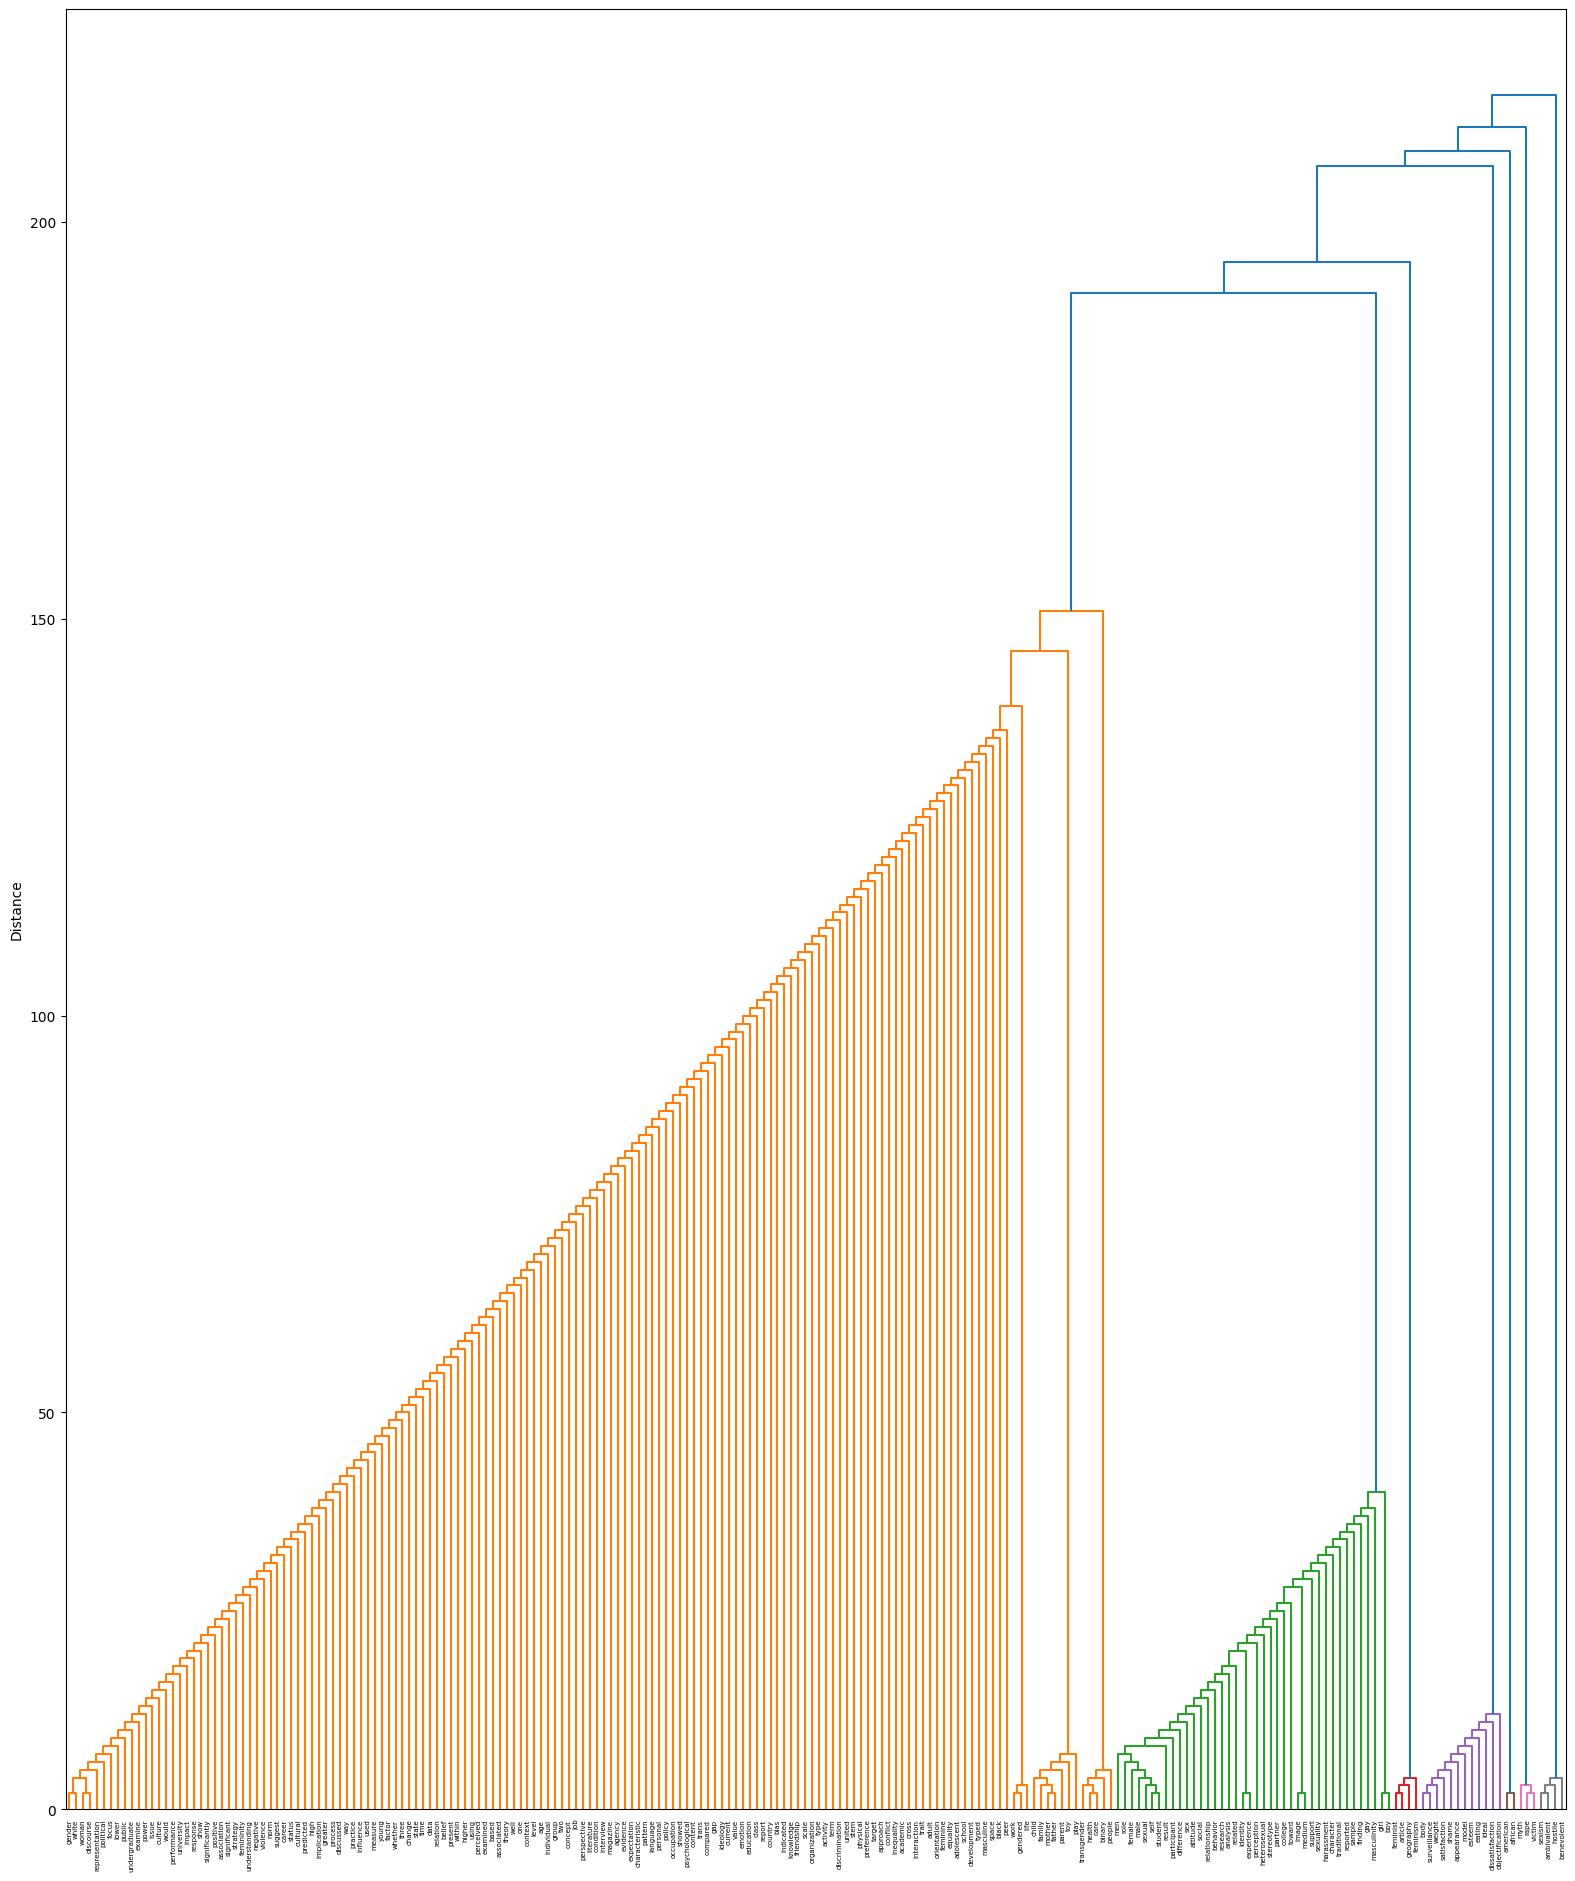

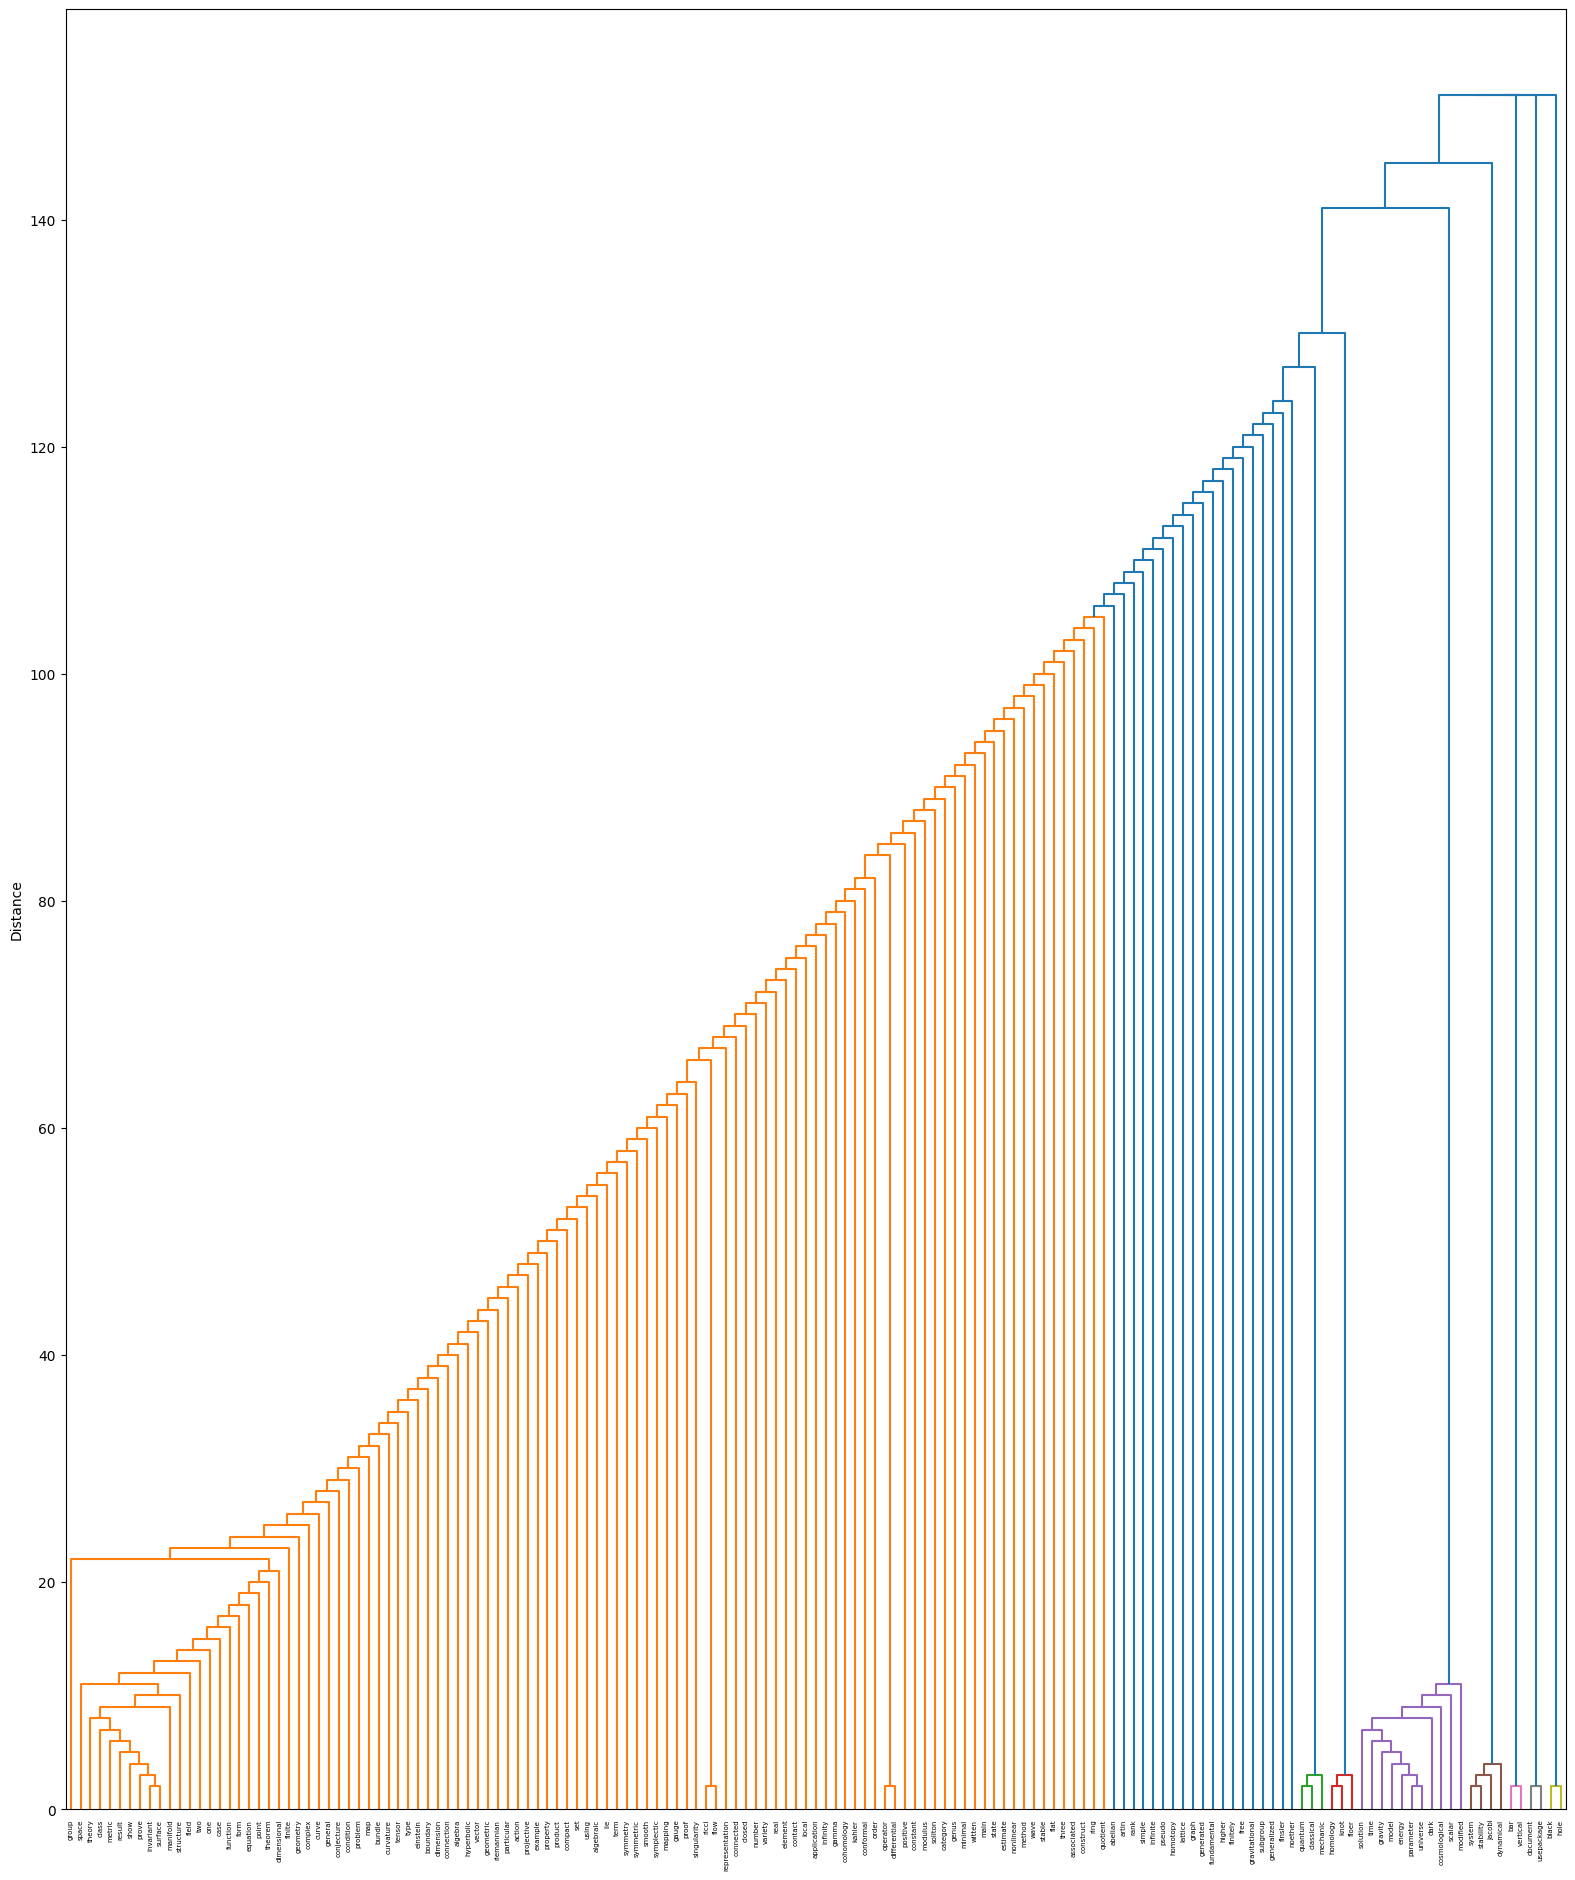

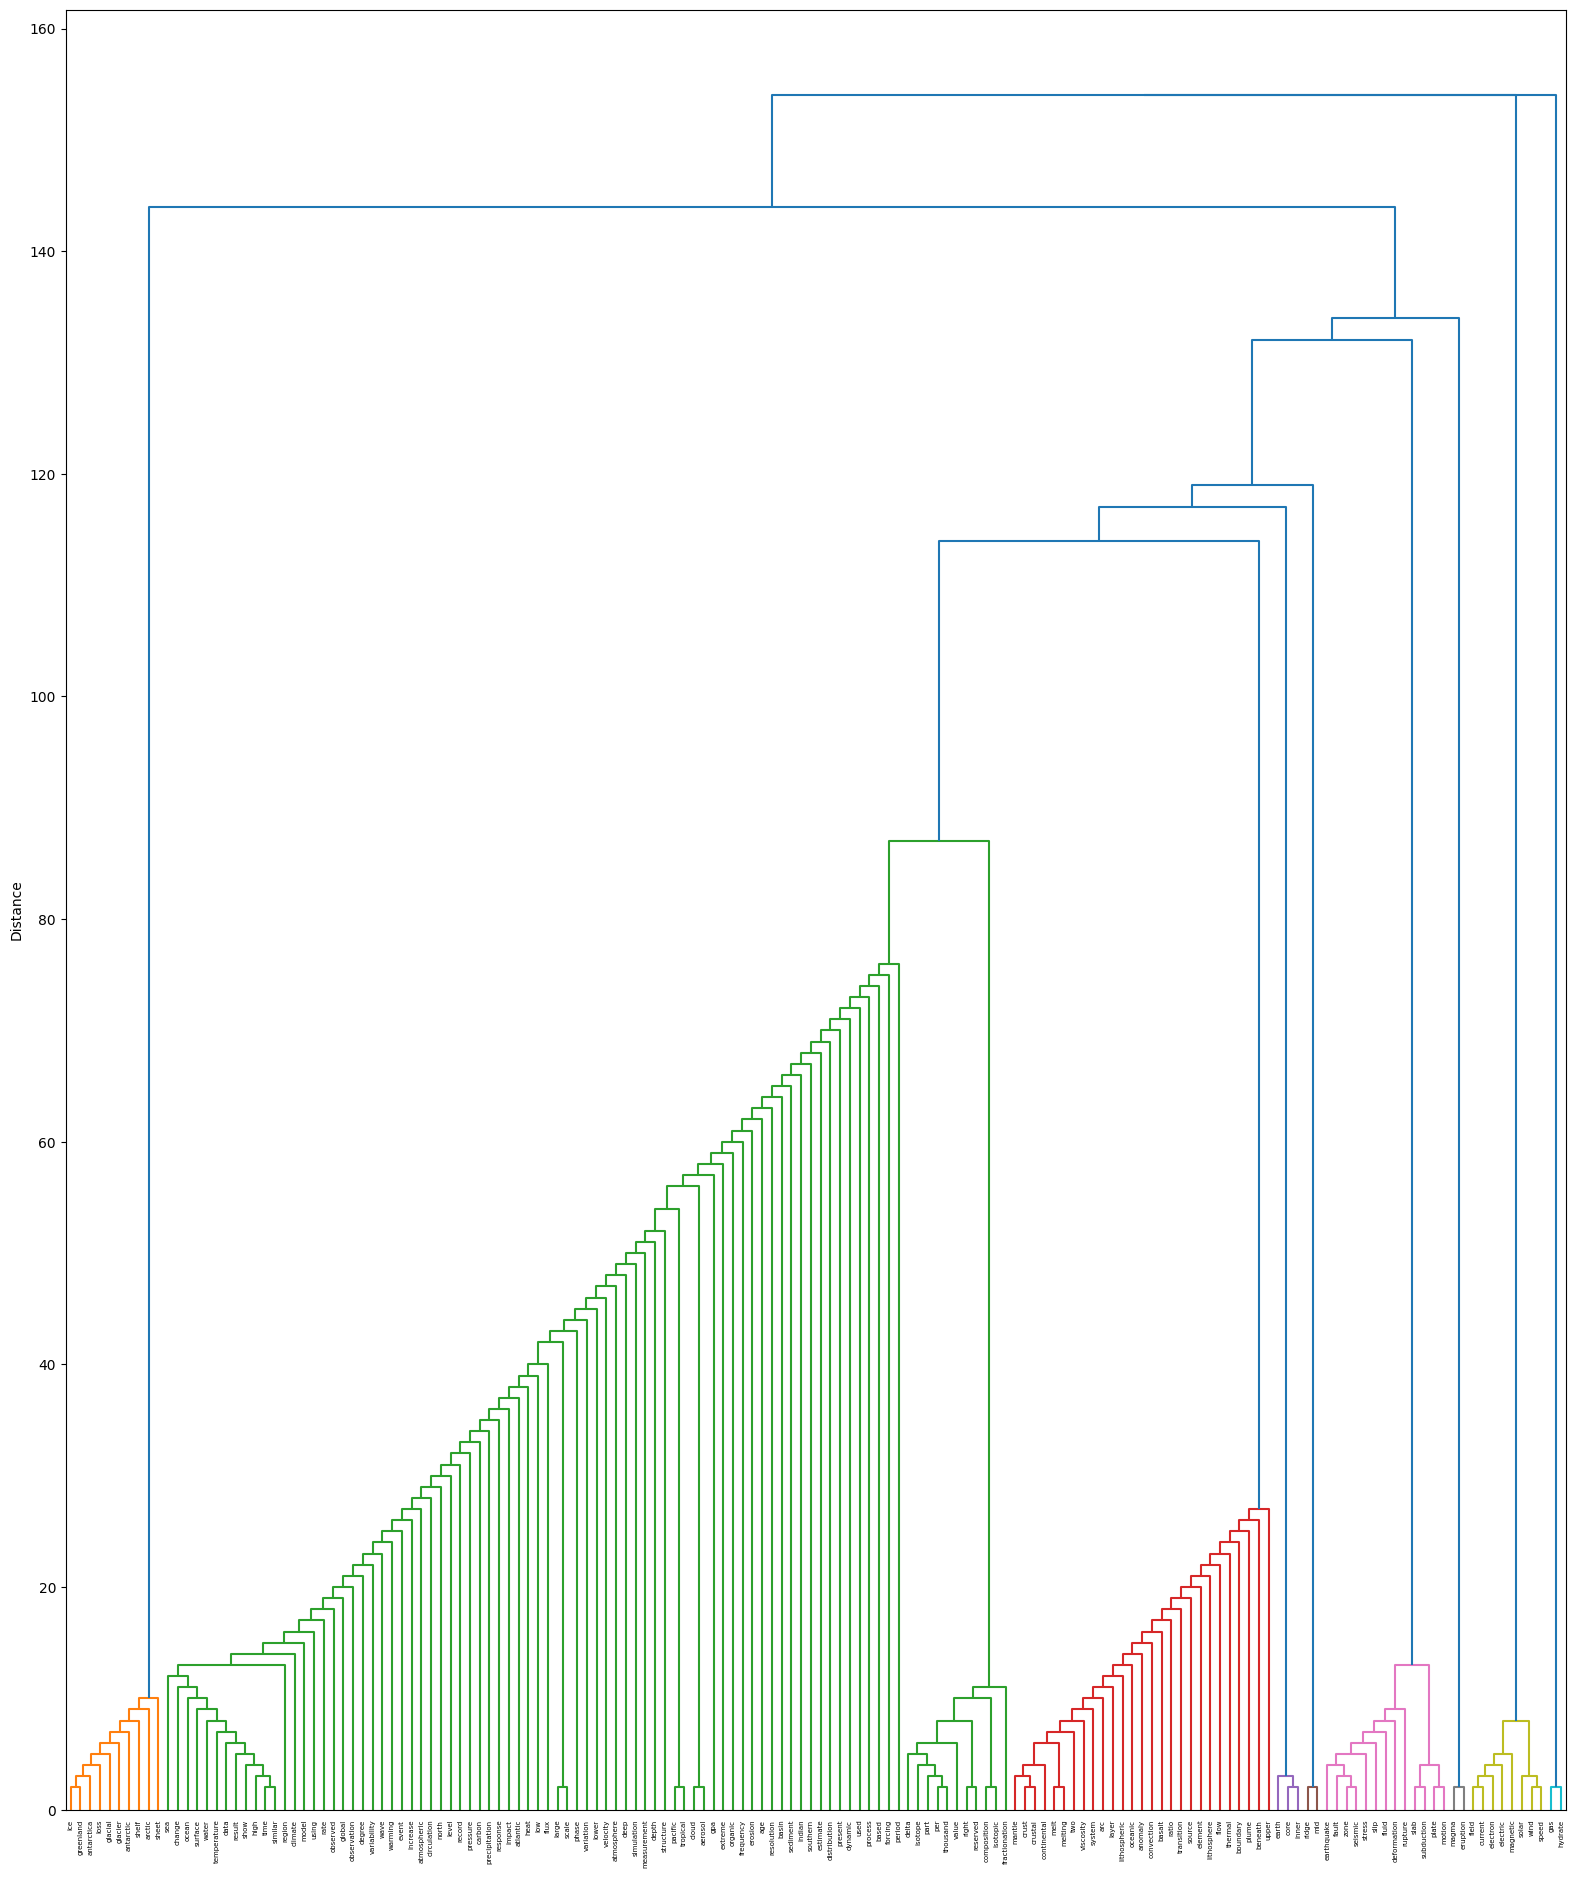

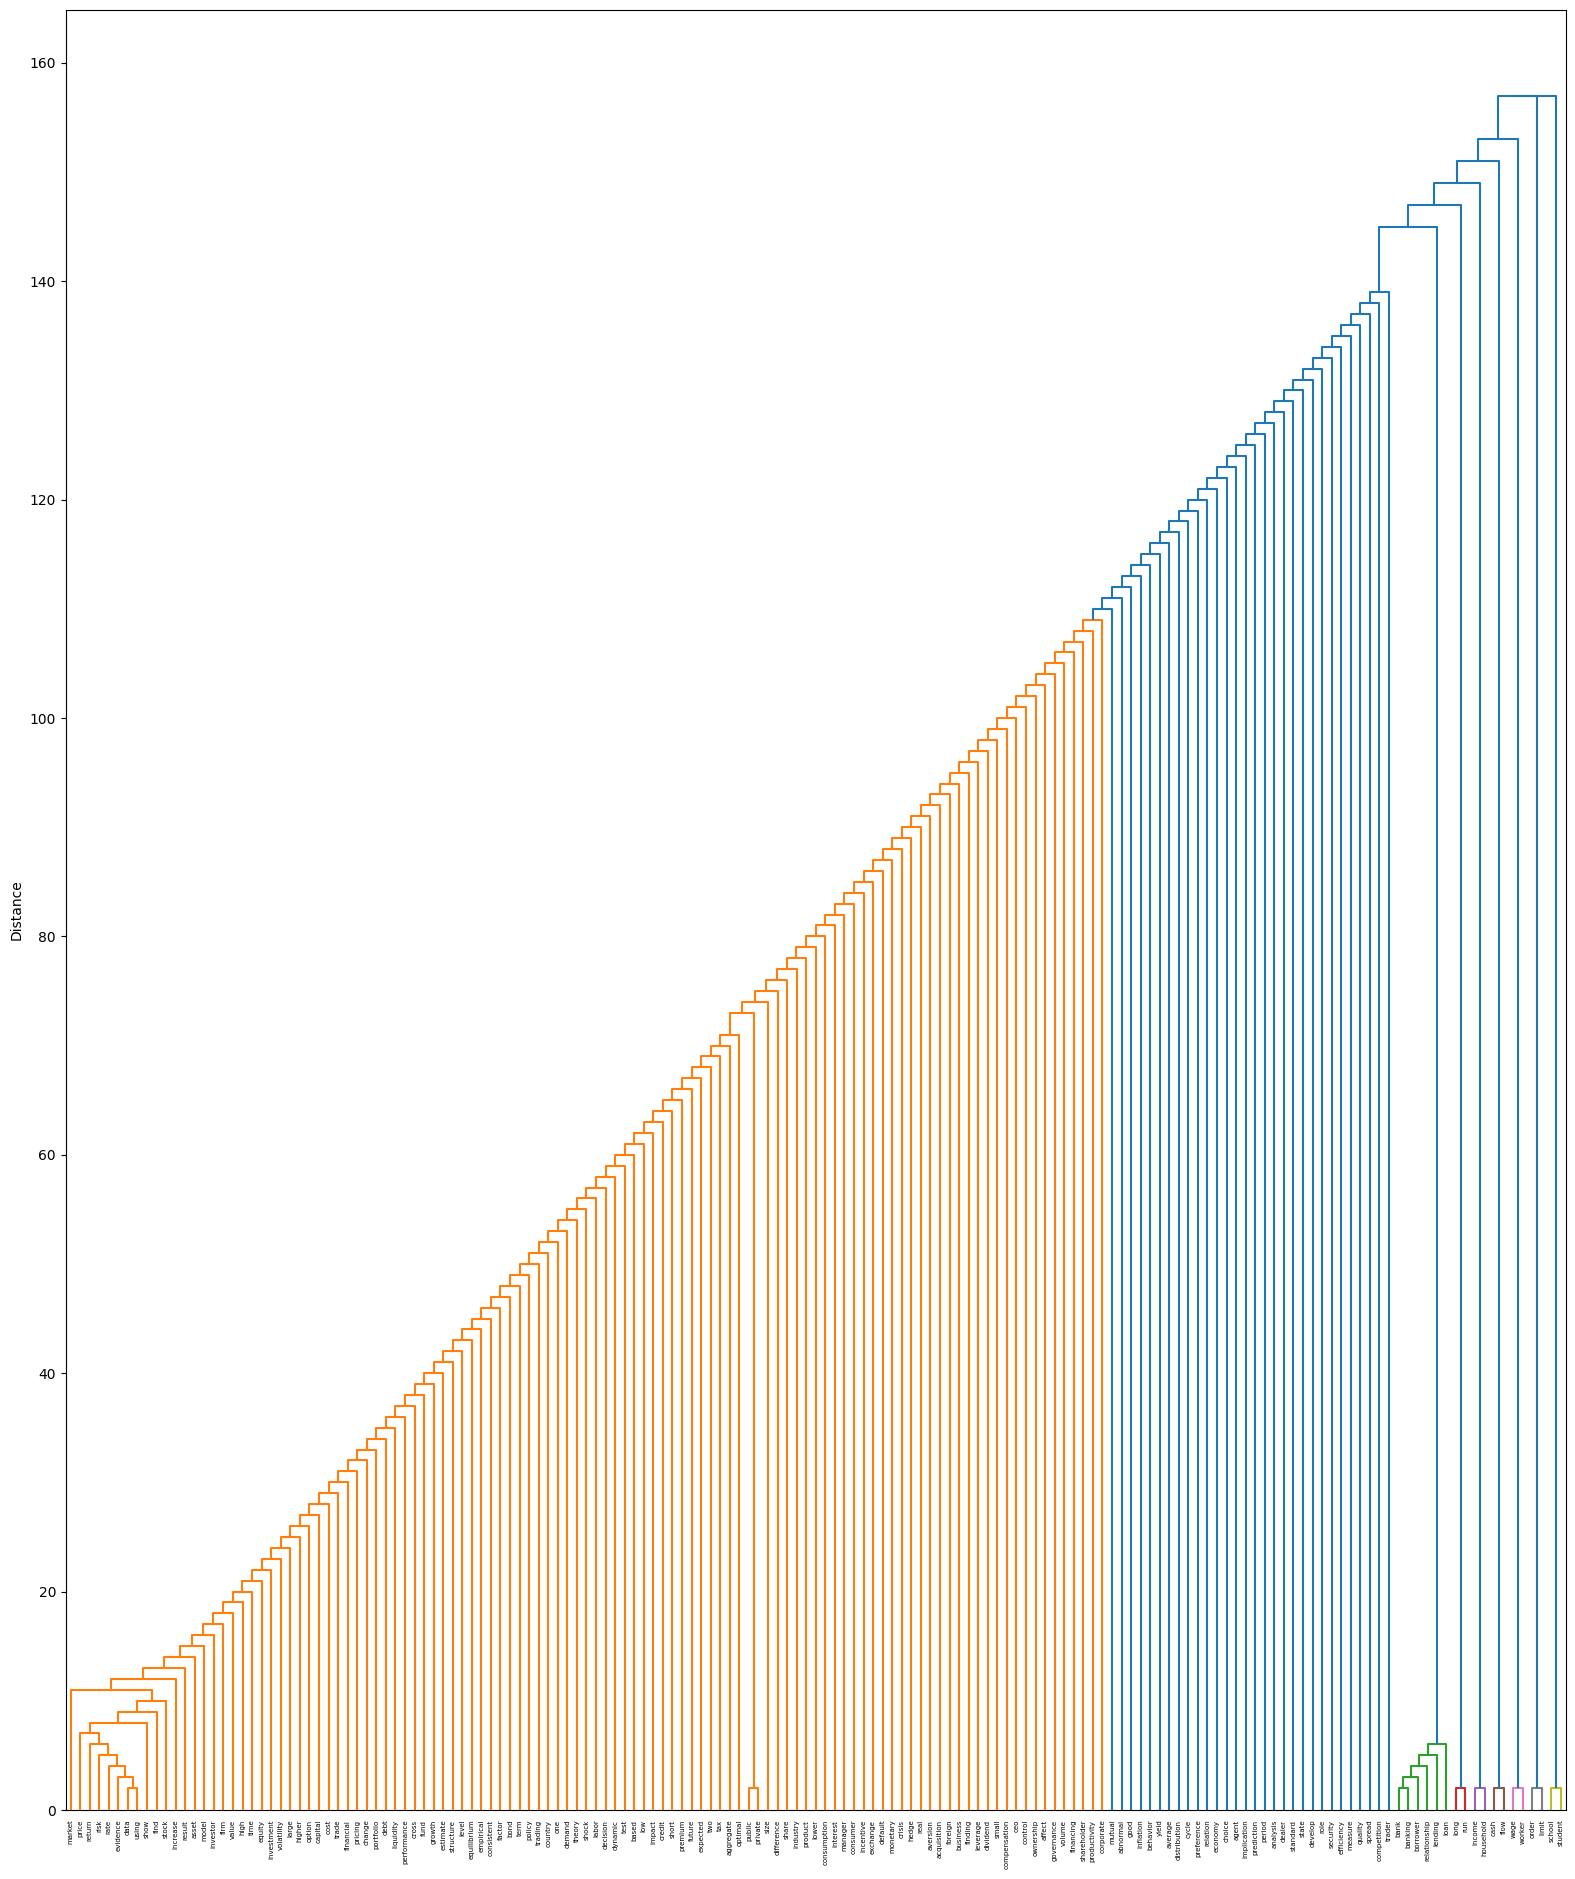

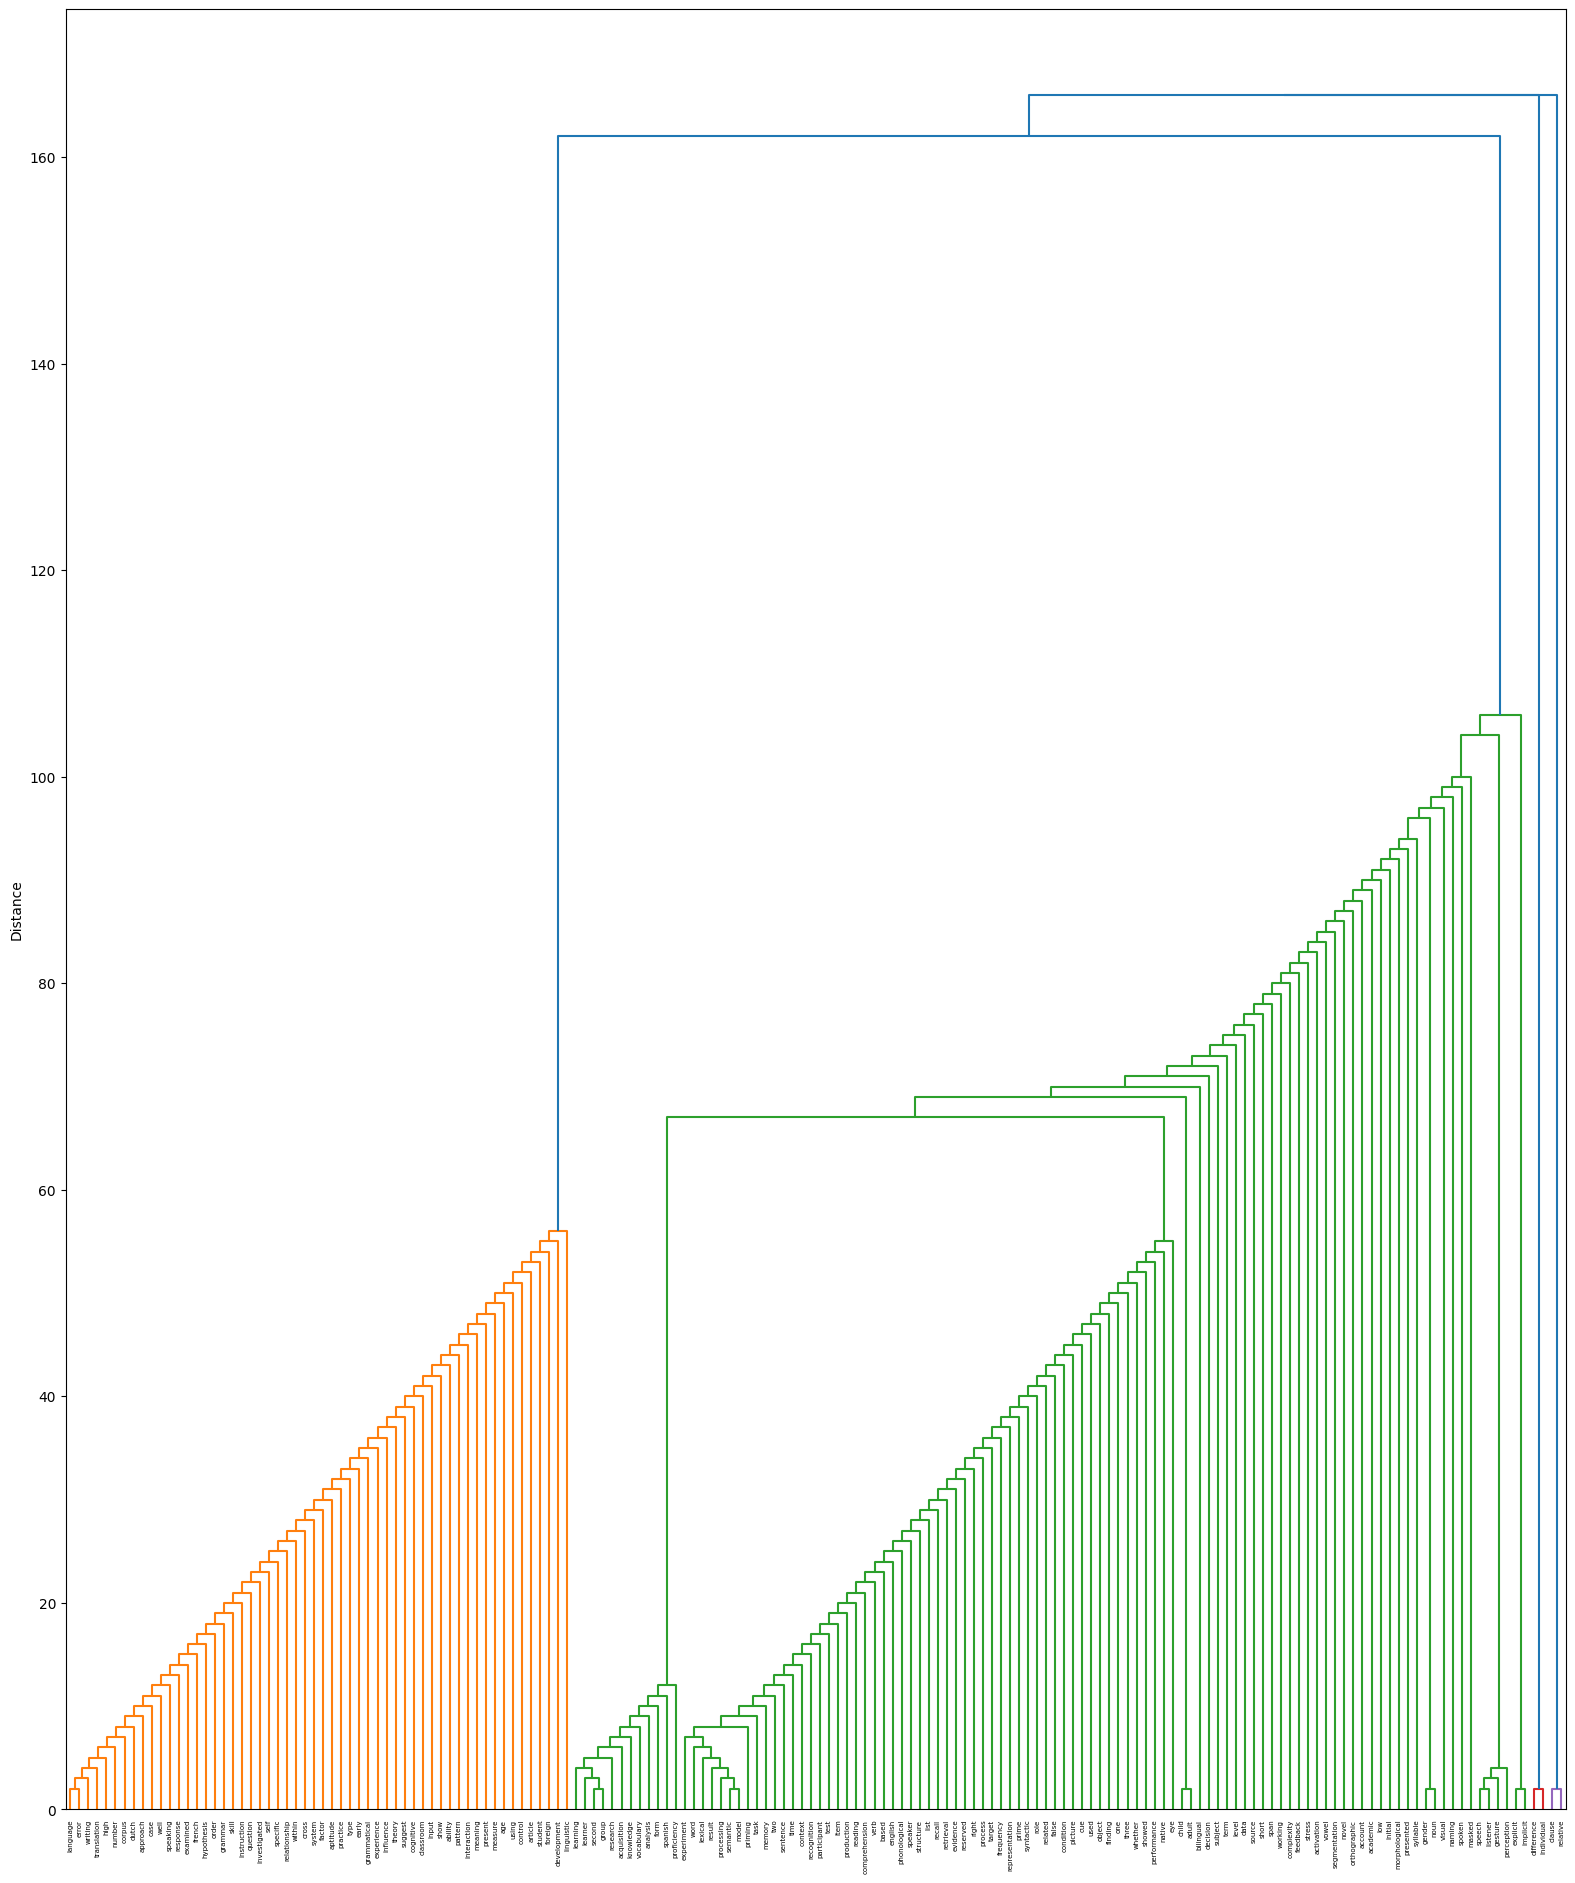

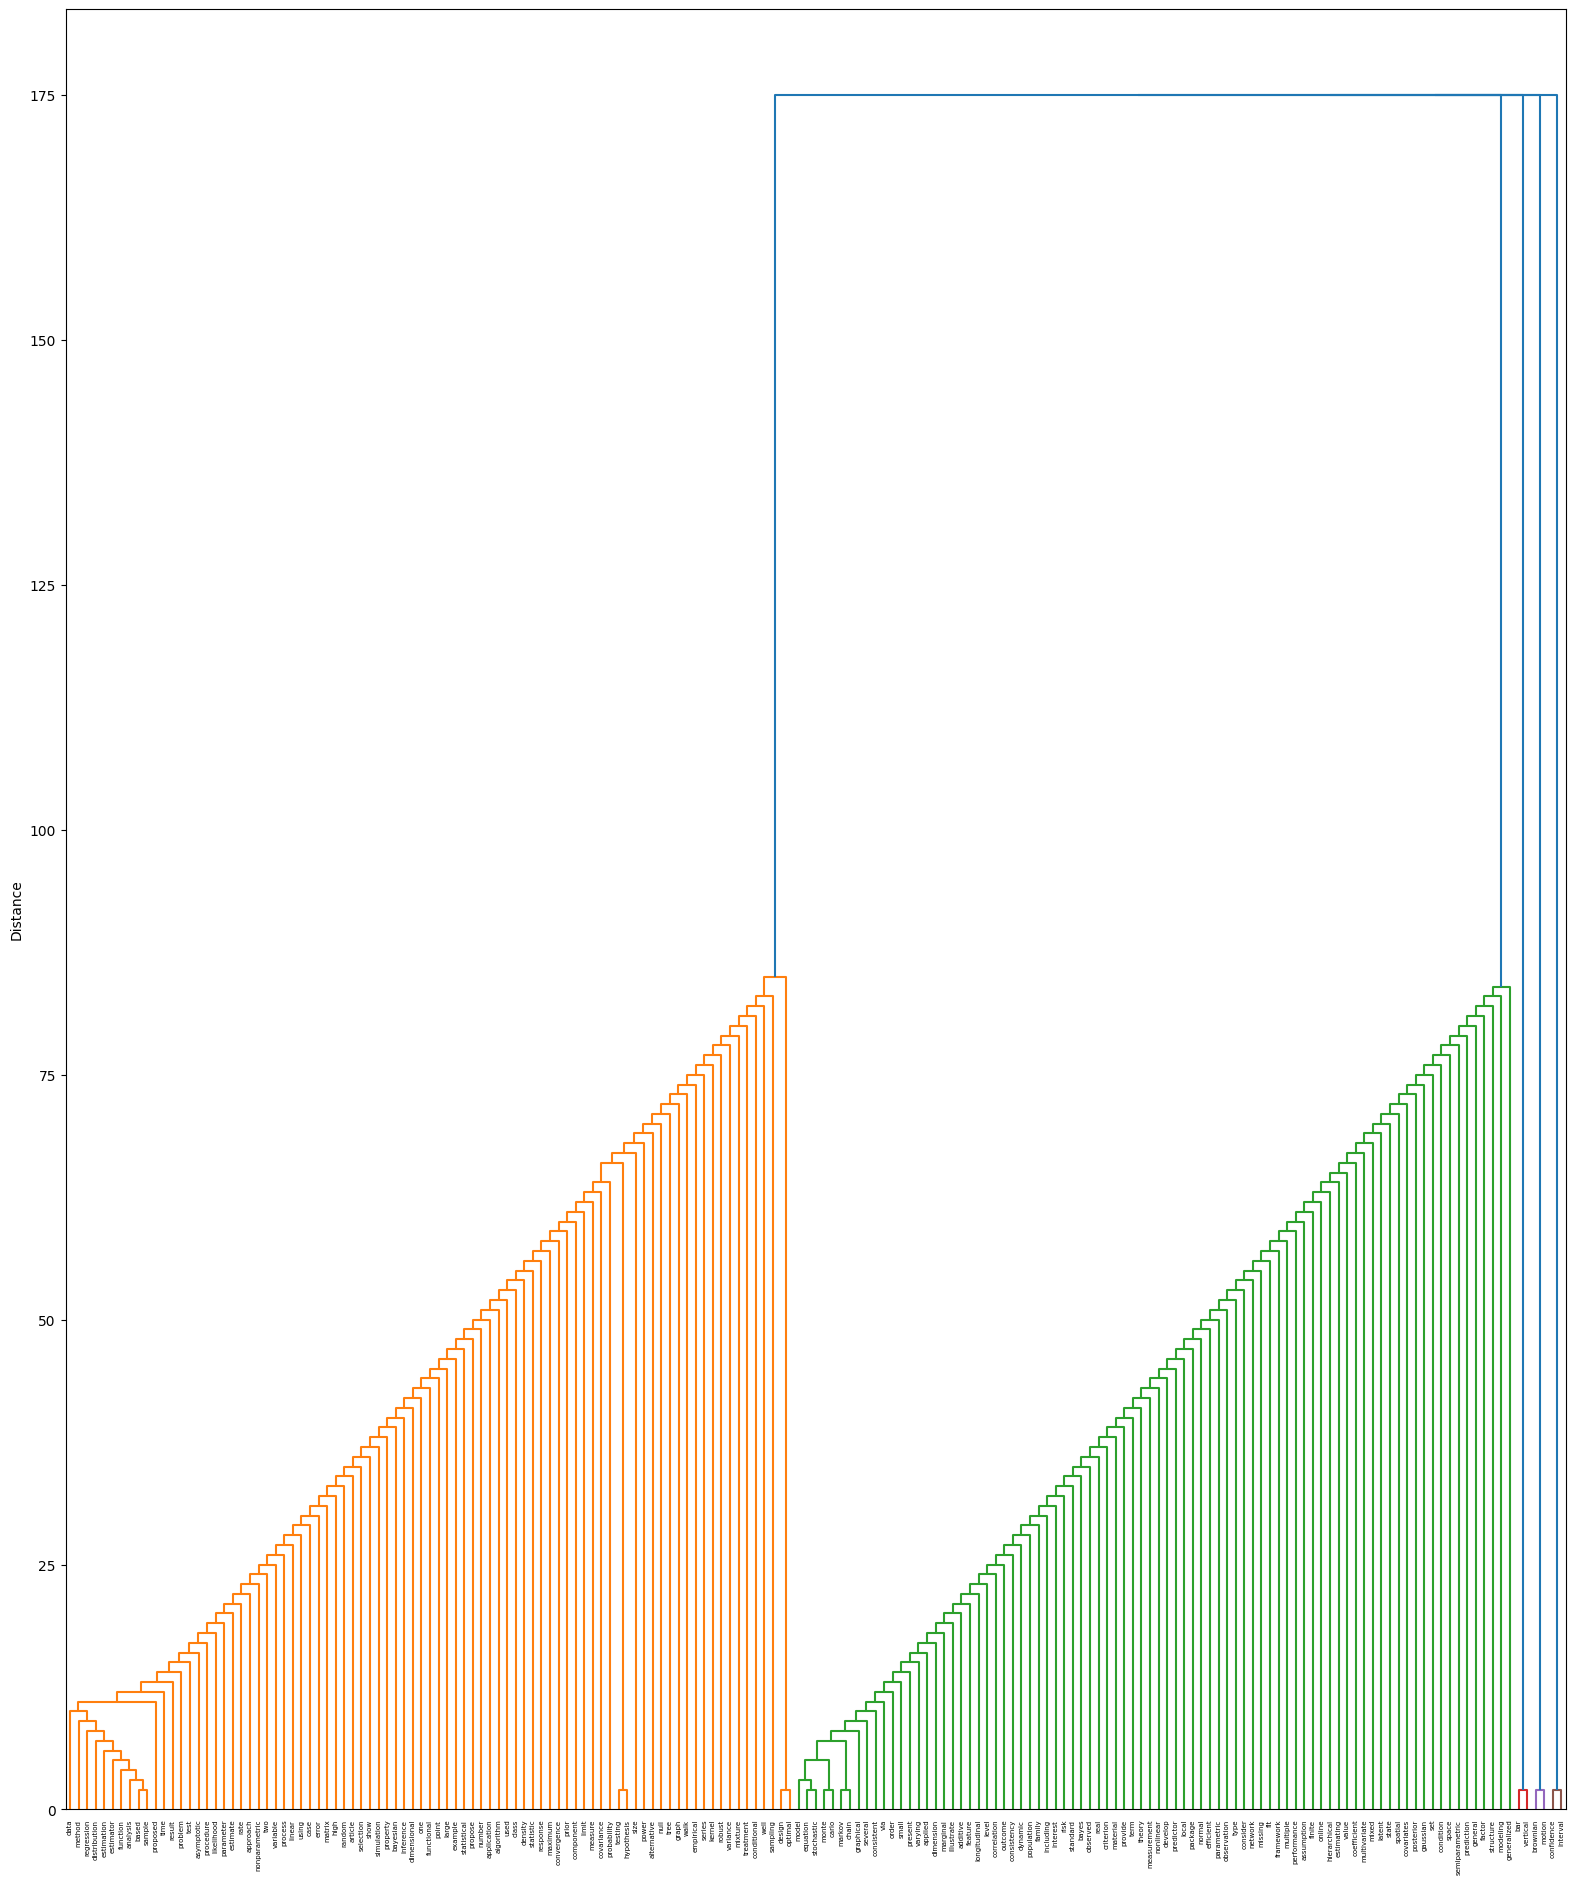

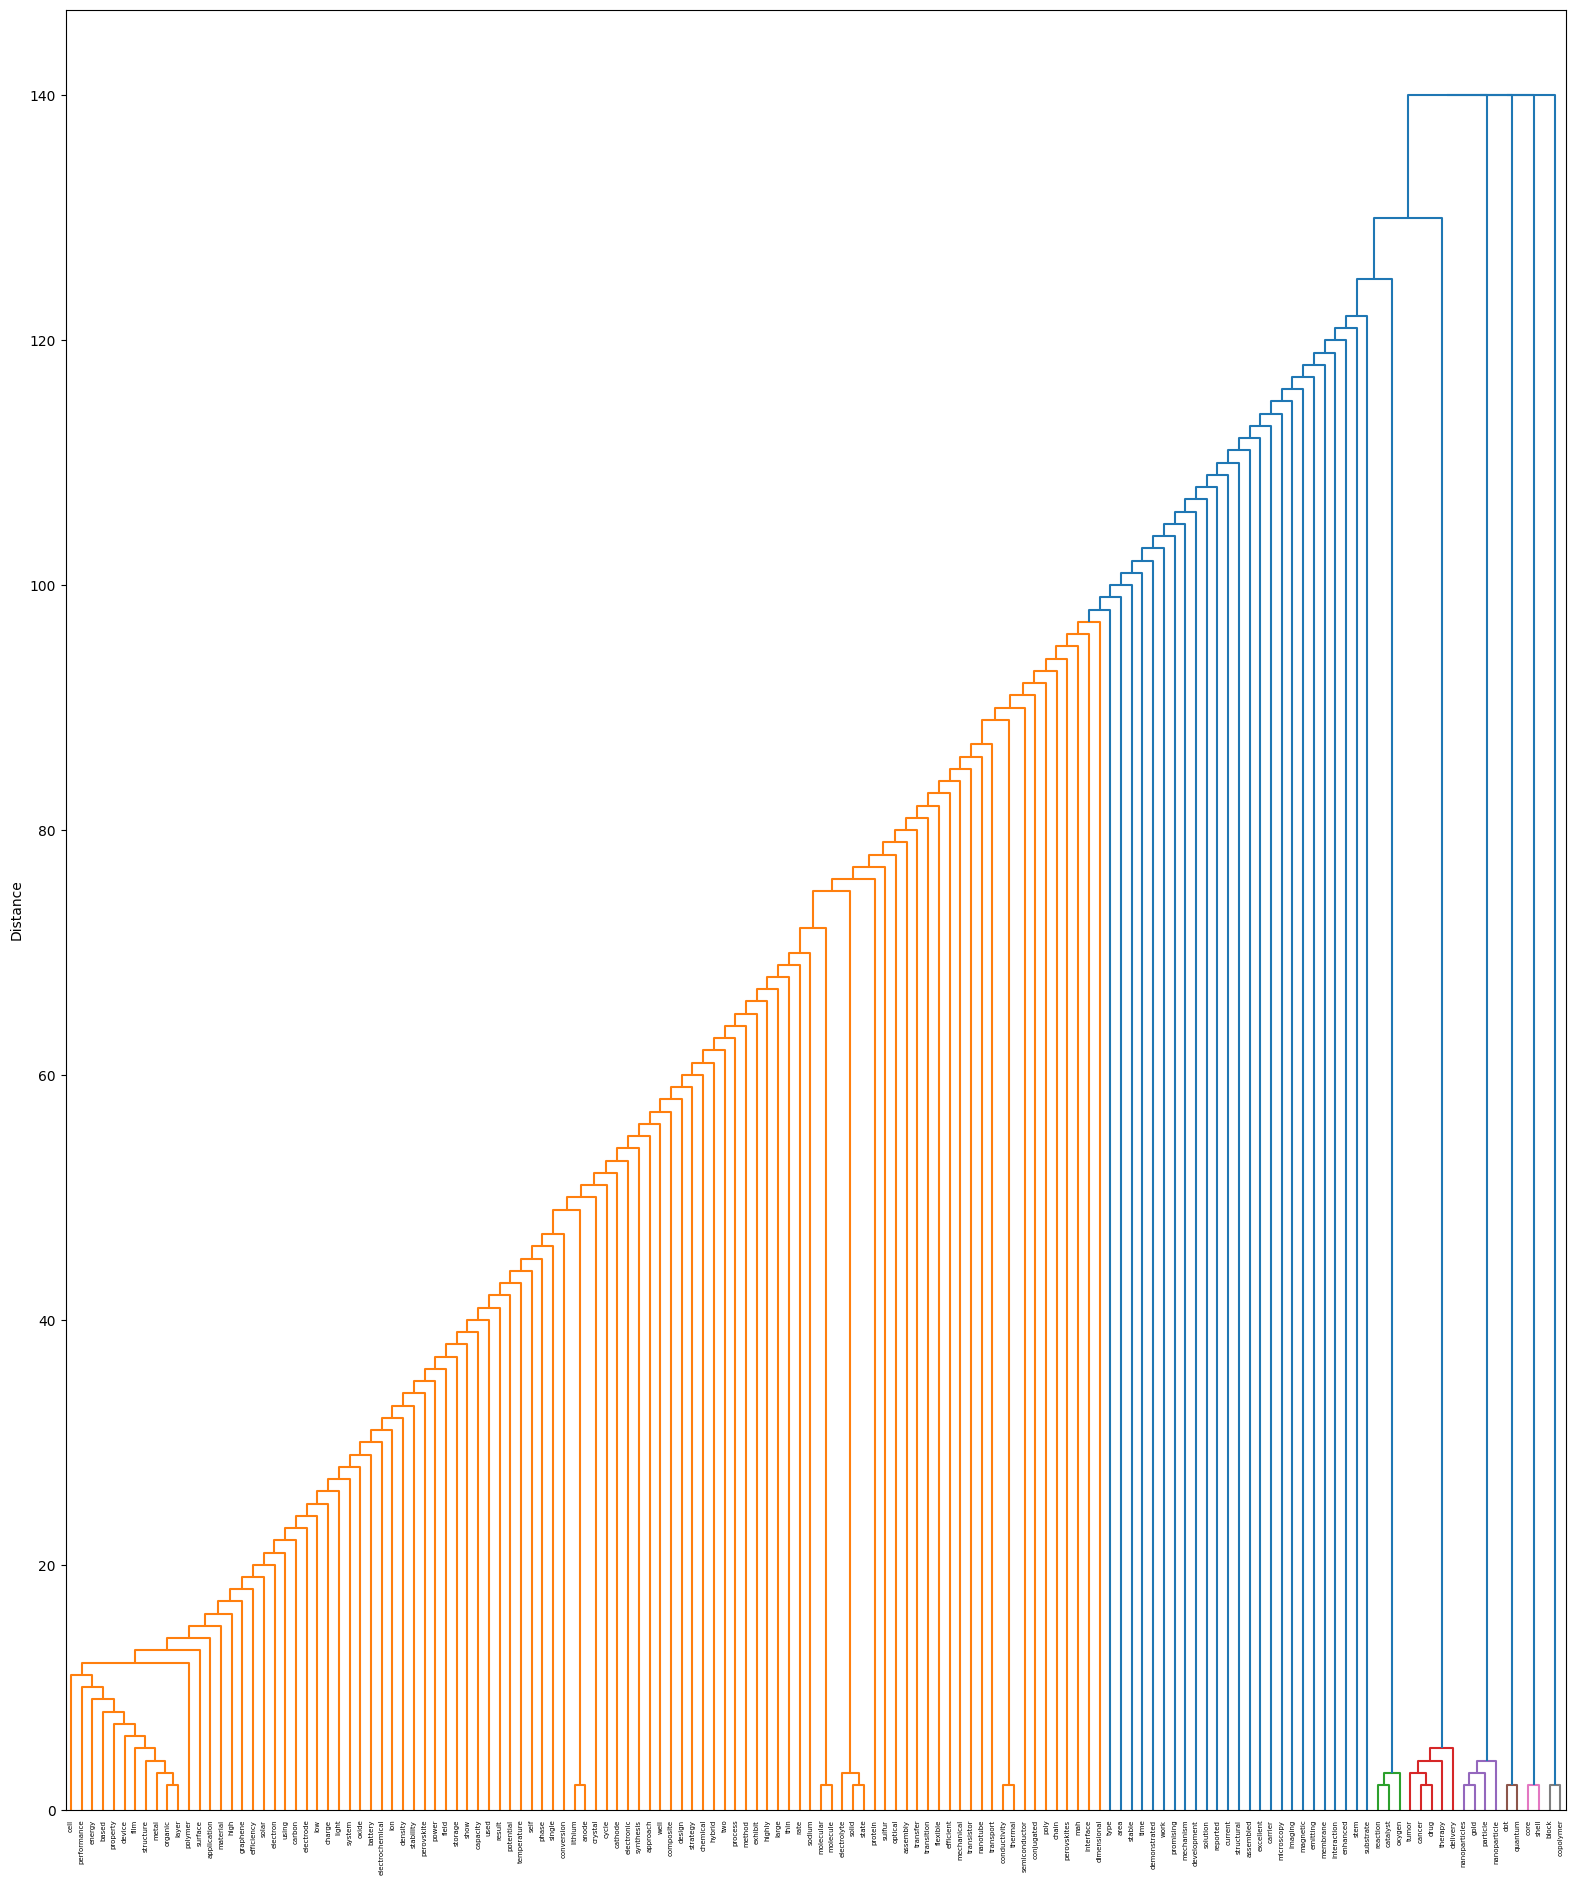

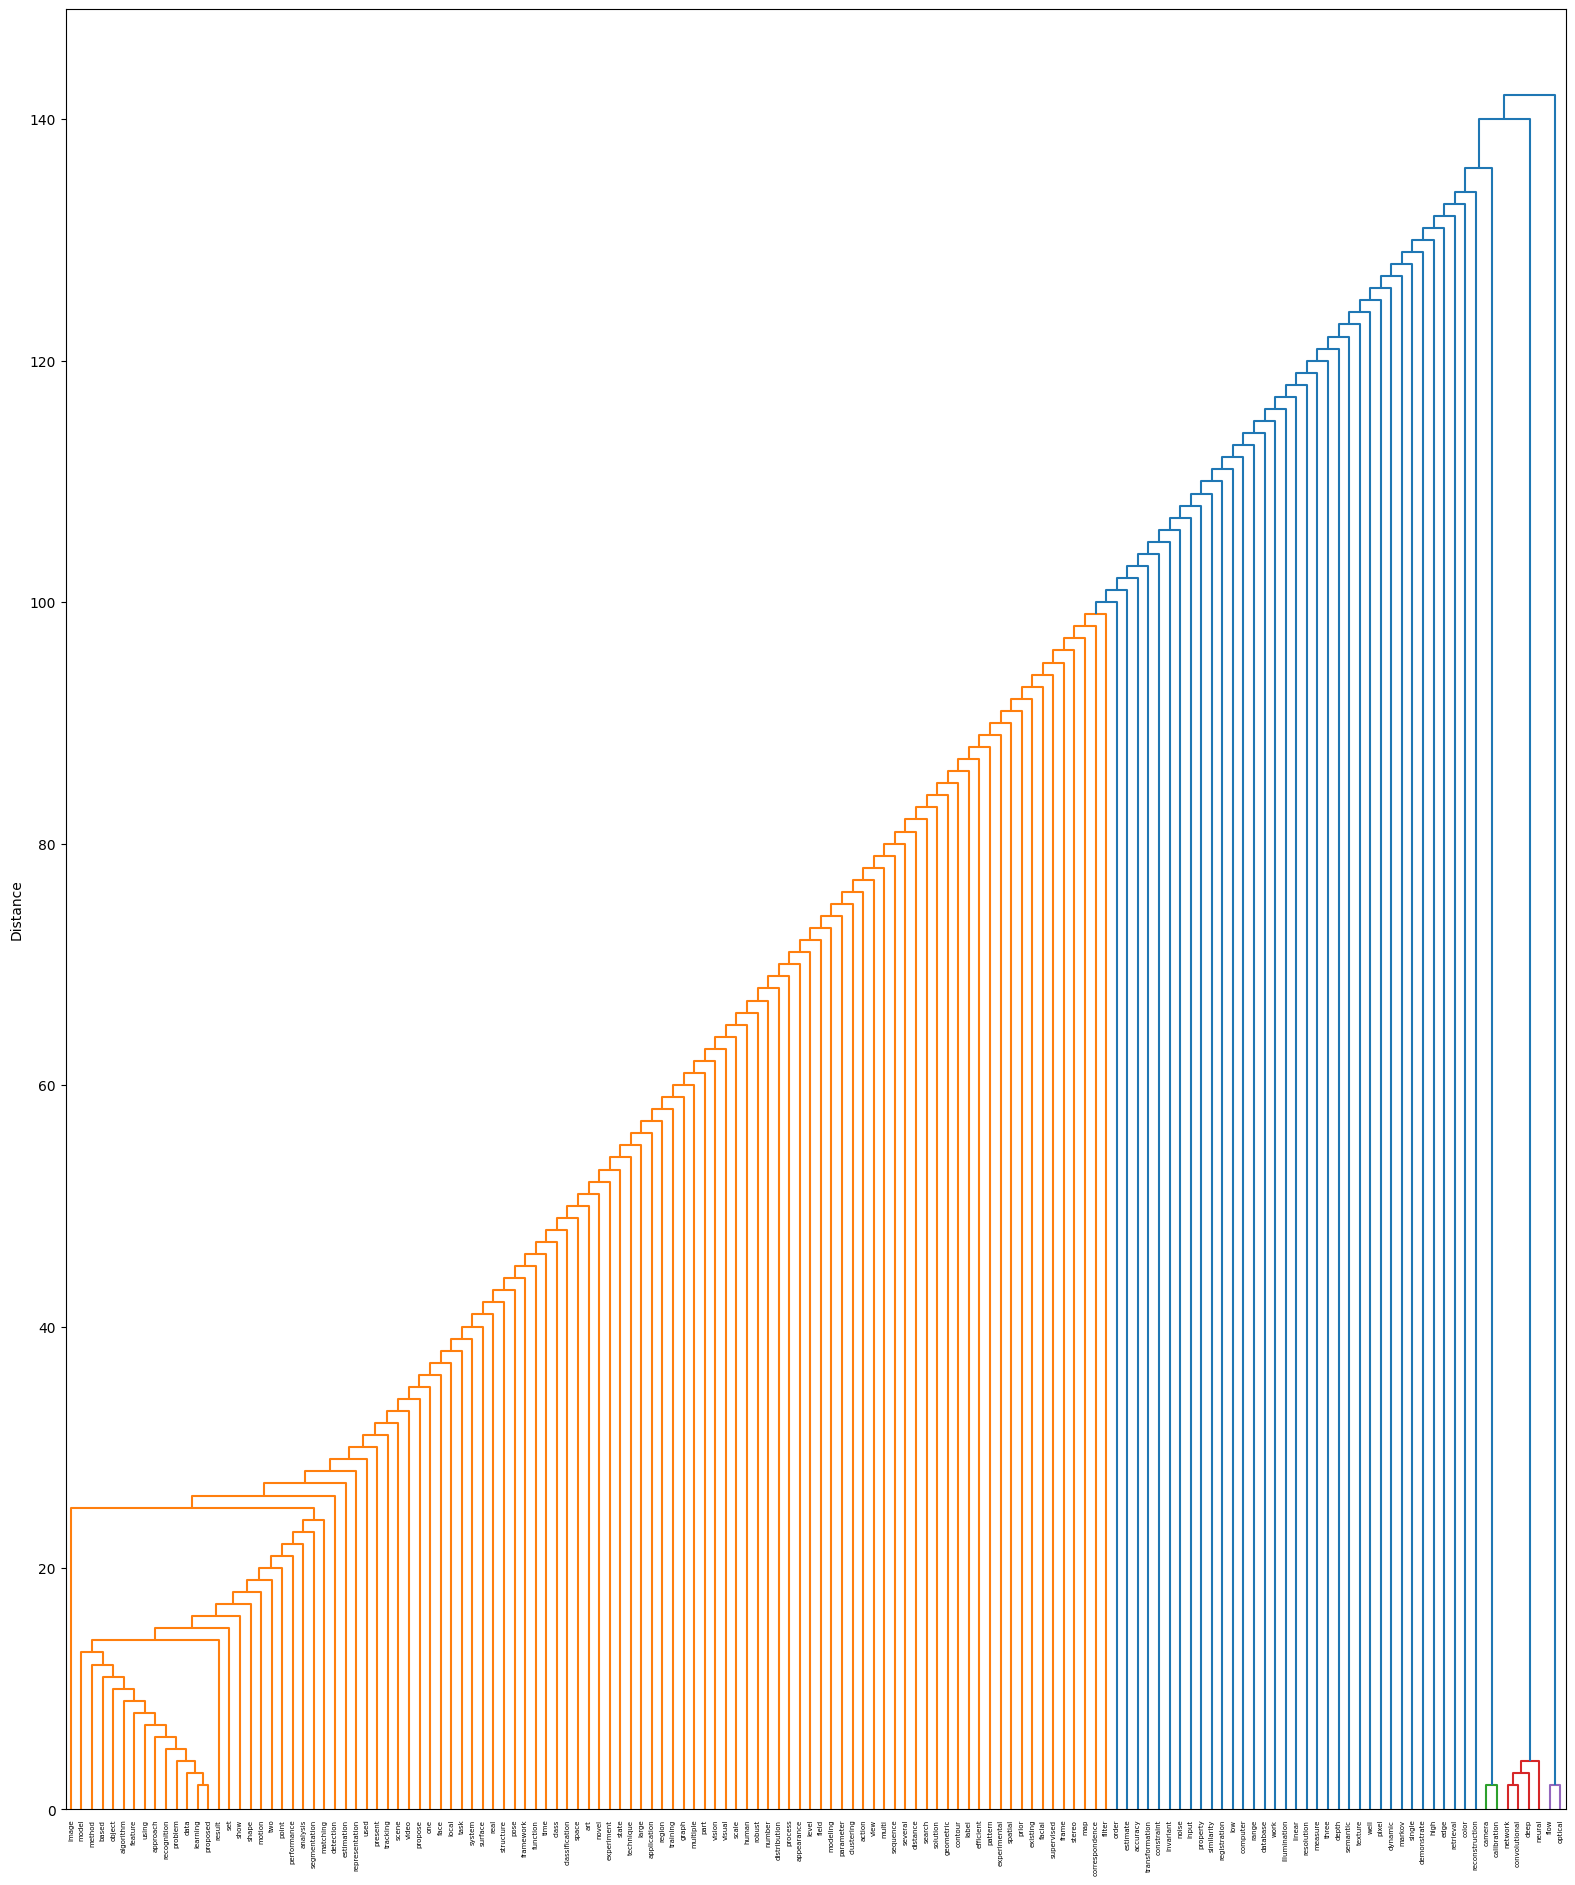

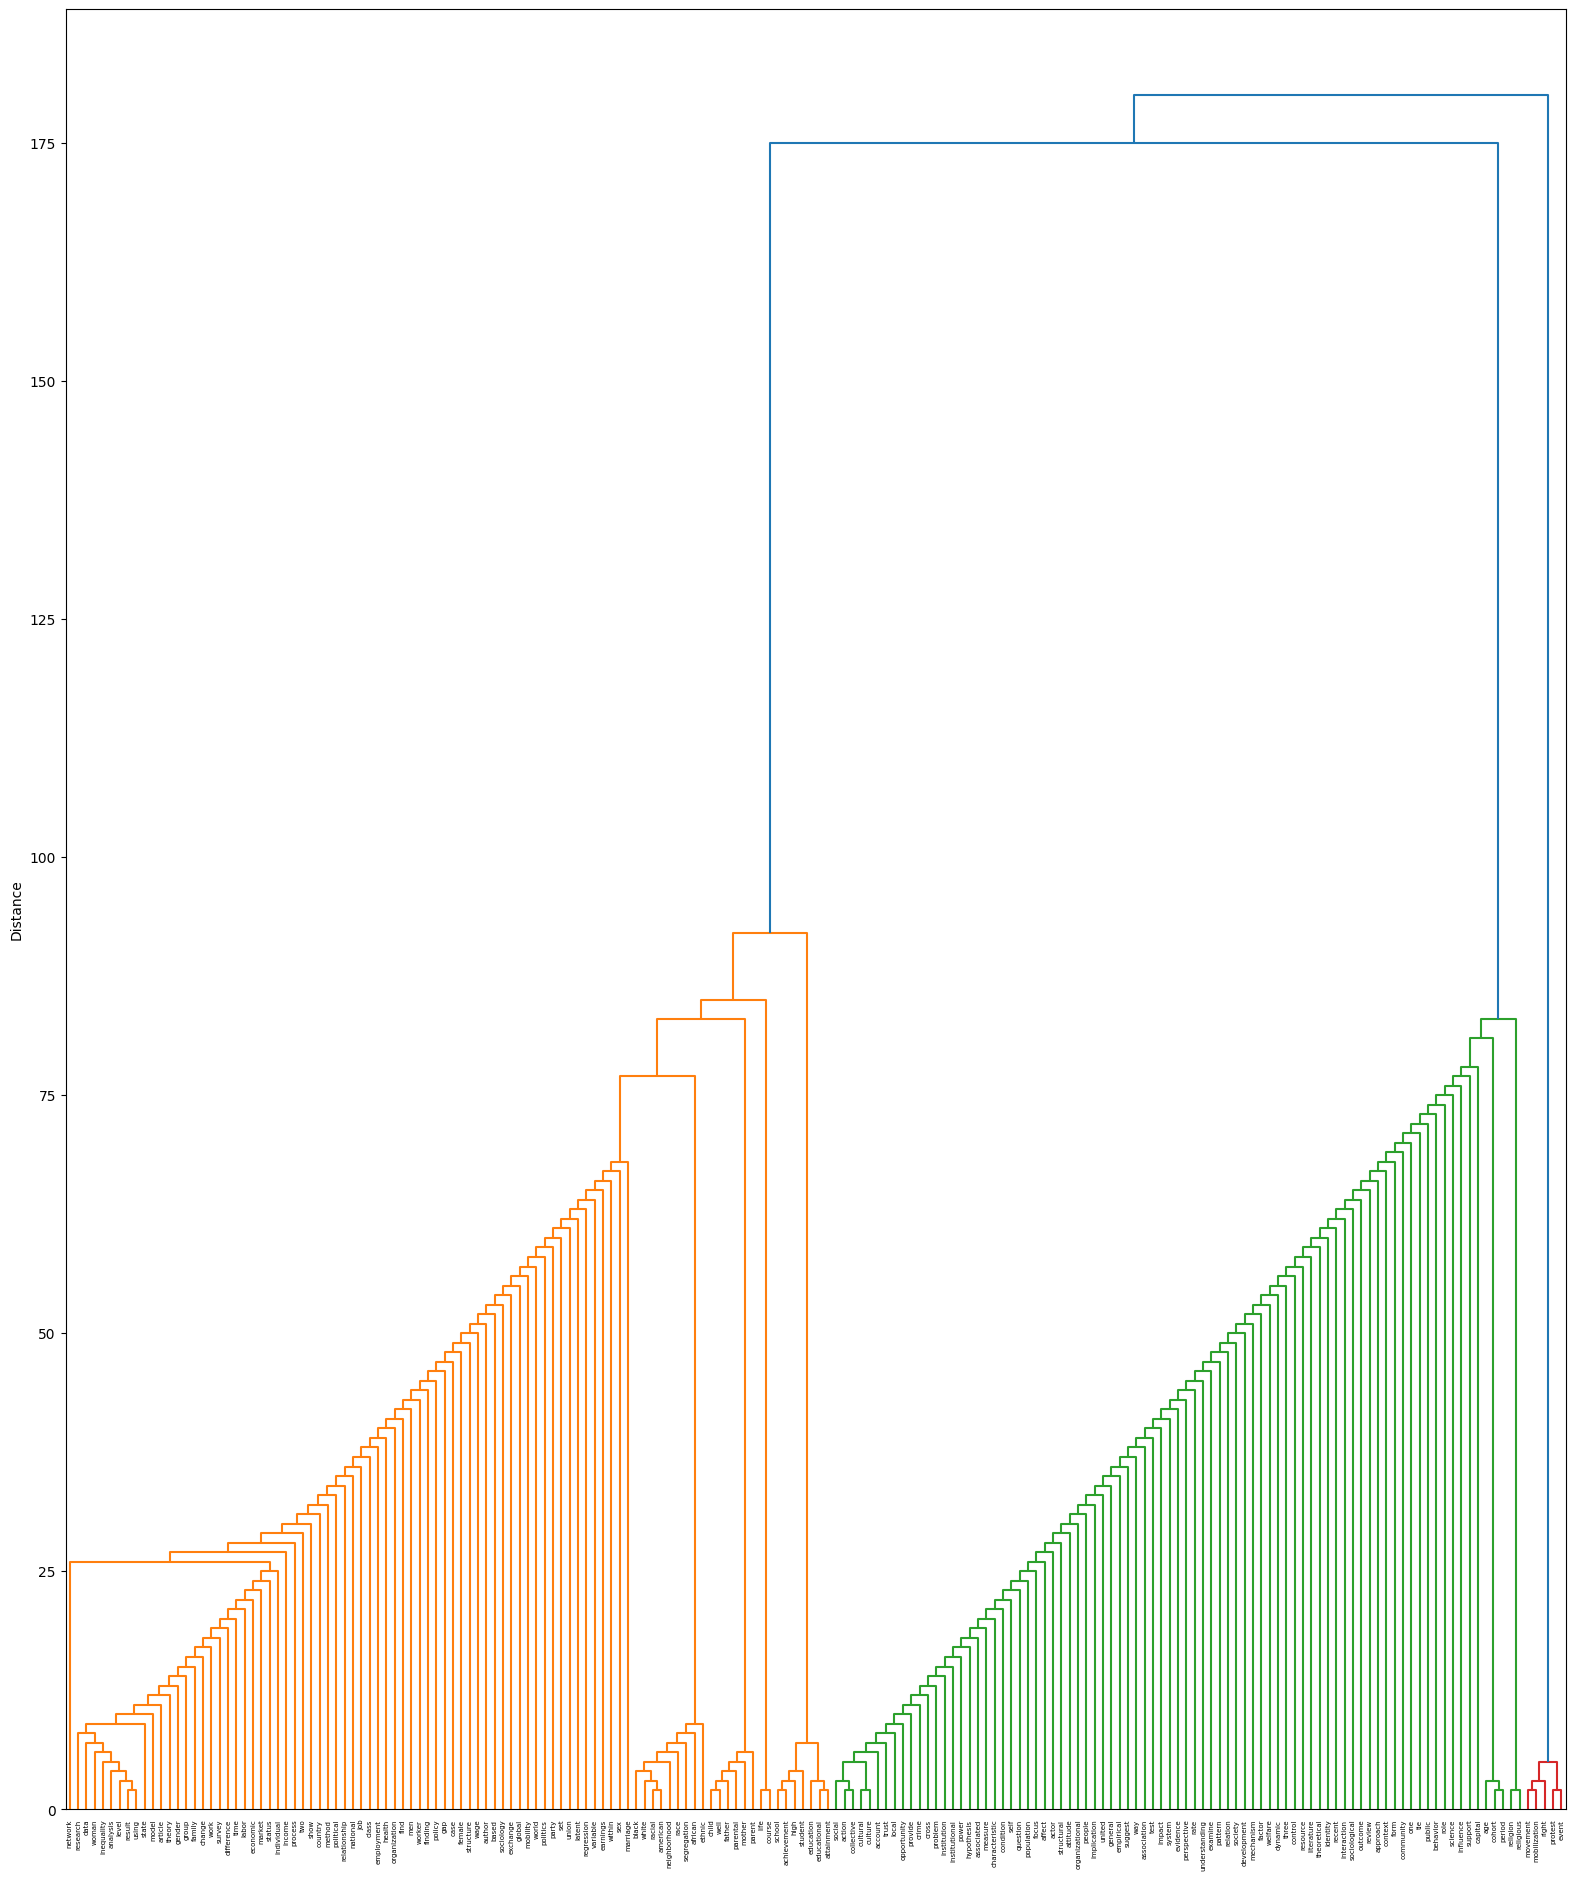

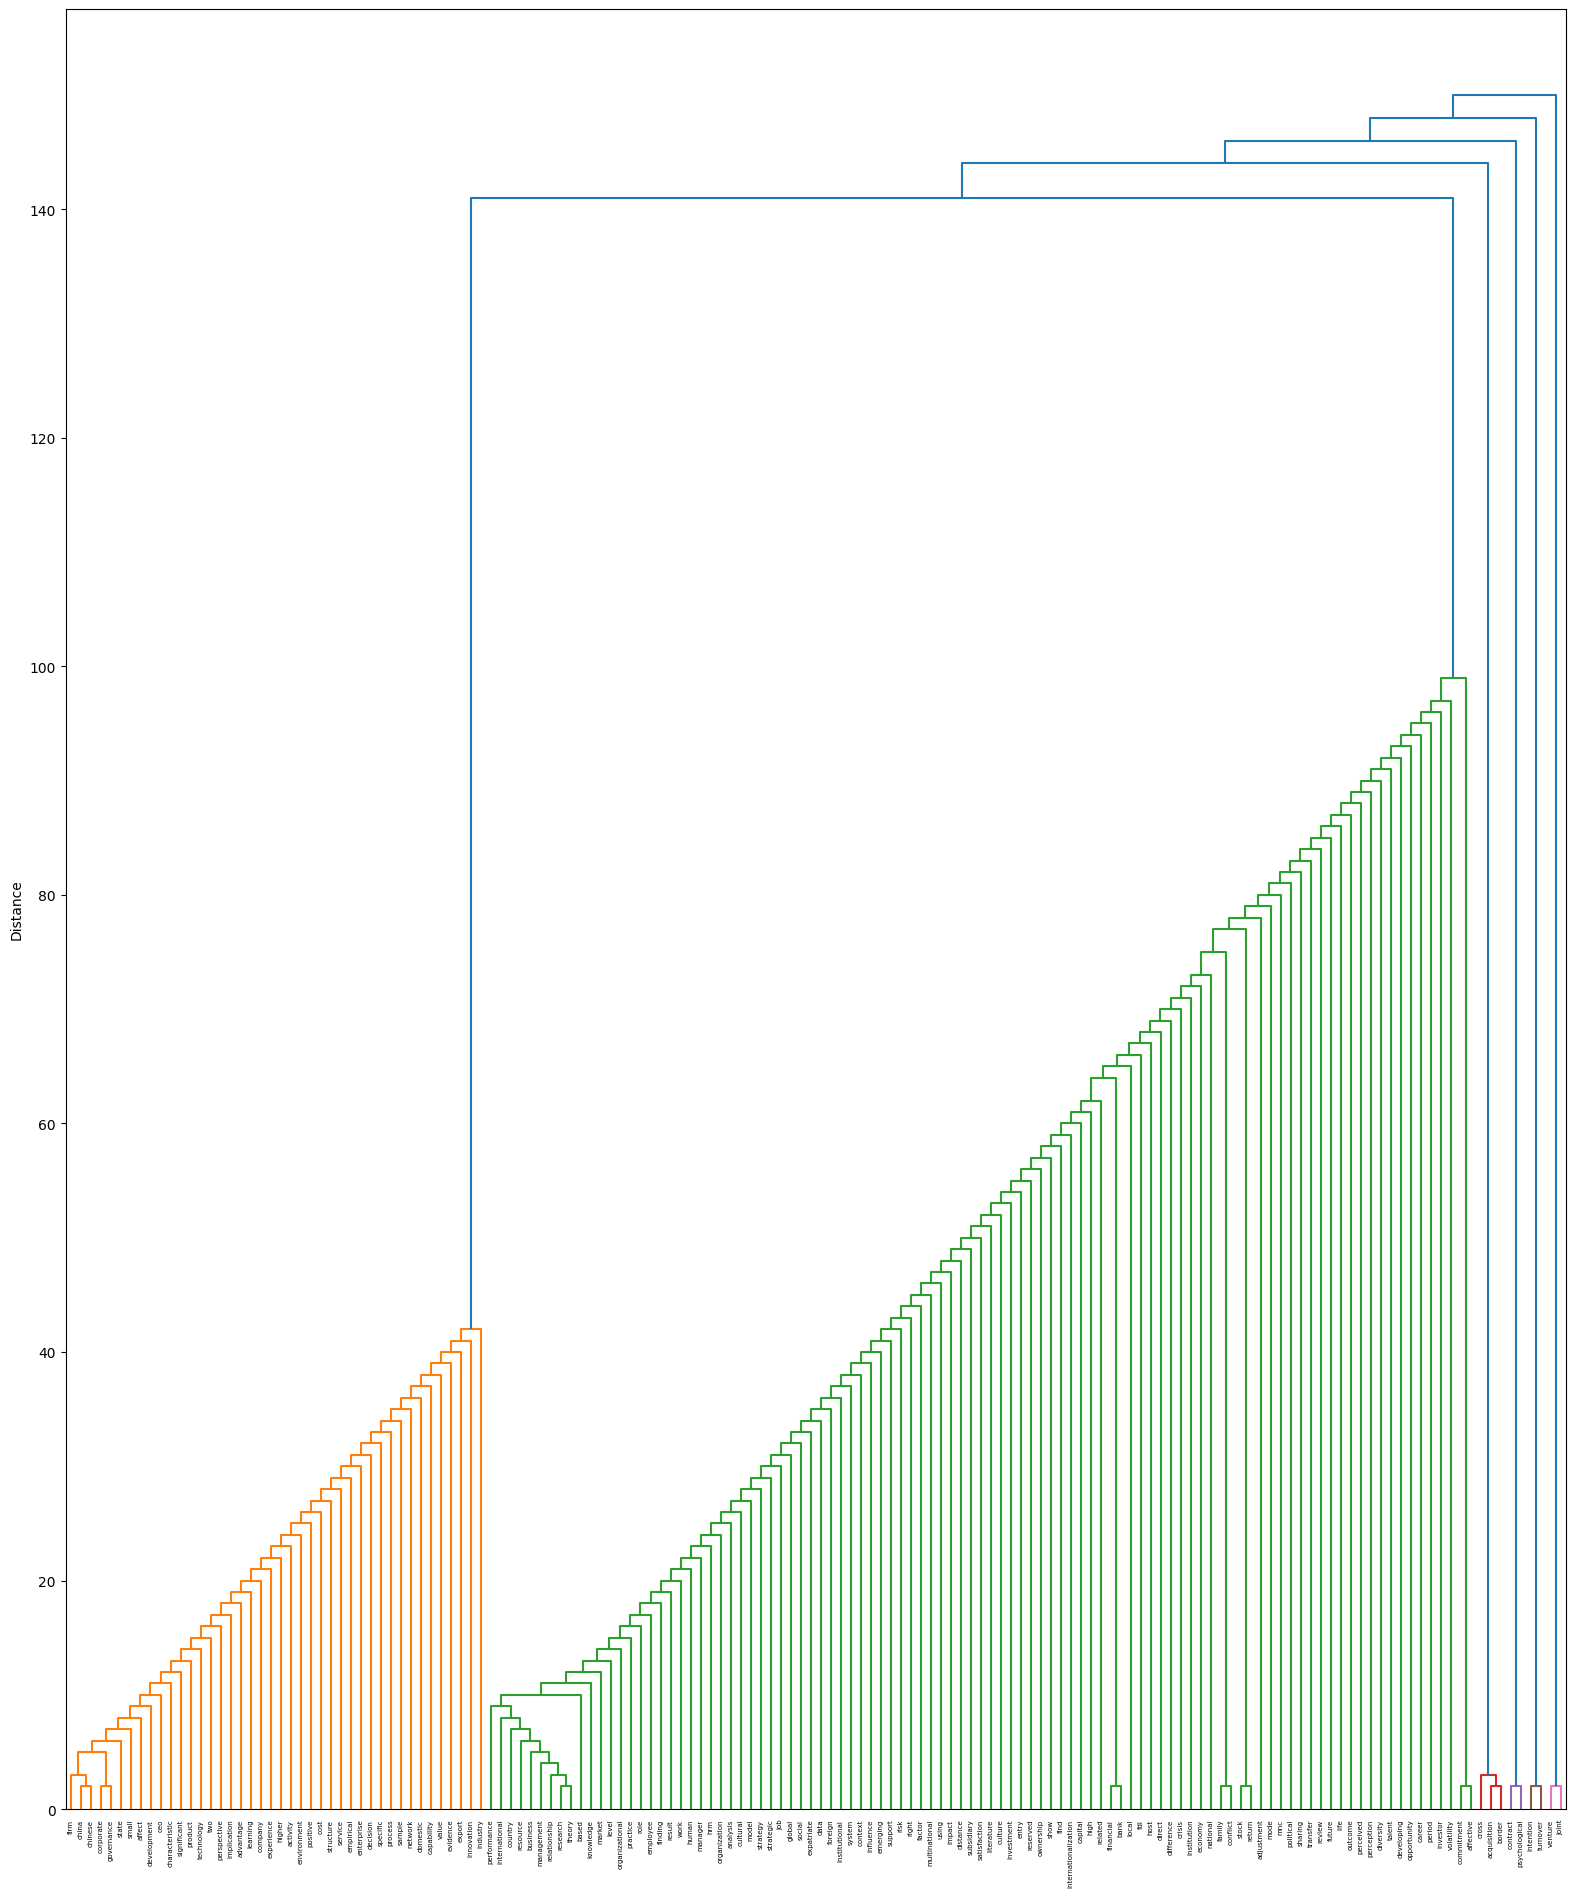

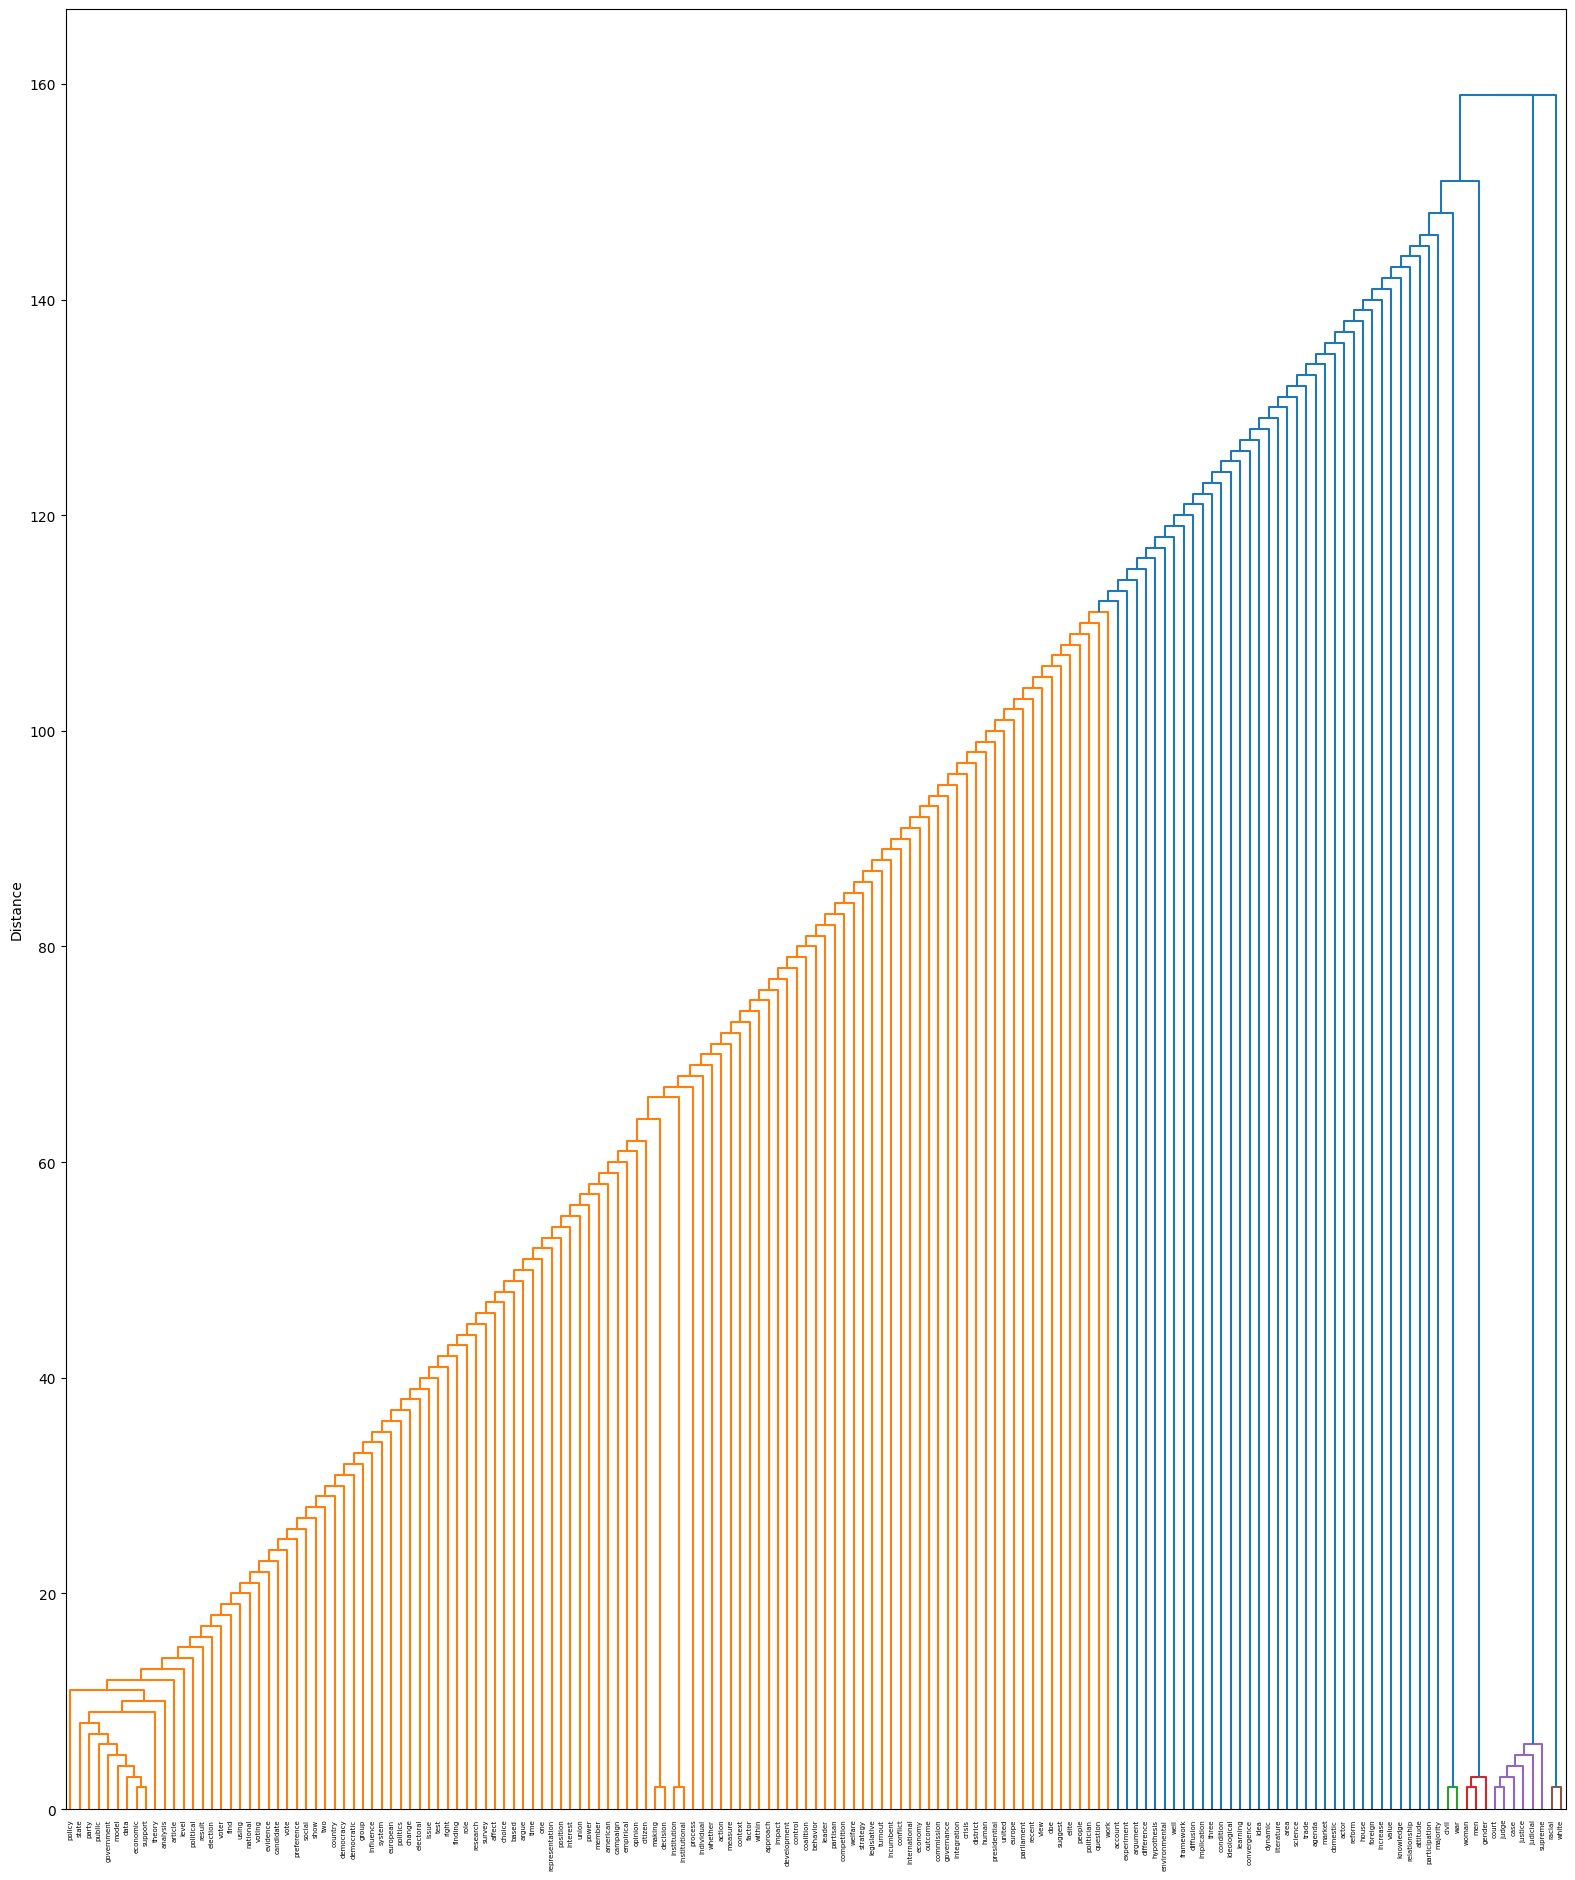

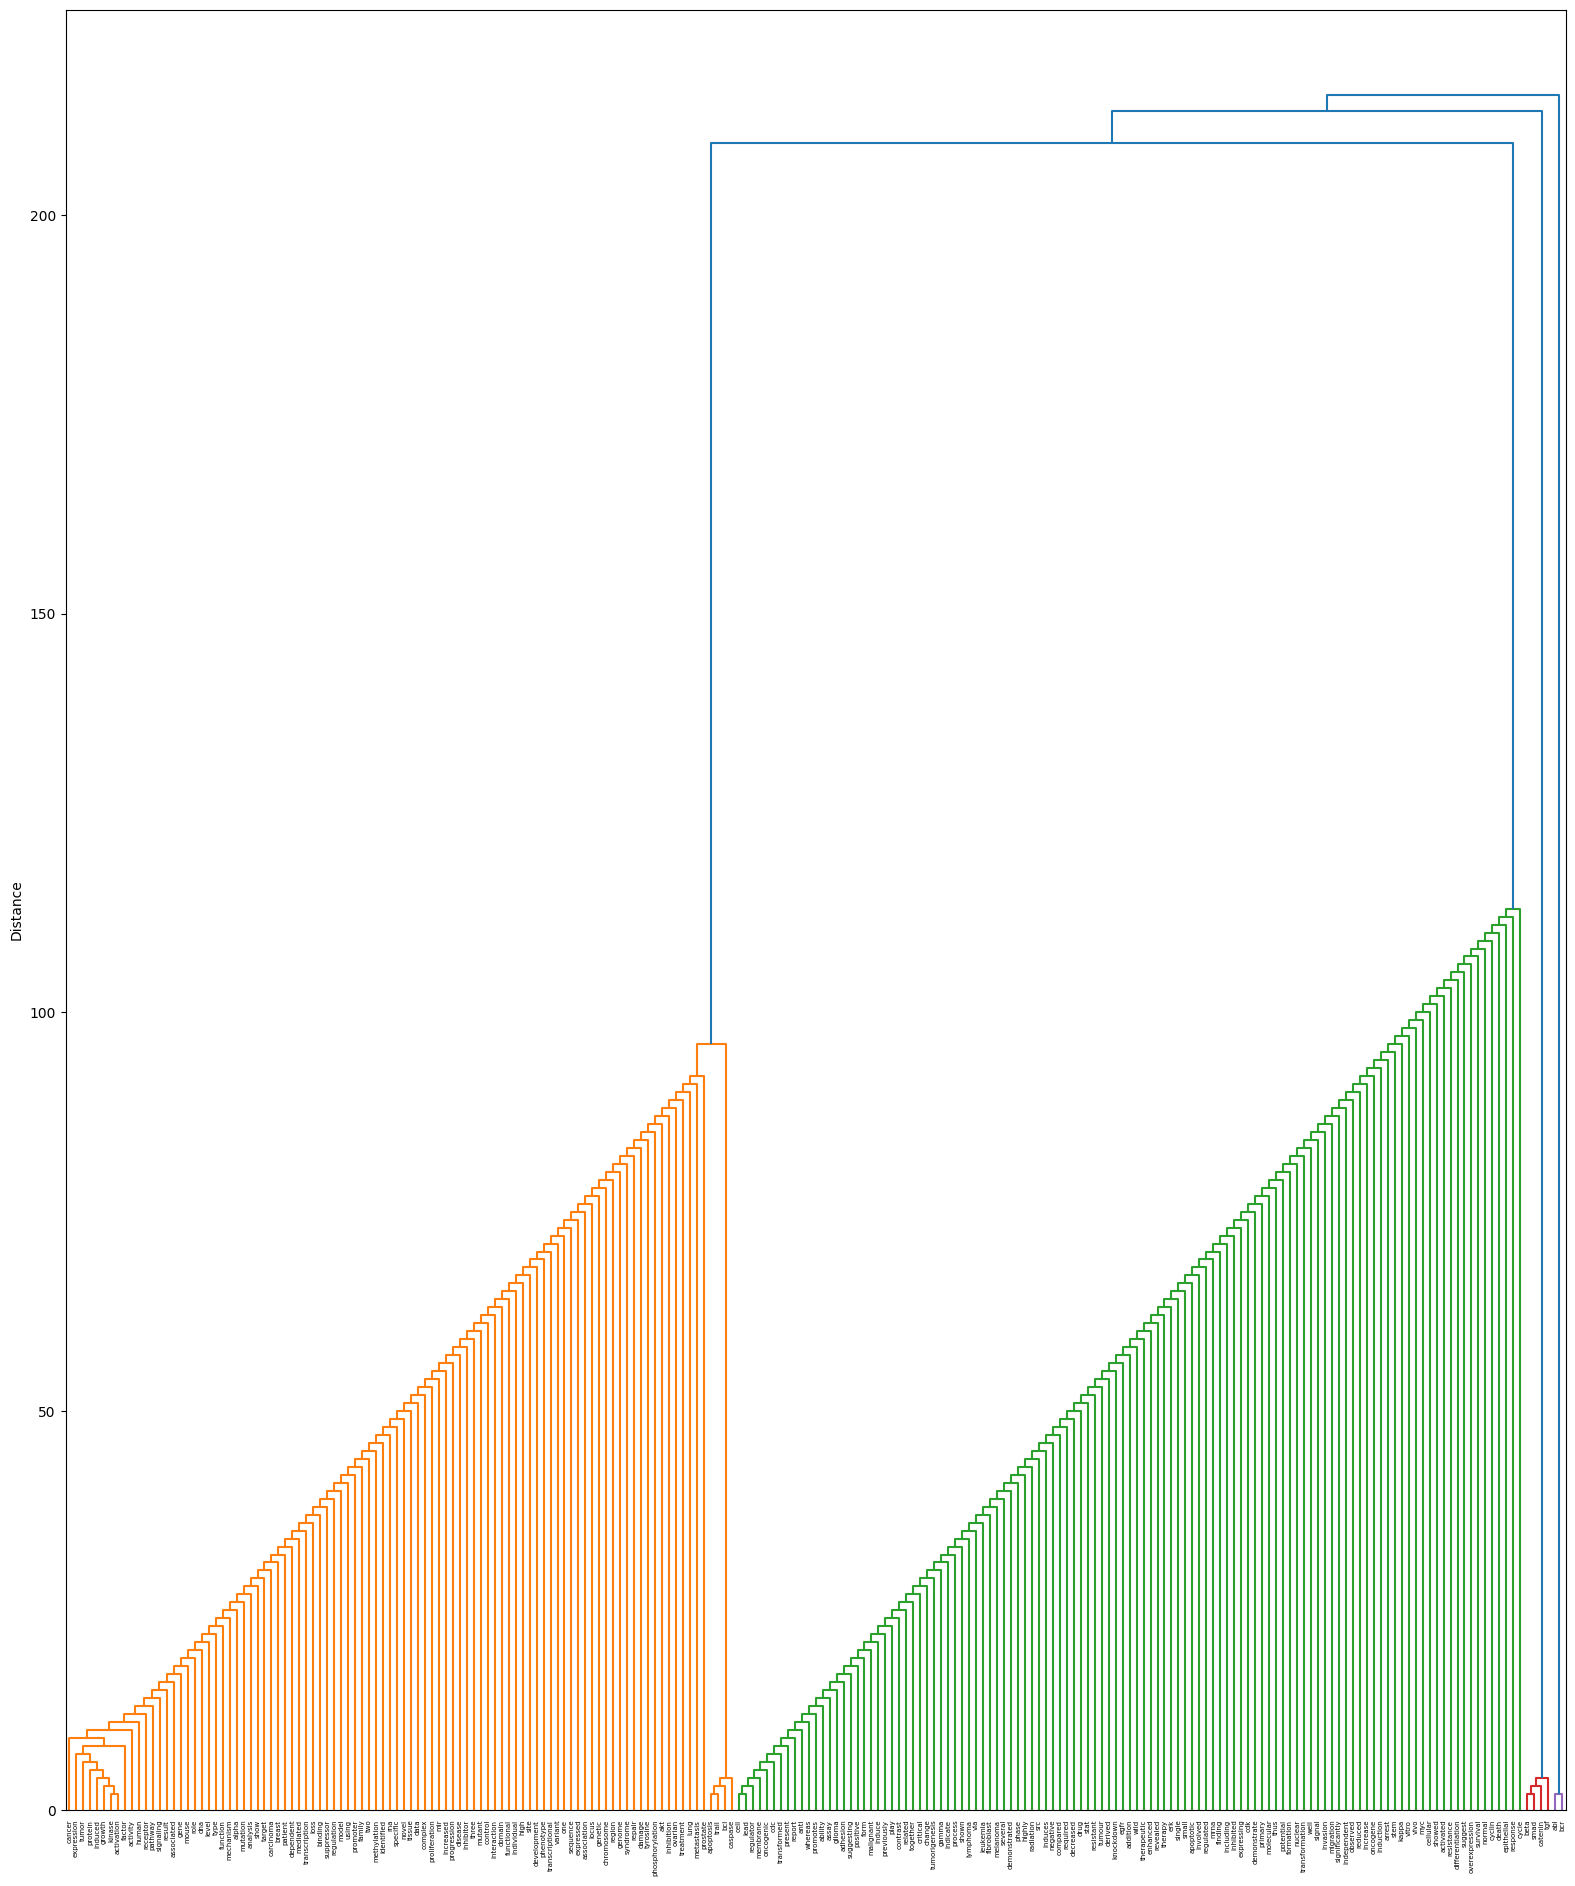

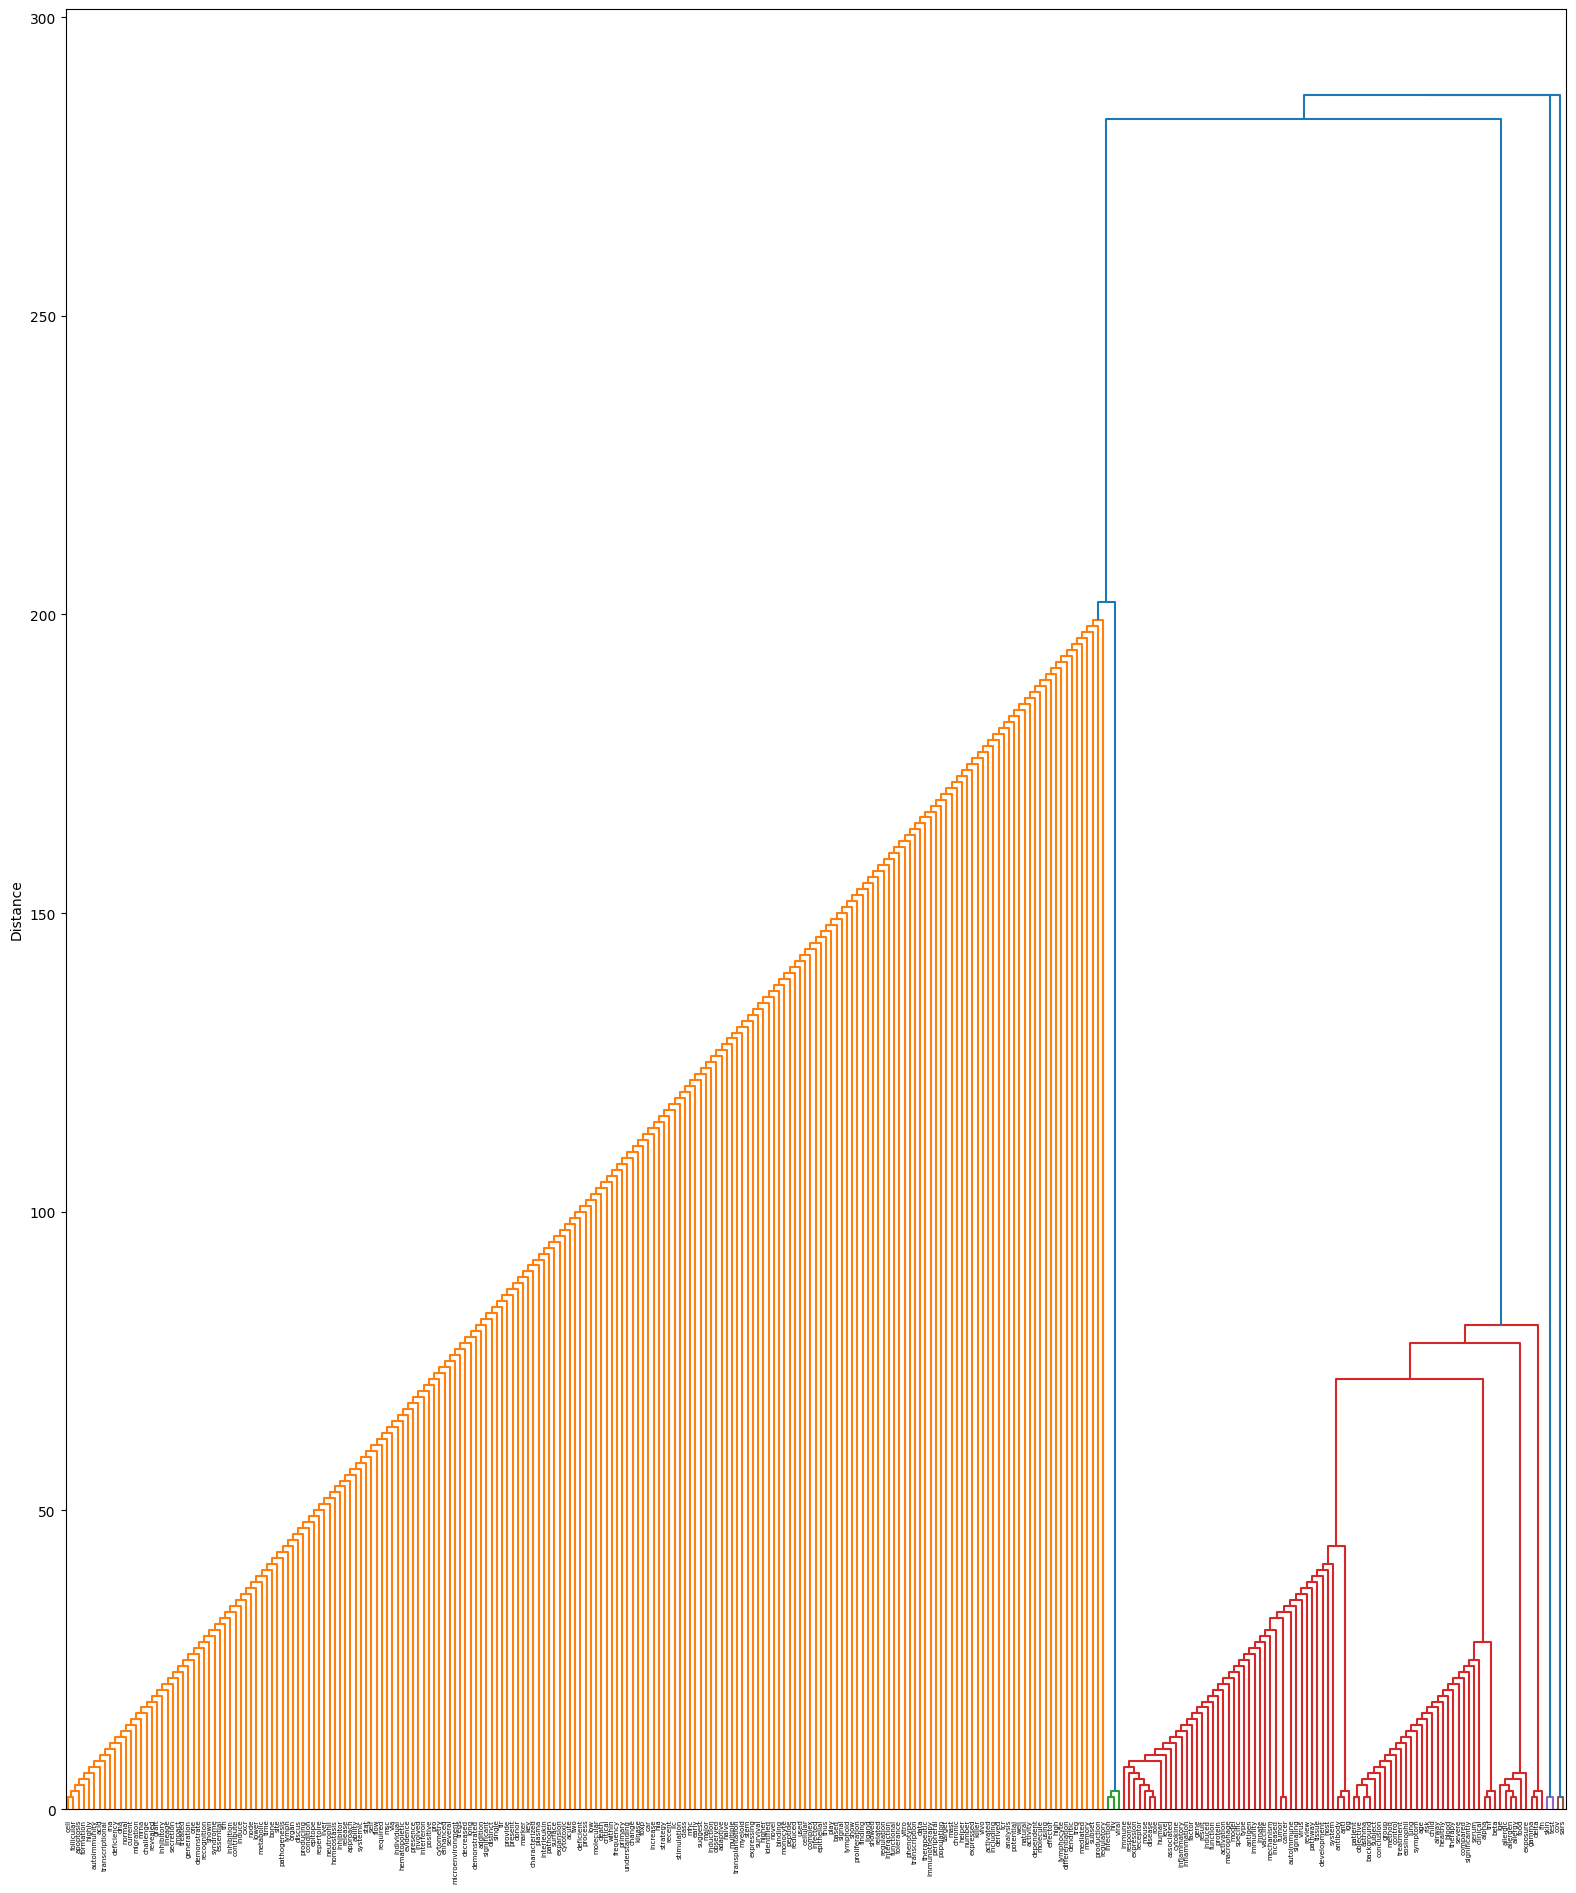

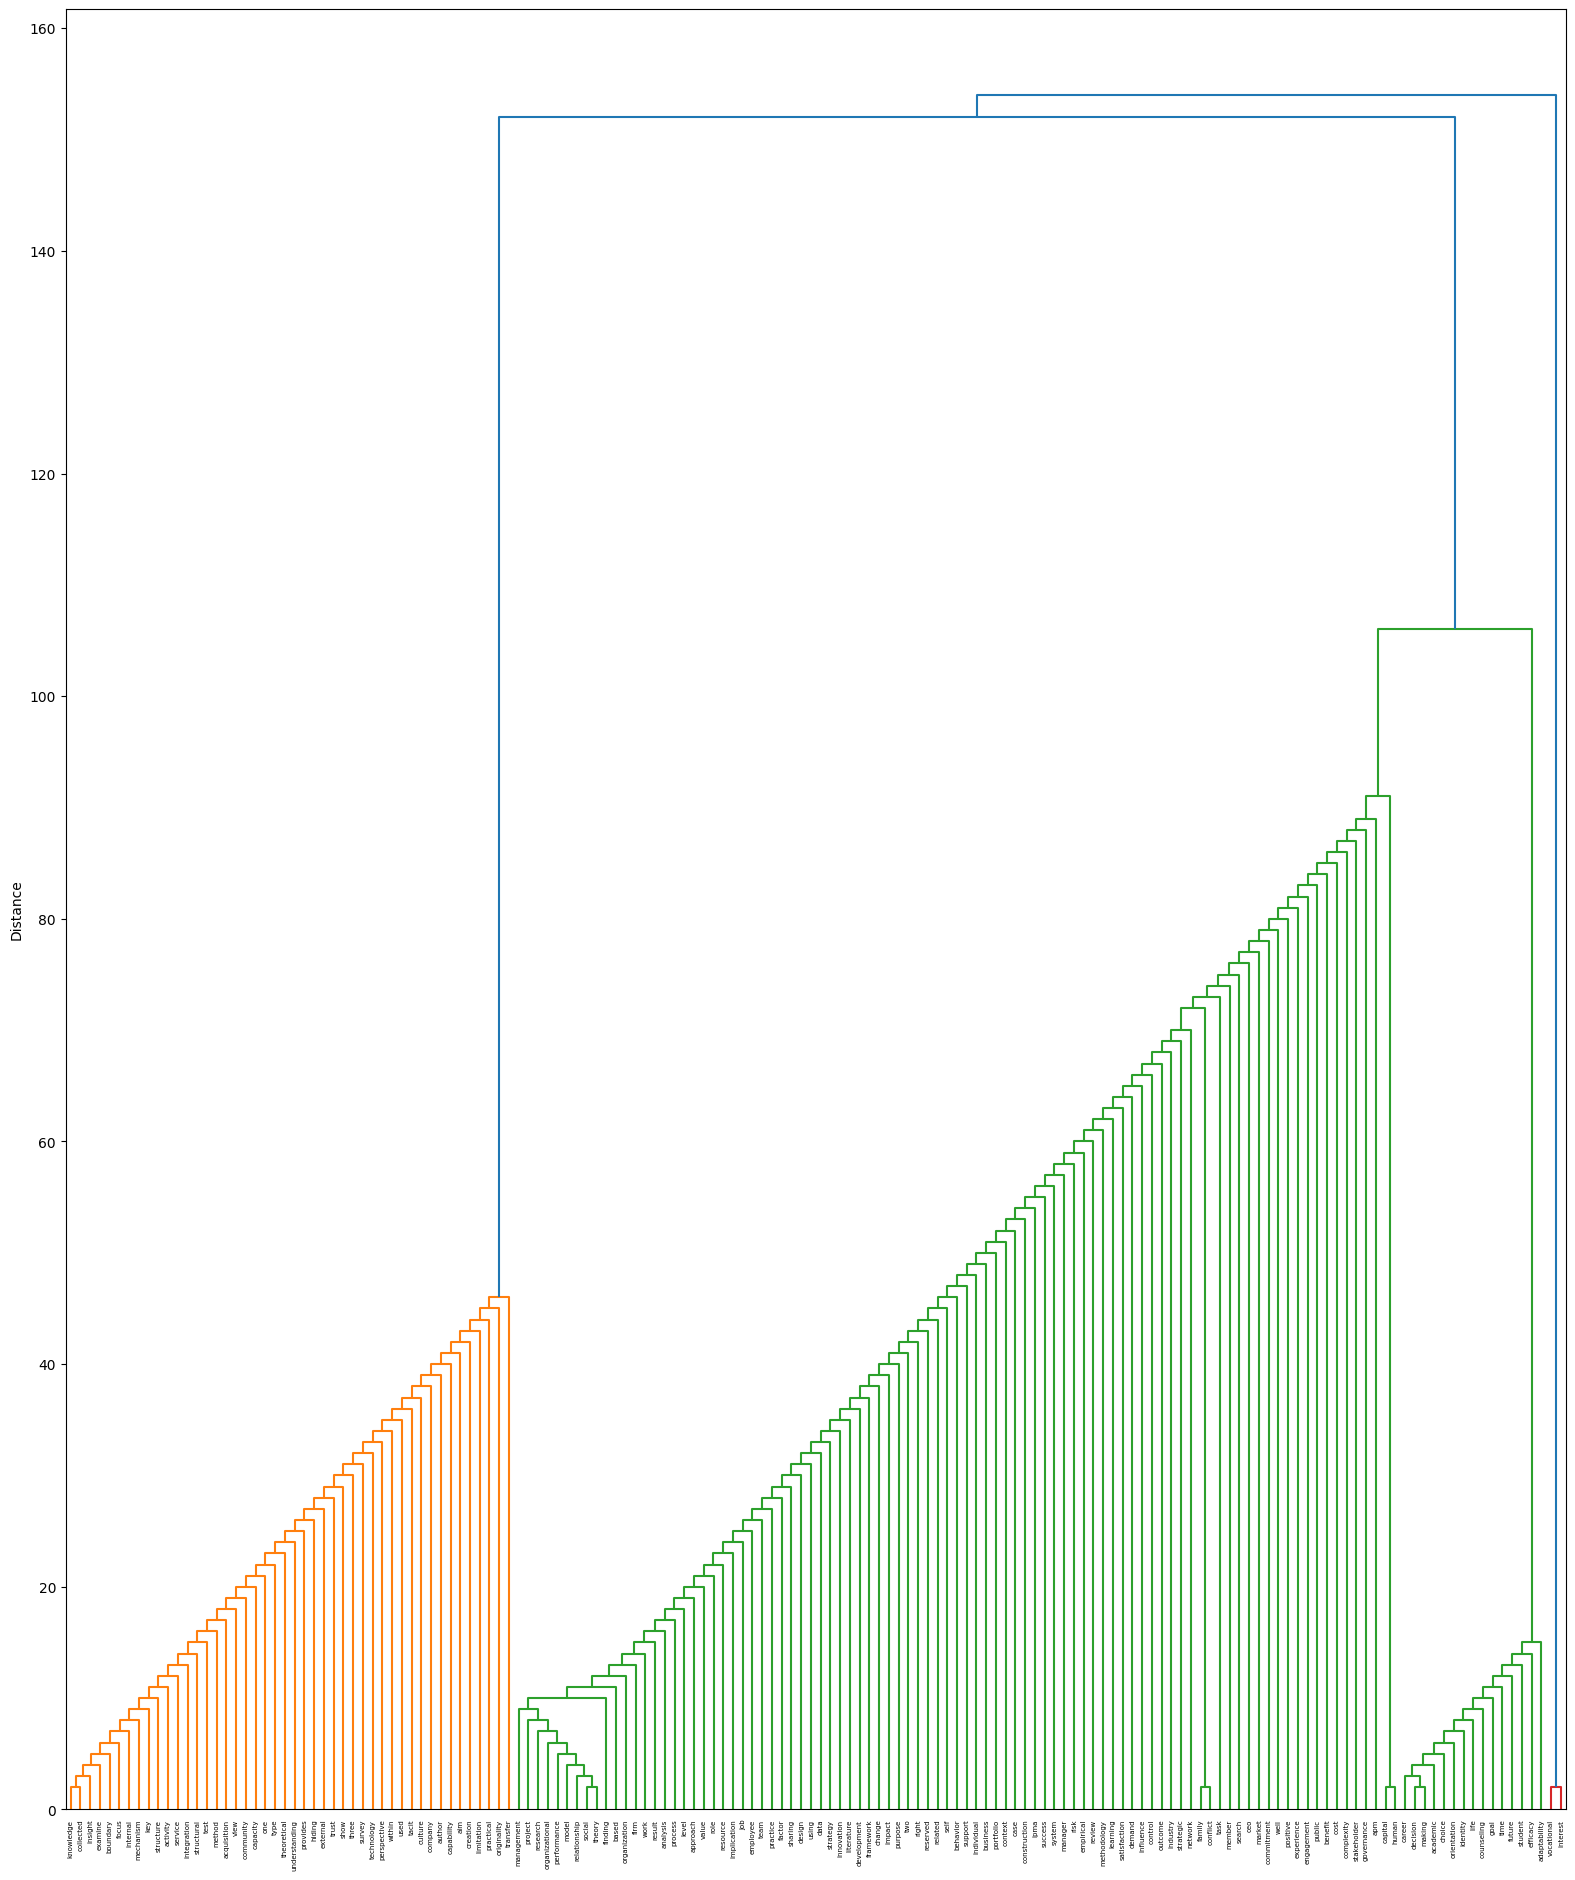

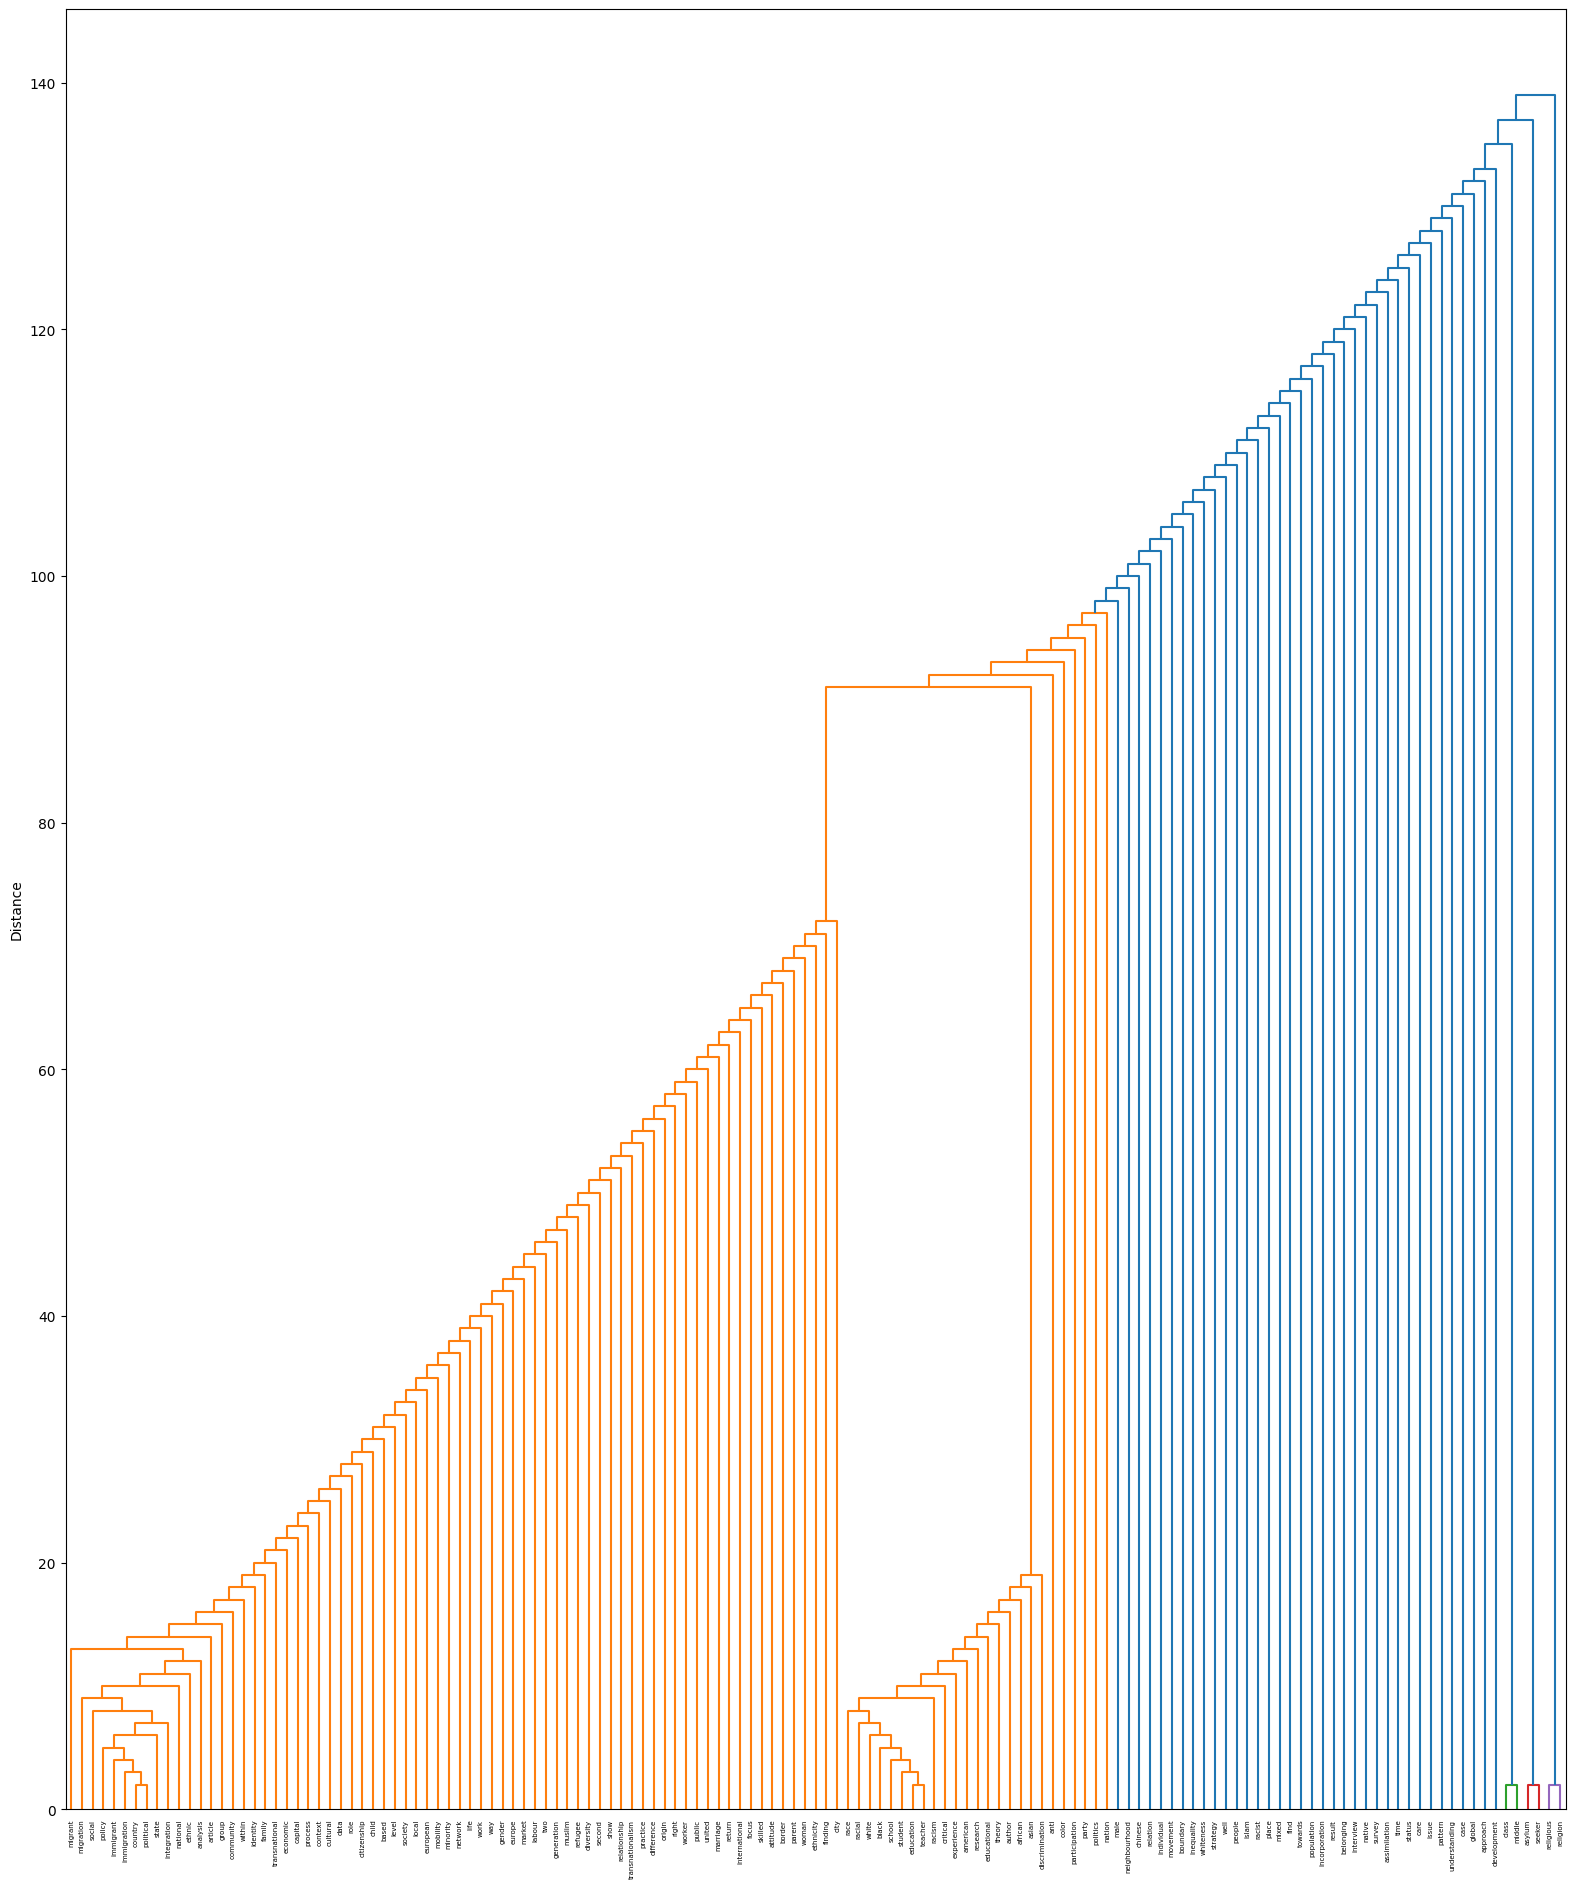

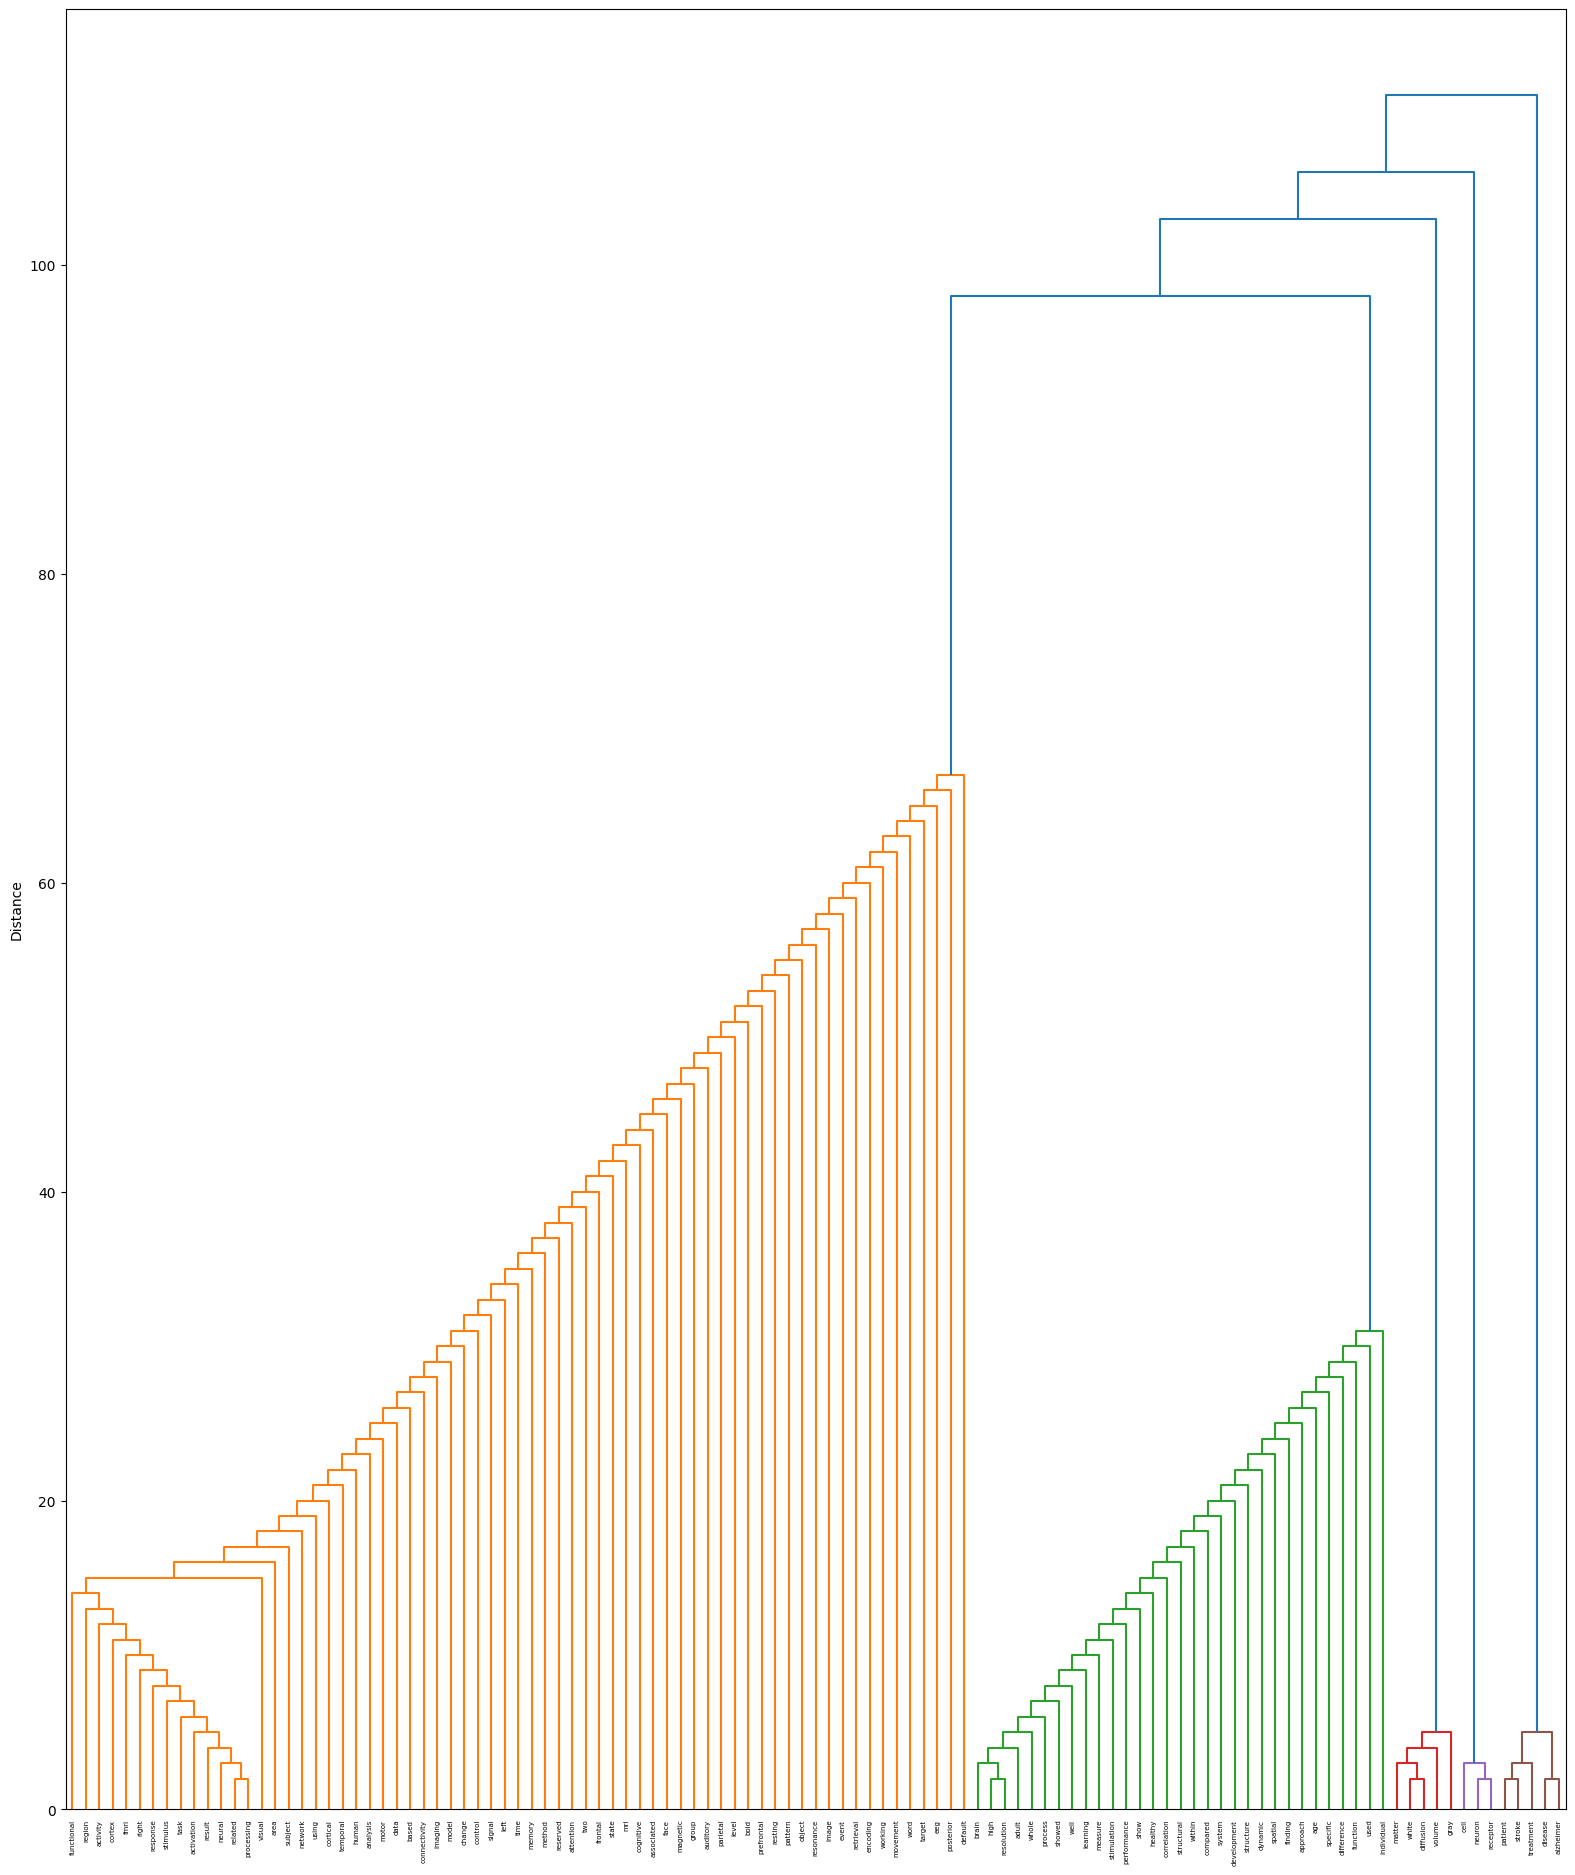

In [8]:
sns.reset_defaults()

for (field_name, G) in Gs.items():

    print(field_name)

    nodes = list(G.nodes)
    comms = list(nx_comm.girvan_newman(G))
    comms.insert(0, (set(nodes),))

    Z, leaves = compute_Z(comms)

    fig = plt.figure(figsize=(15, 18))
    ax = fig.add_axes([0, 0, 1, 1])

    # ax.set_xlabel('Node')
    ax.set_ylabel('Distance')
    
    dendrogram(Z, labels=leaves, ax=ax)
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    fig.tight_layout()

    plt.savefig(
        os.path.join(LATEX_FIGURES_PATH, 'co_occurrence_girvan_newman_hier_comm', f'{field_name.capitalize()}.png'), 
        transparent=True, 
        dpi=300,
        bbox_inches='tight'
    )

# Louvain

Gender Studies


/var/folders/rz/n4jmlyh1355cy_wkn5gd00x40000gn/T/ipykernel_66818/2213384275.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Geometry
Geophysics
Economics
Language & Linguistics
Probability & Statistics
Material Engineering
Artificial Intelligence
Sociology
International Business
Political Science
Genetics & Genomics
Immunology
Human Resources & Organizations
Ethnic & Cultural Studies
Neurology


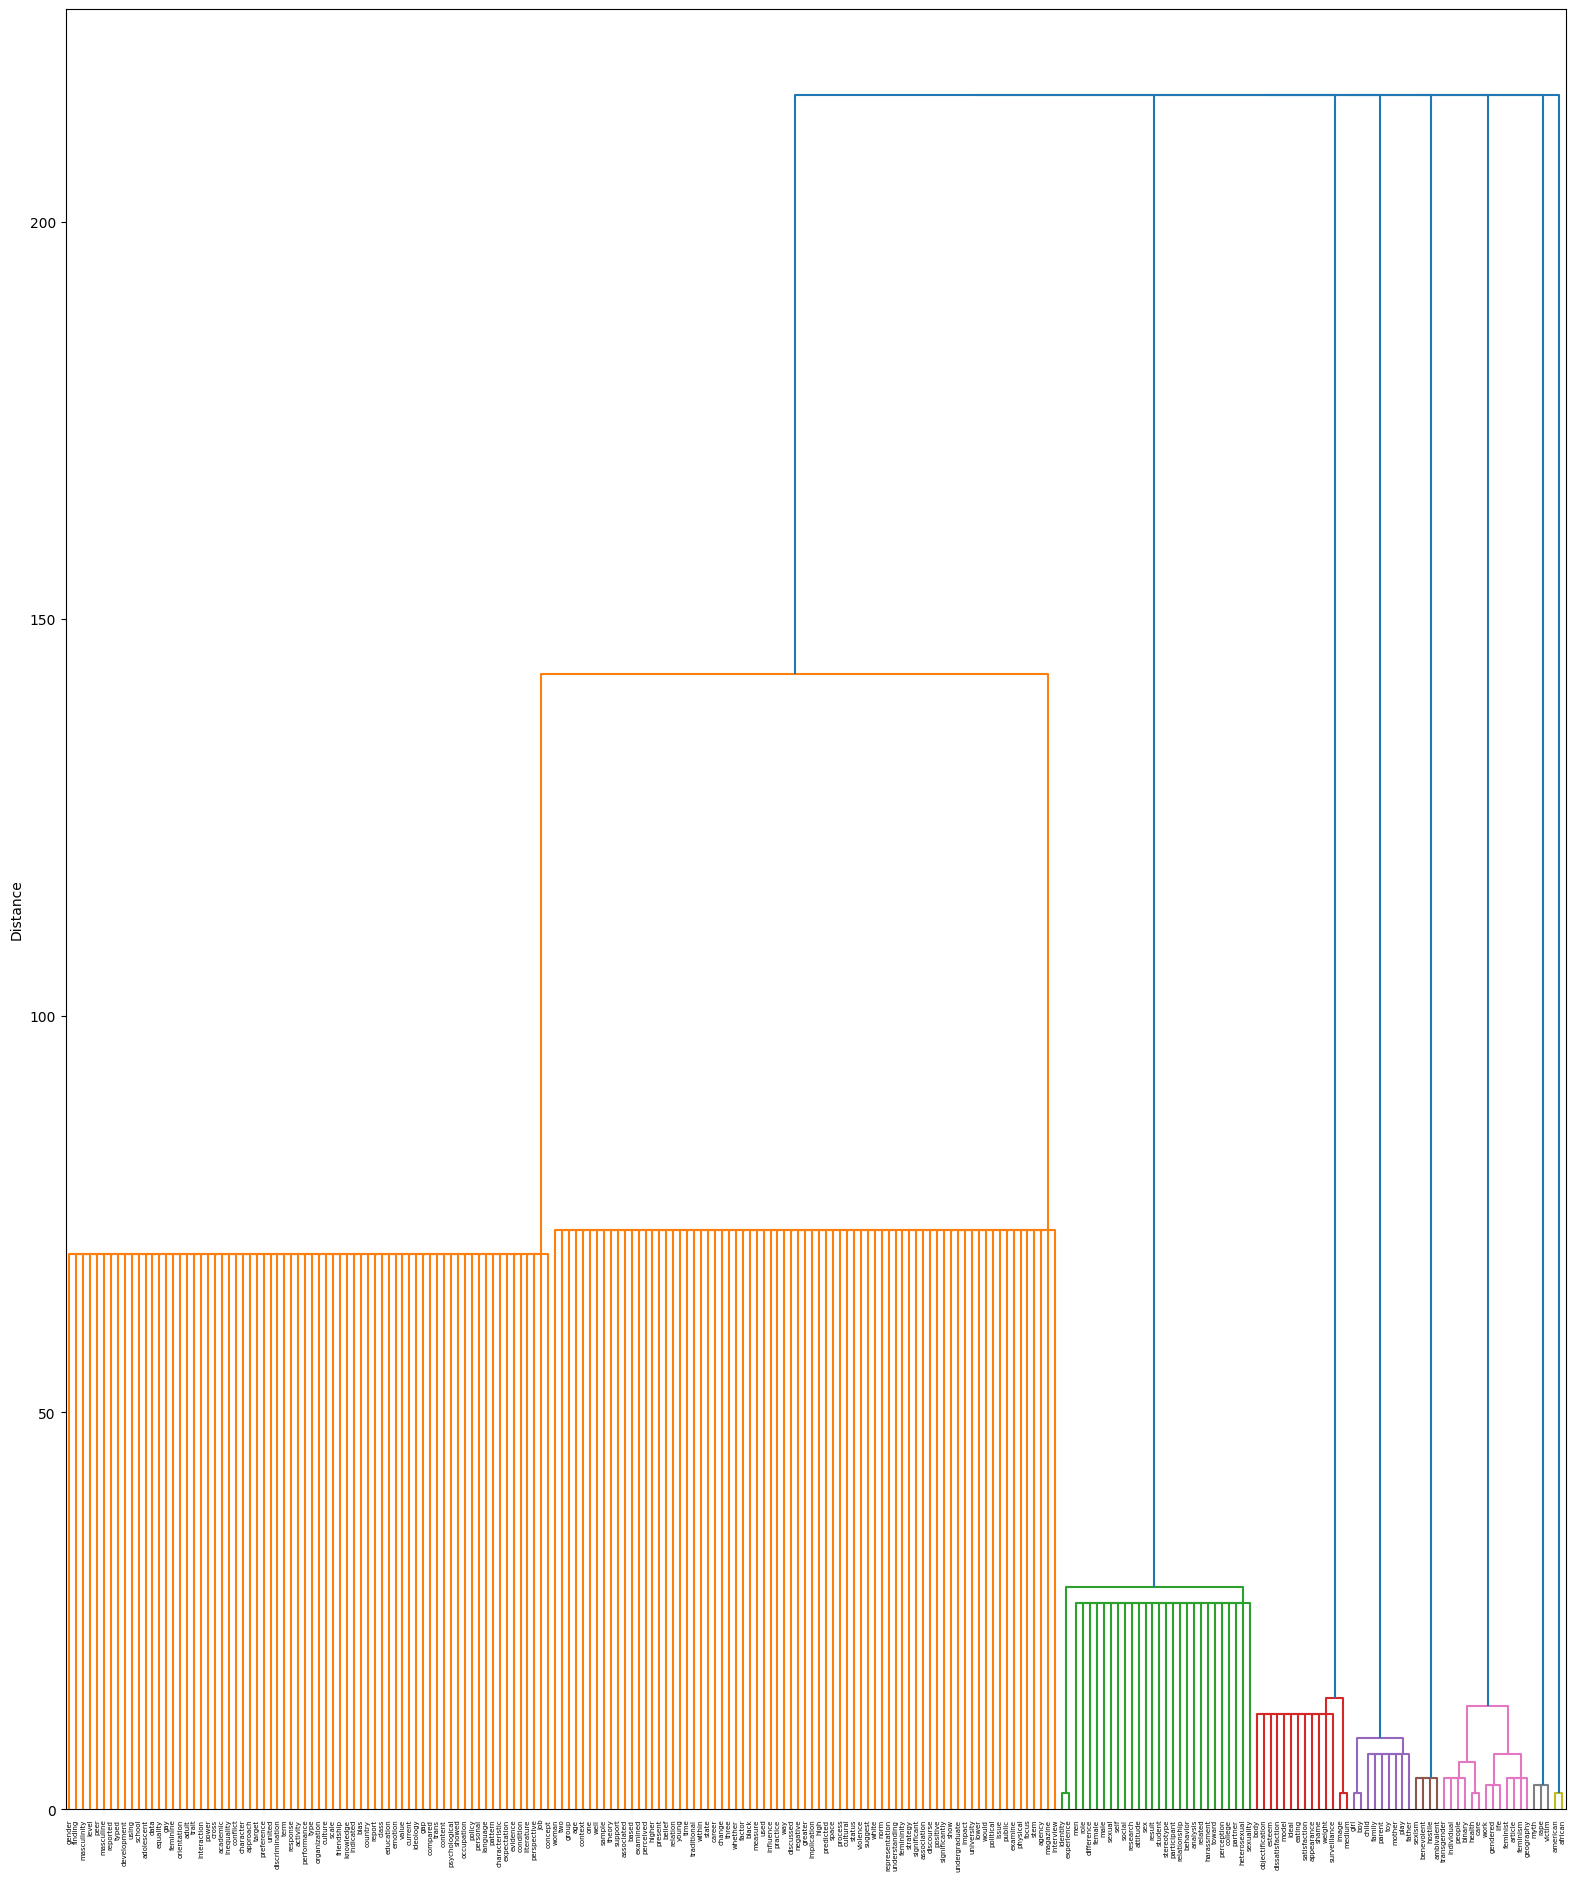

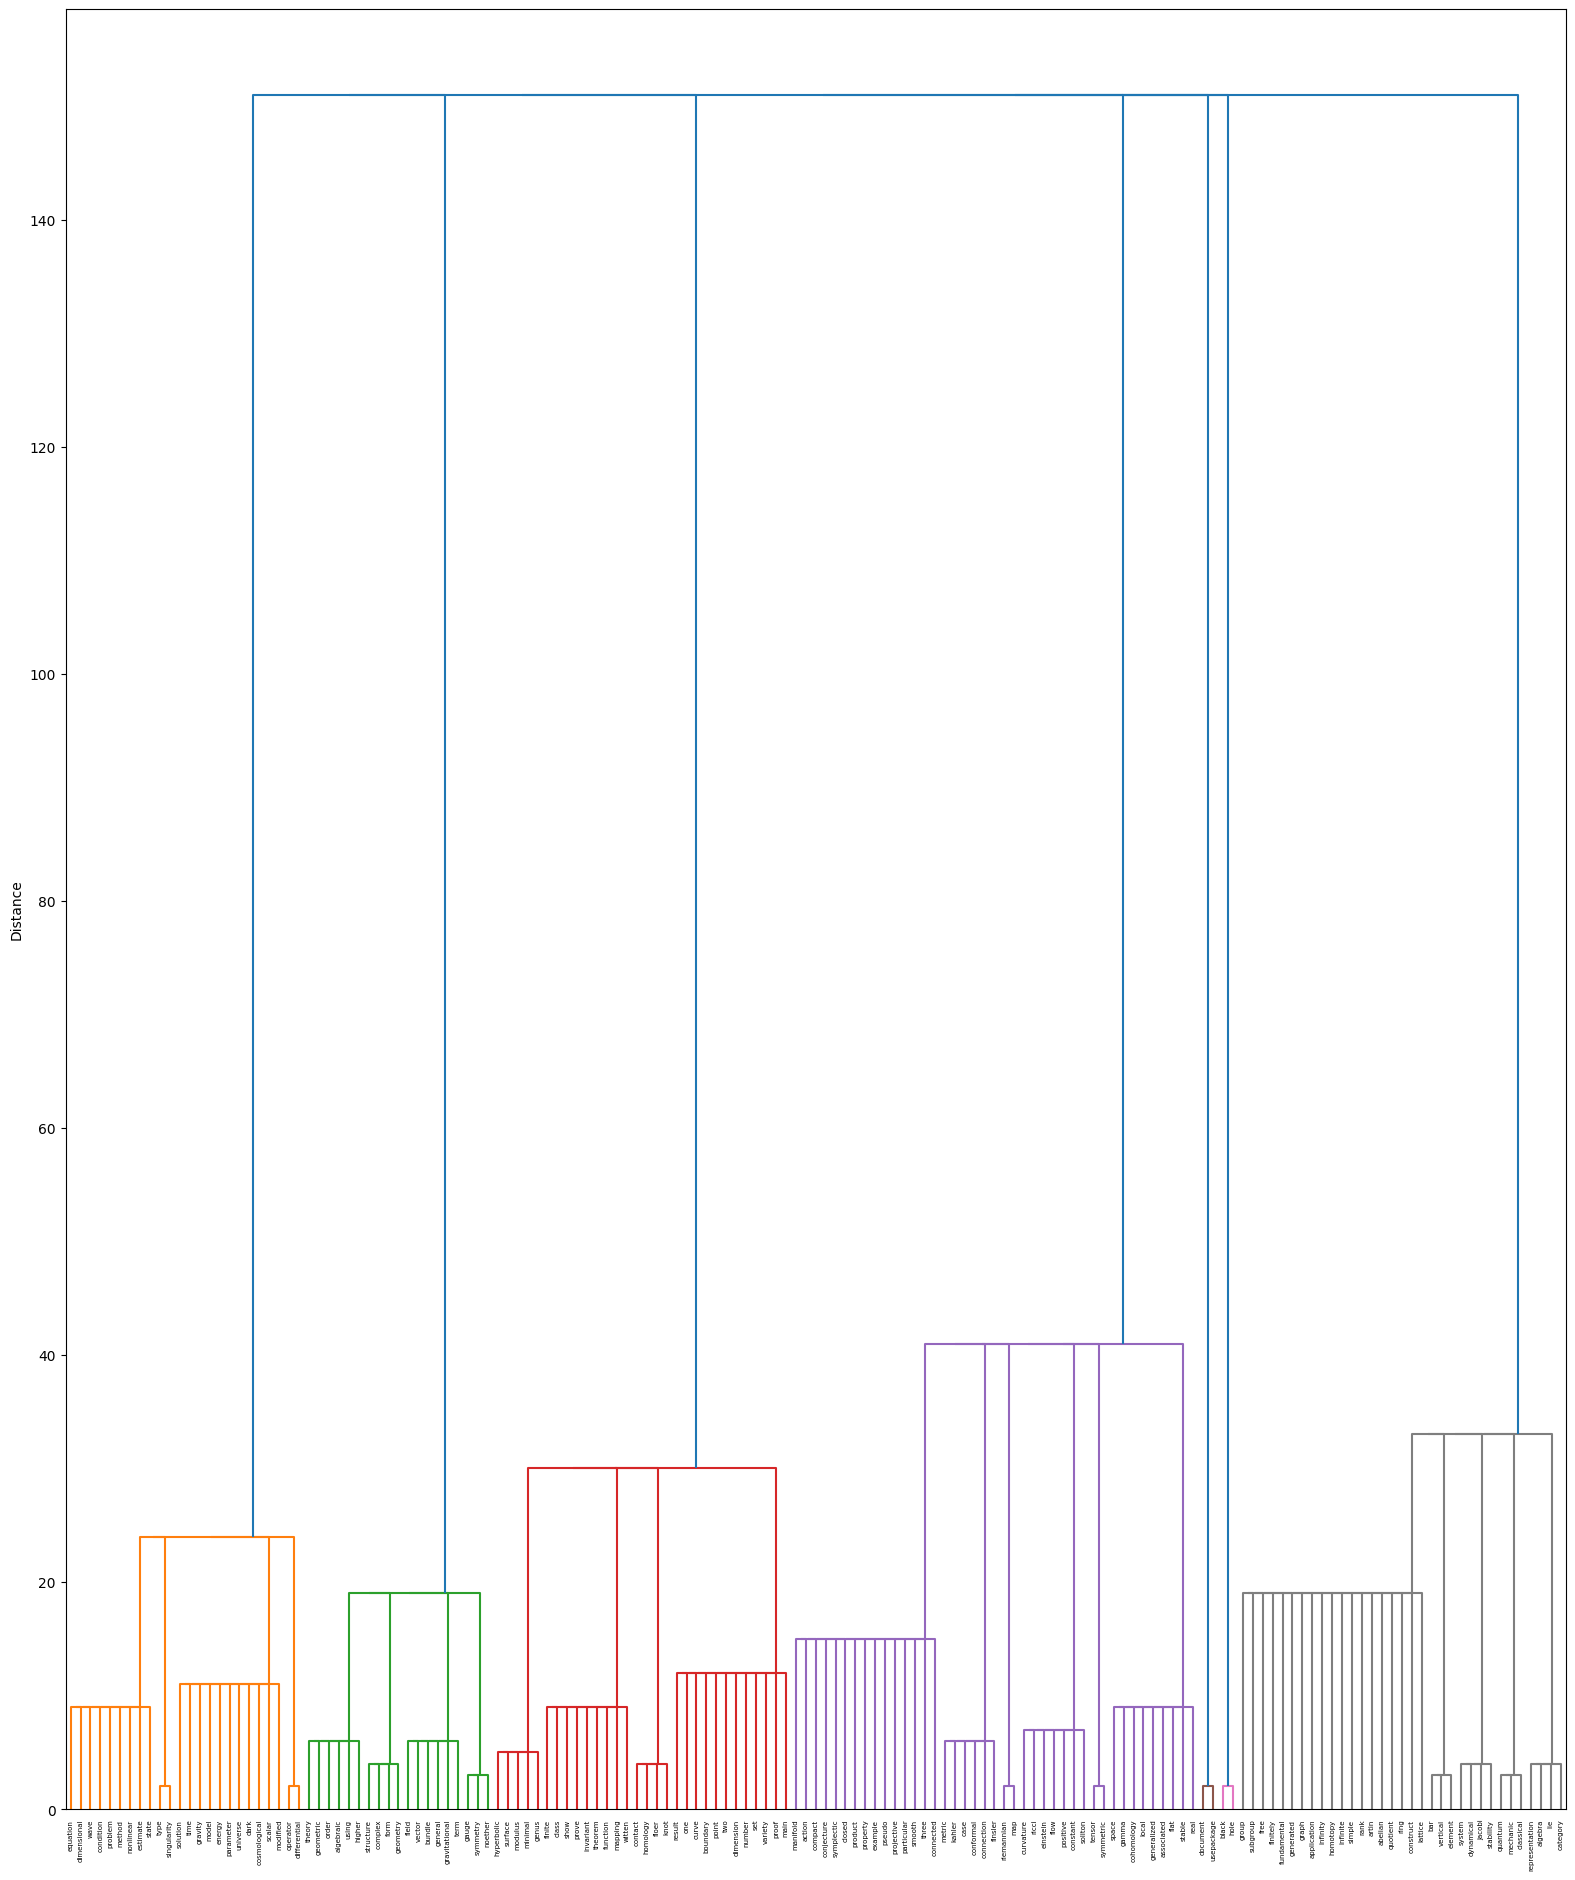

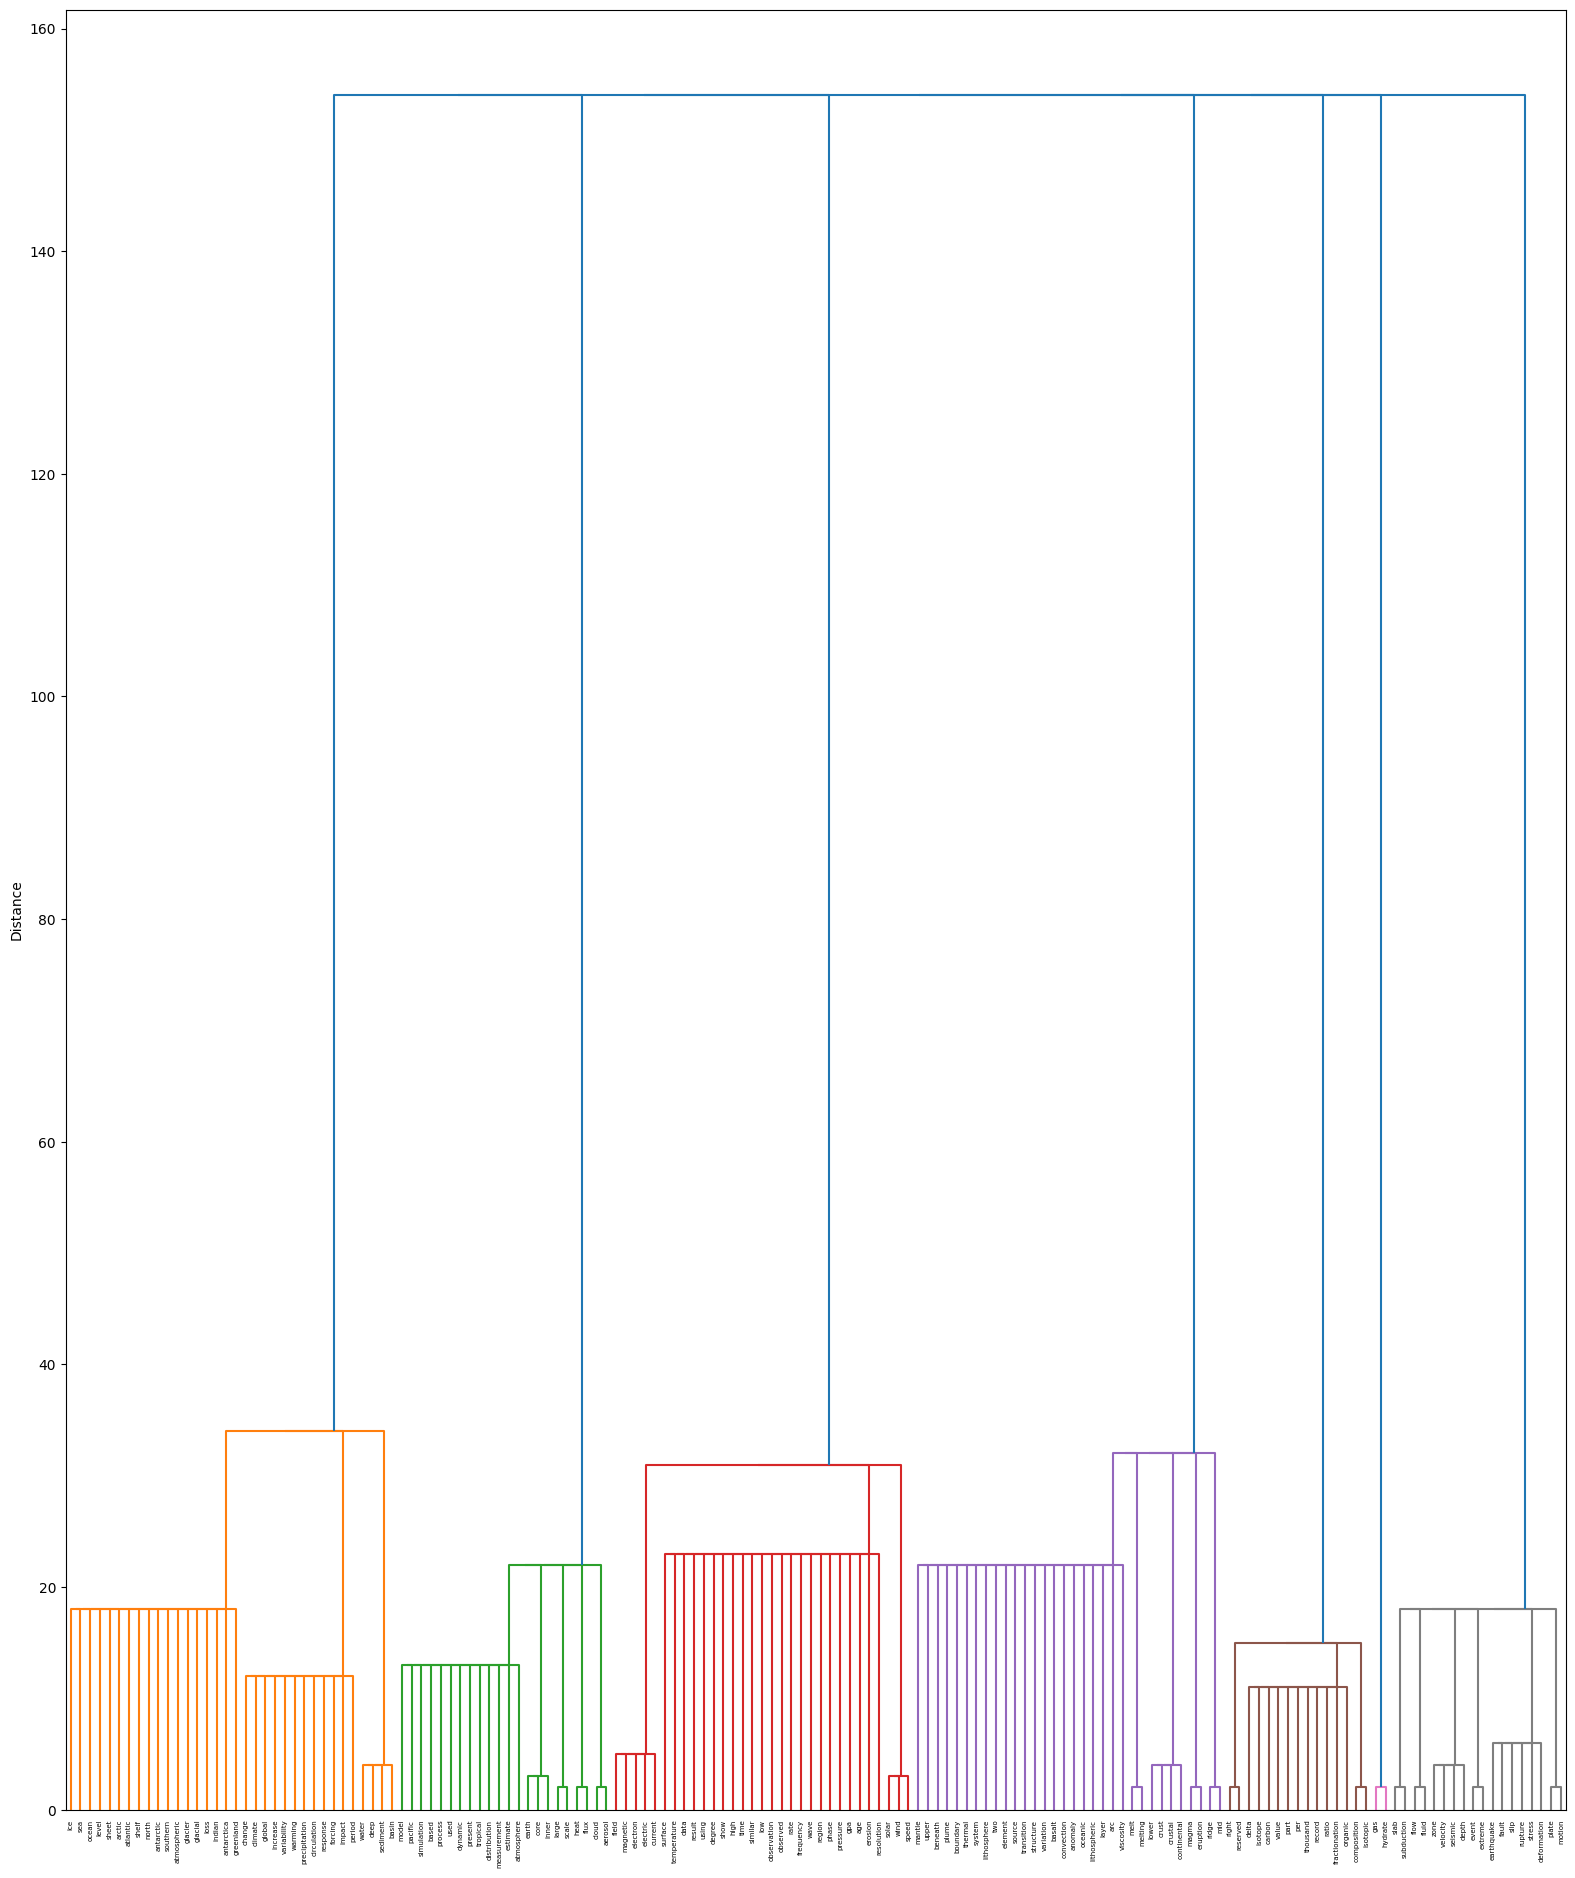

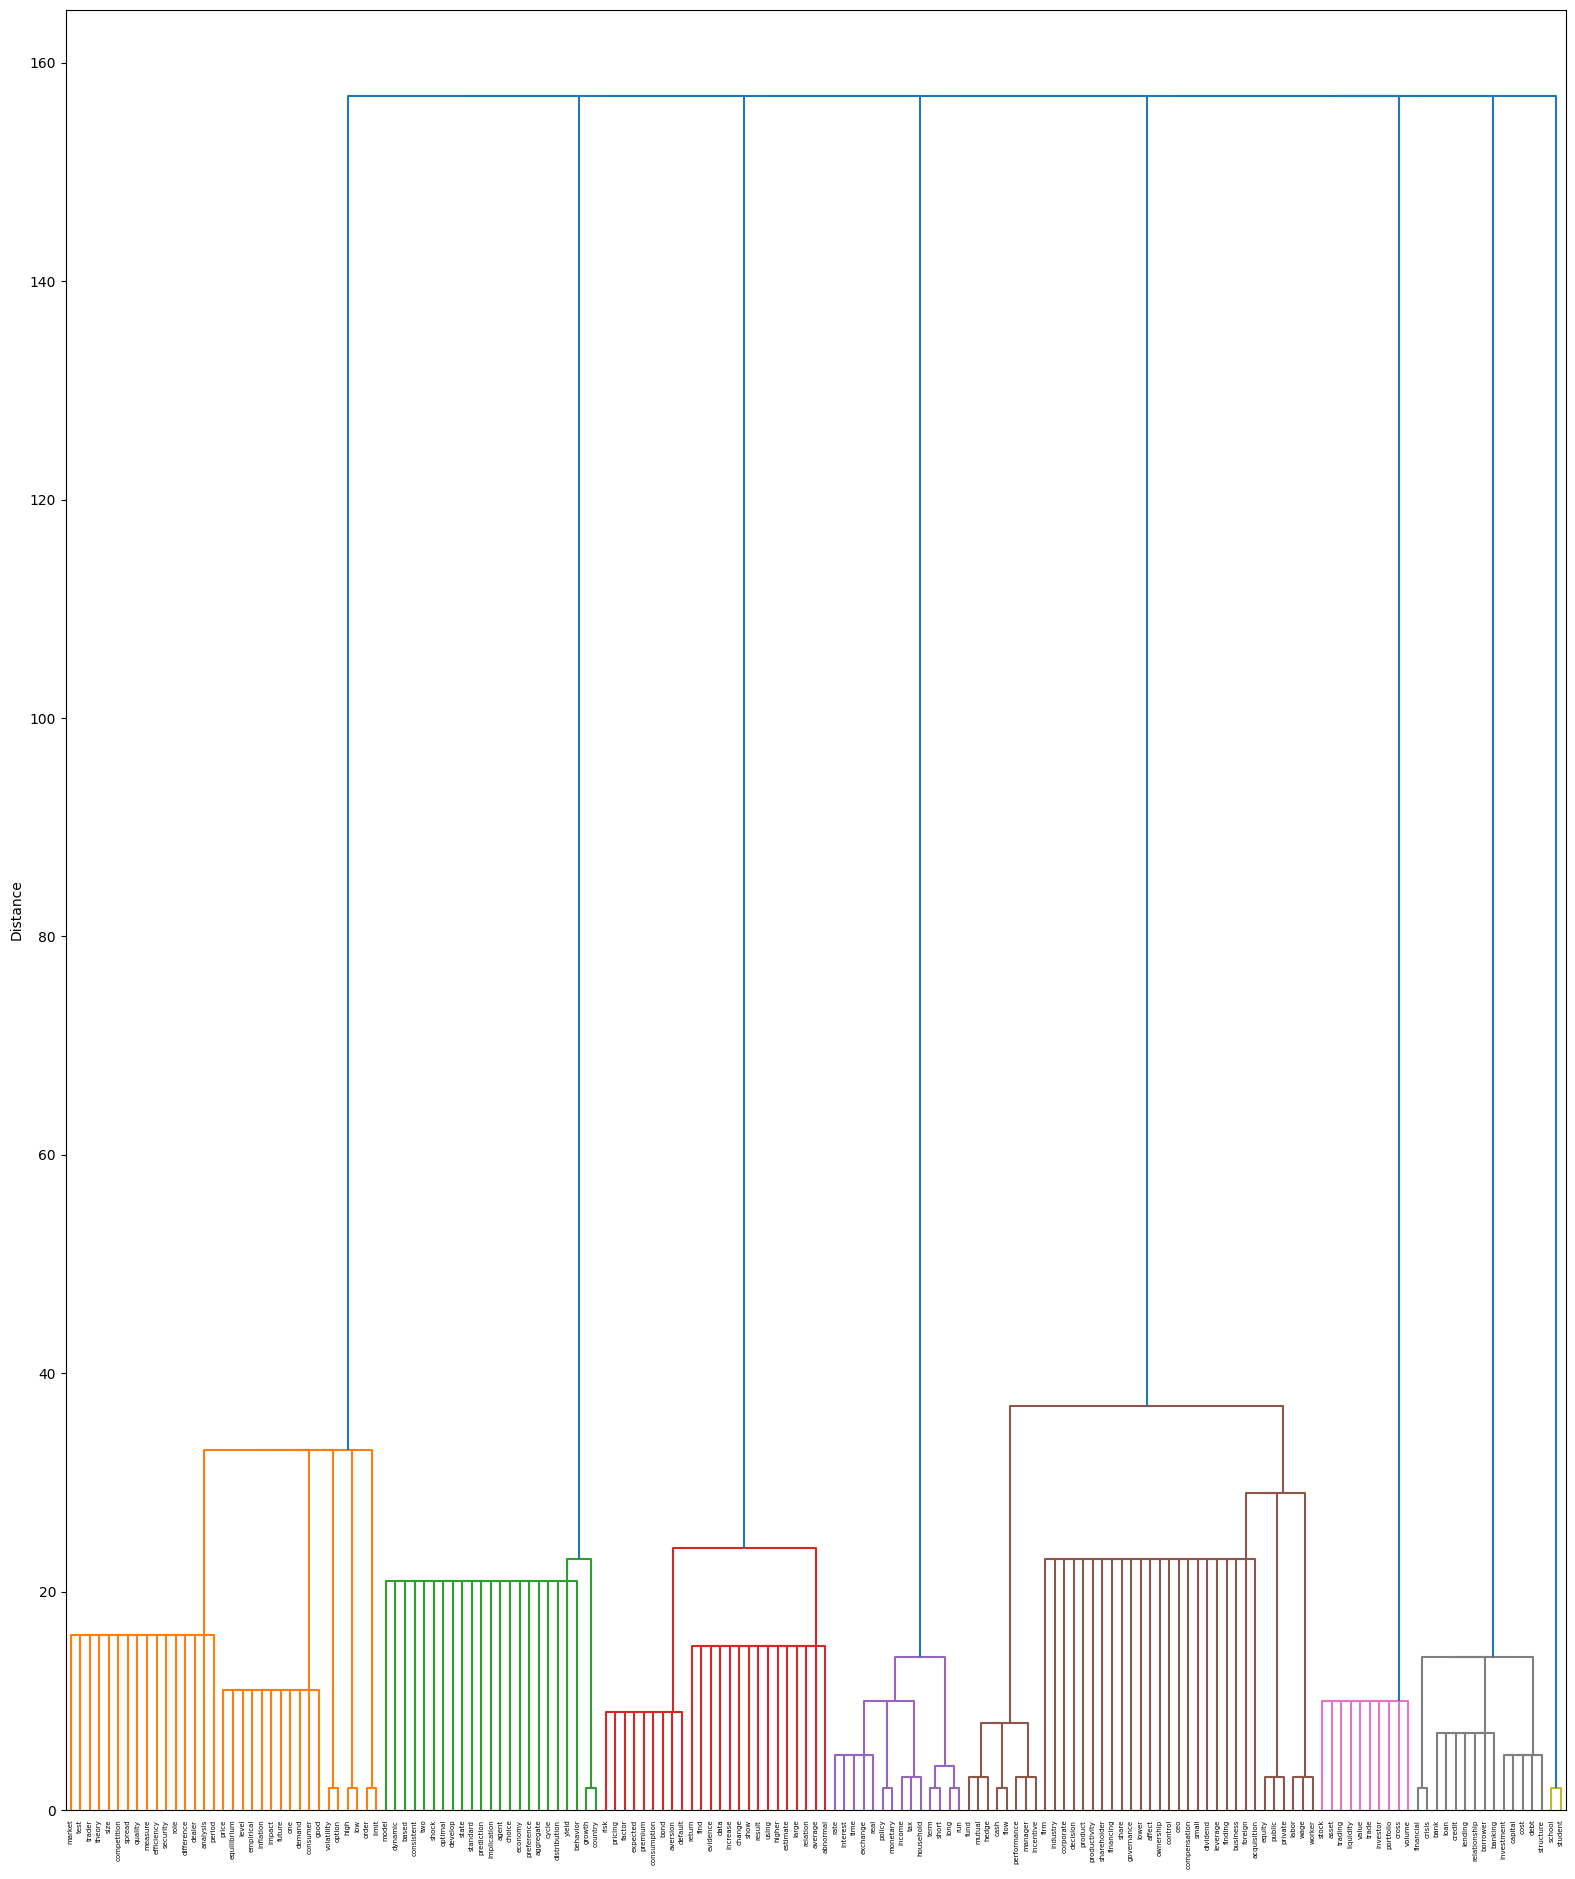

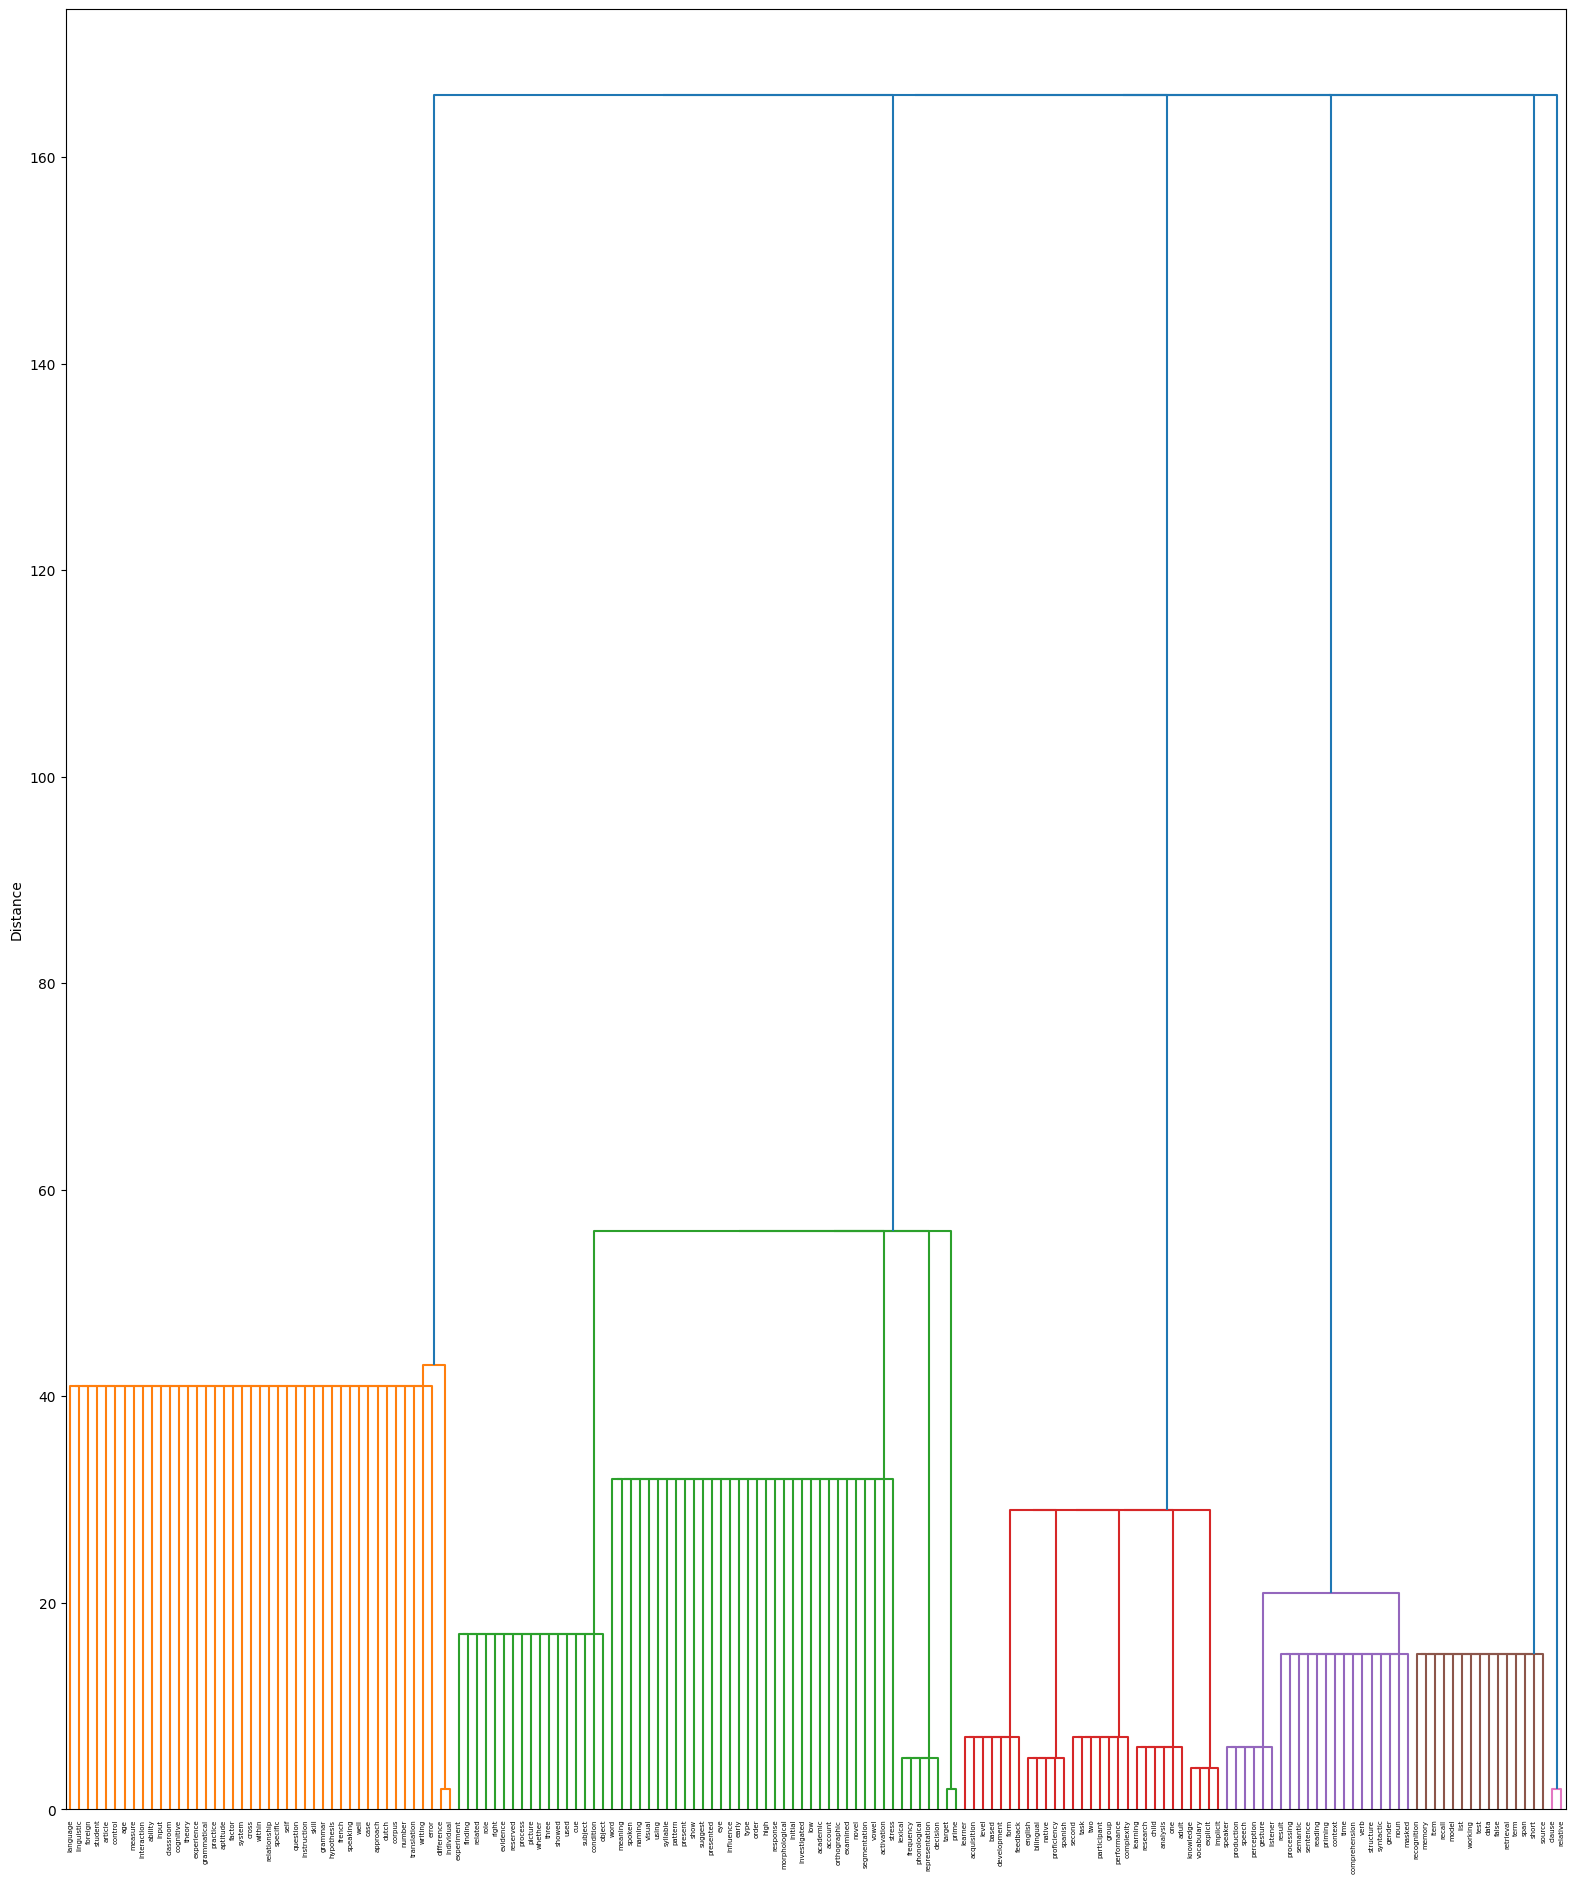

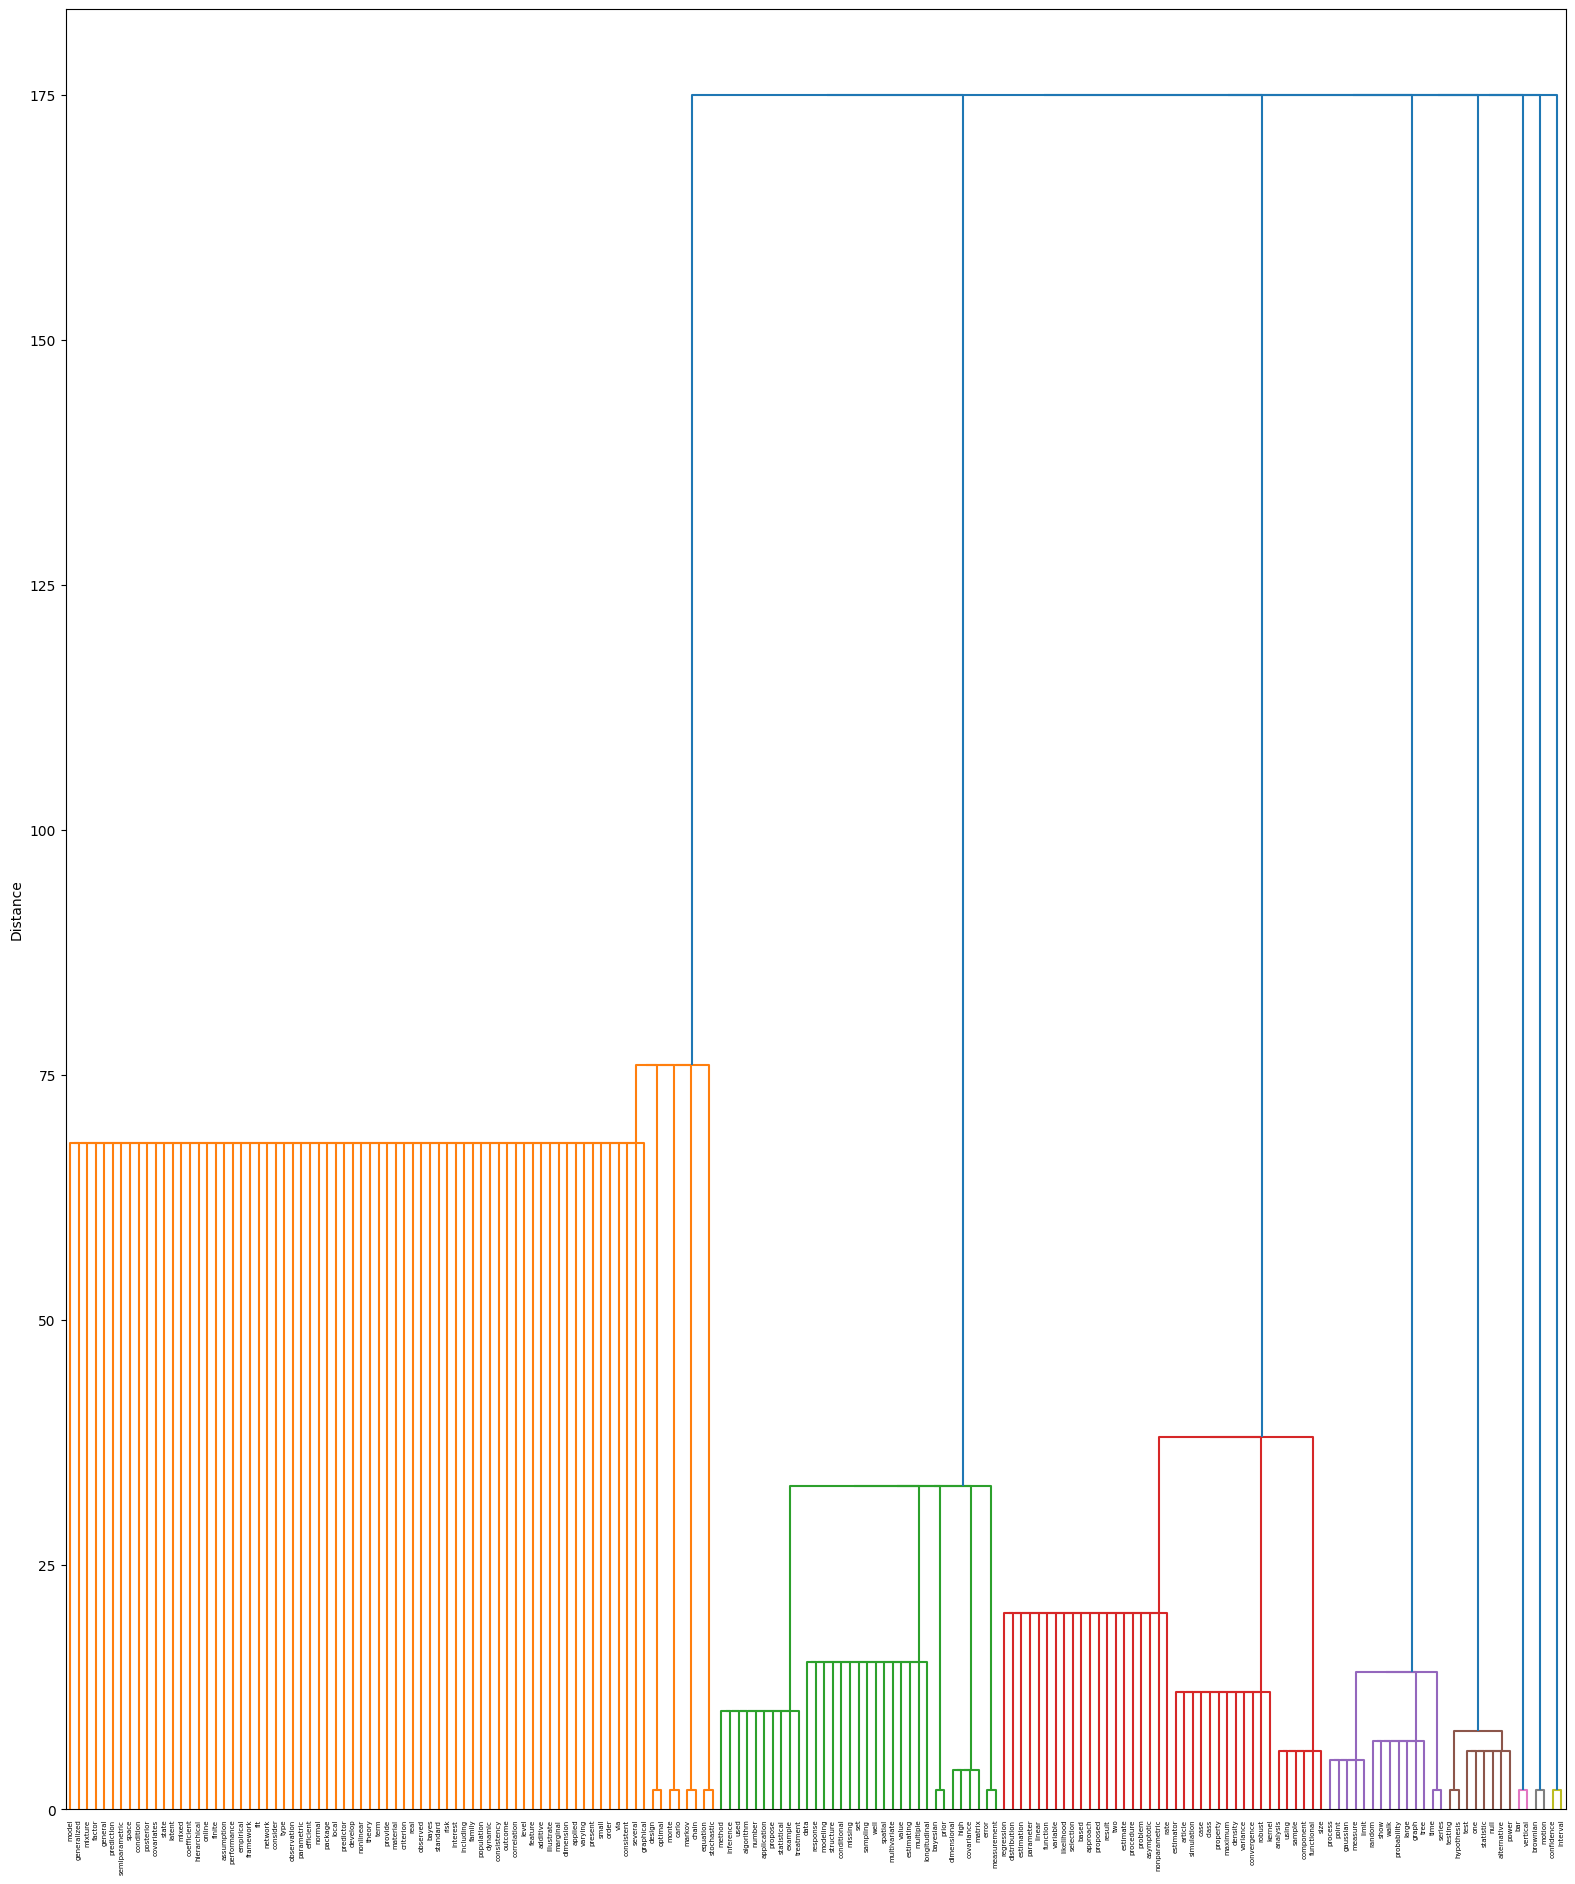

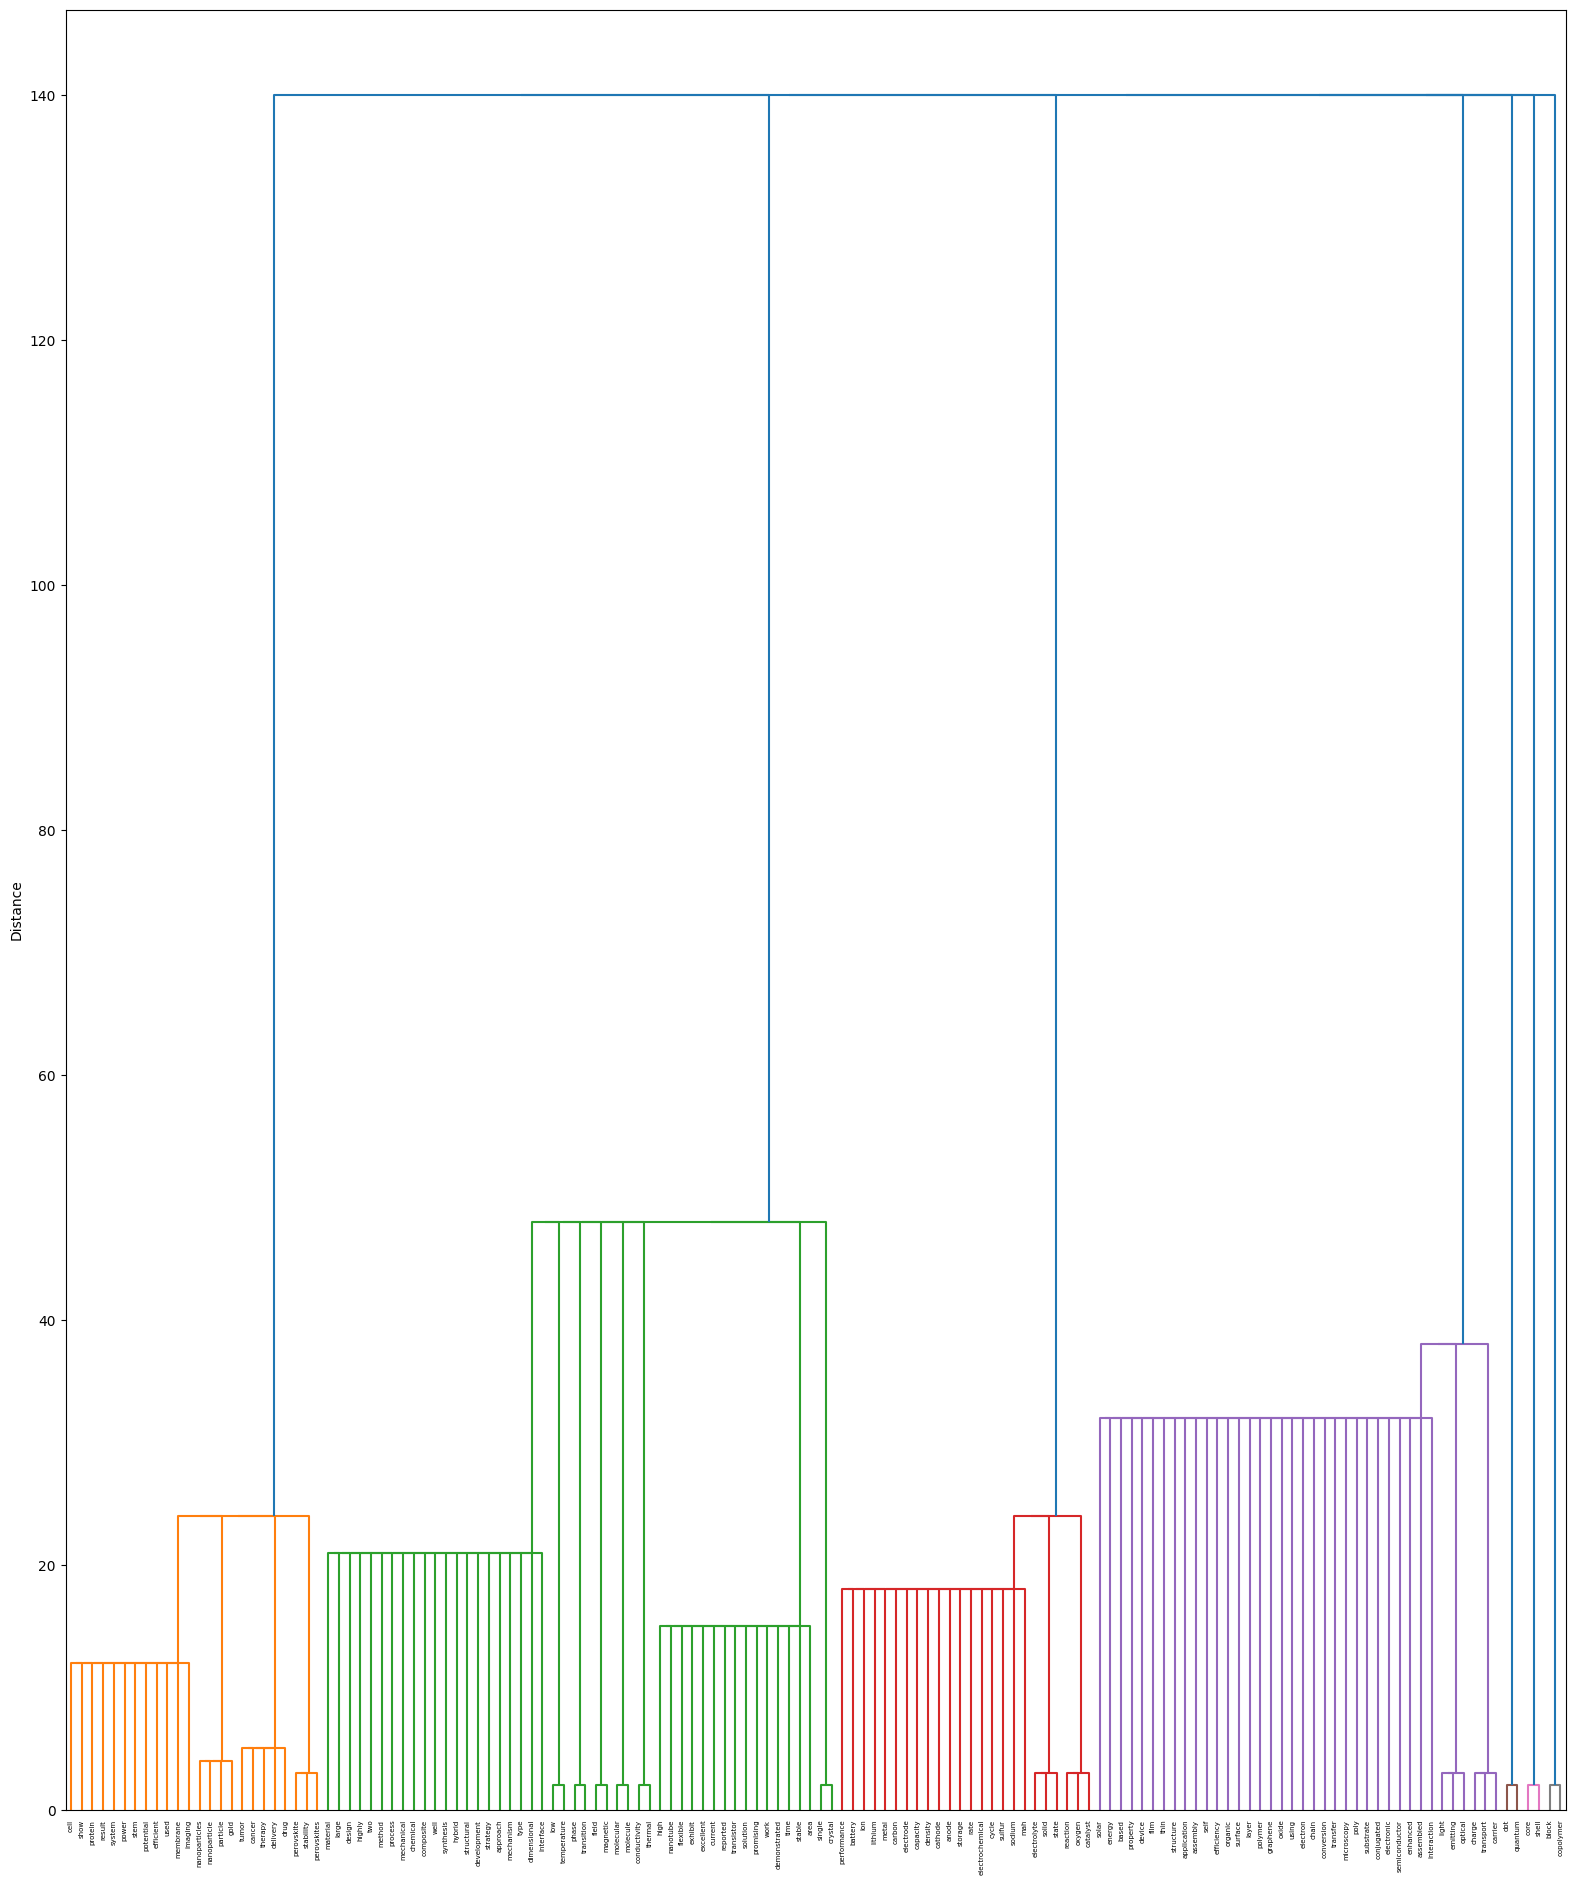

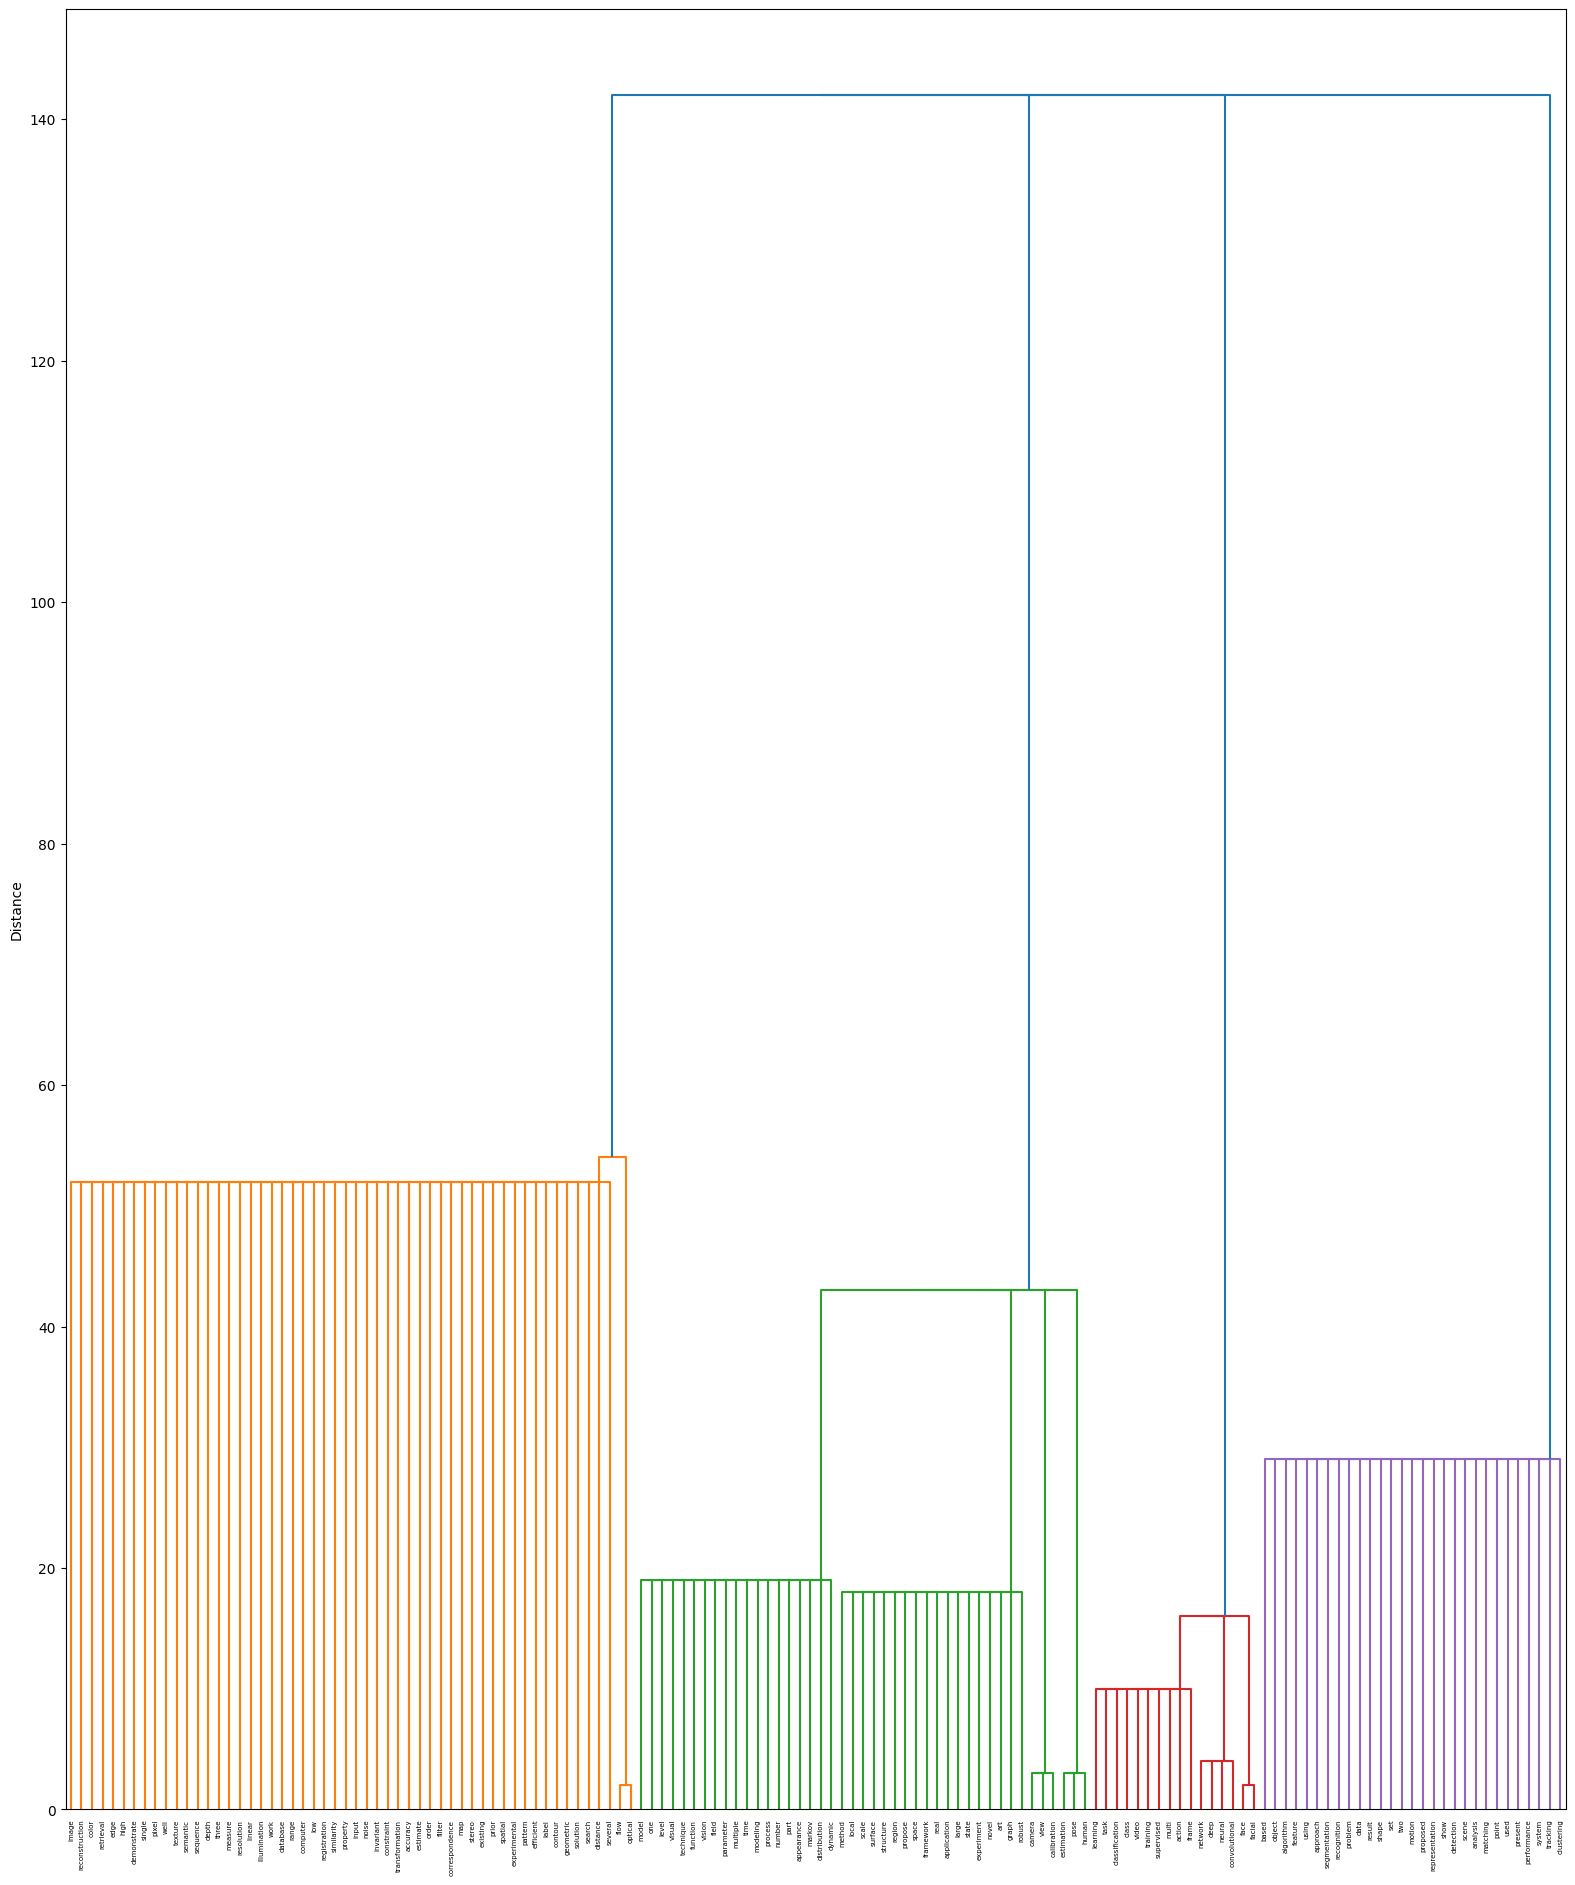

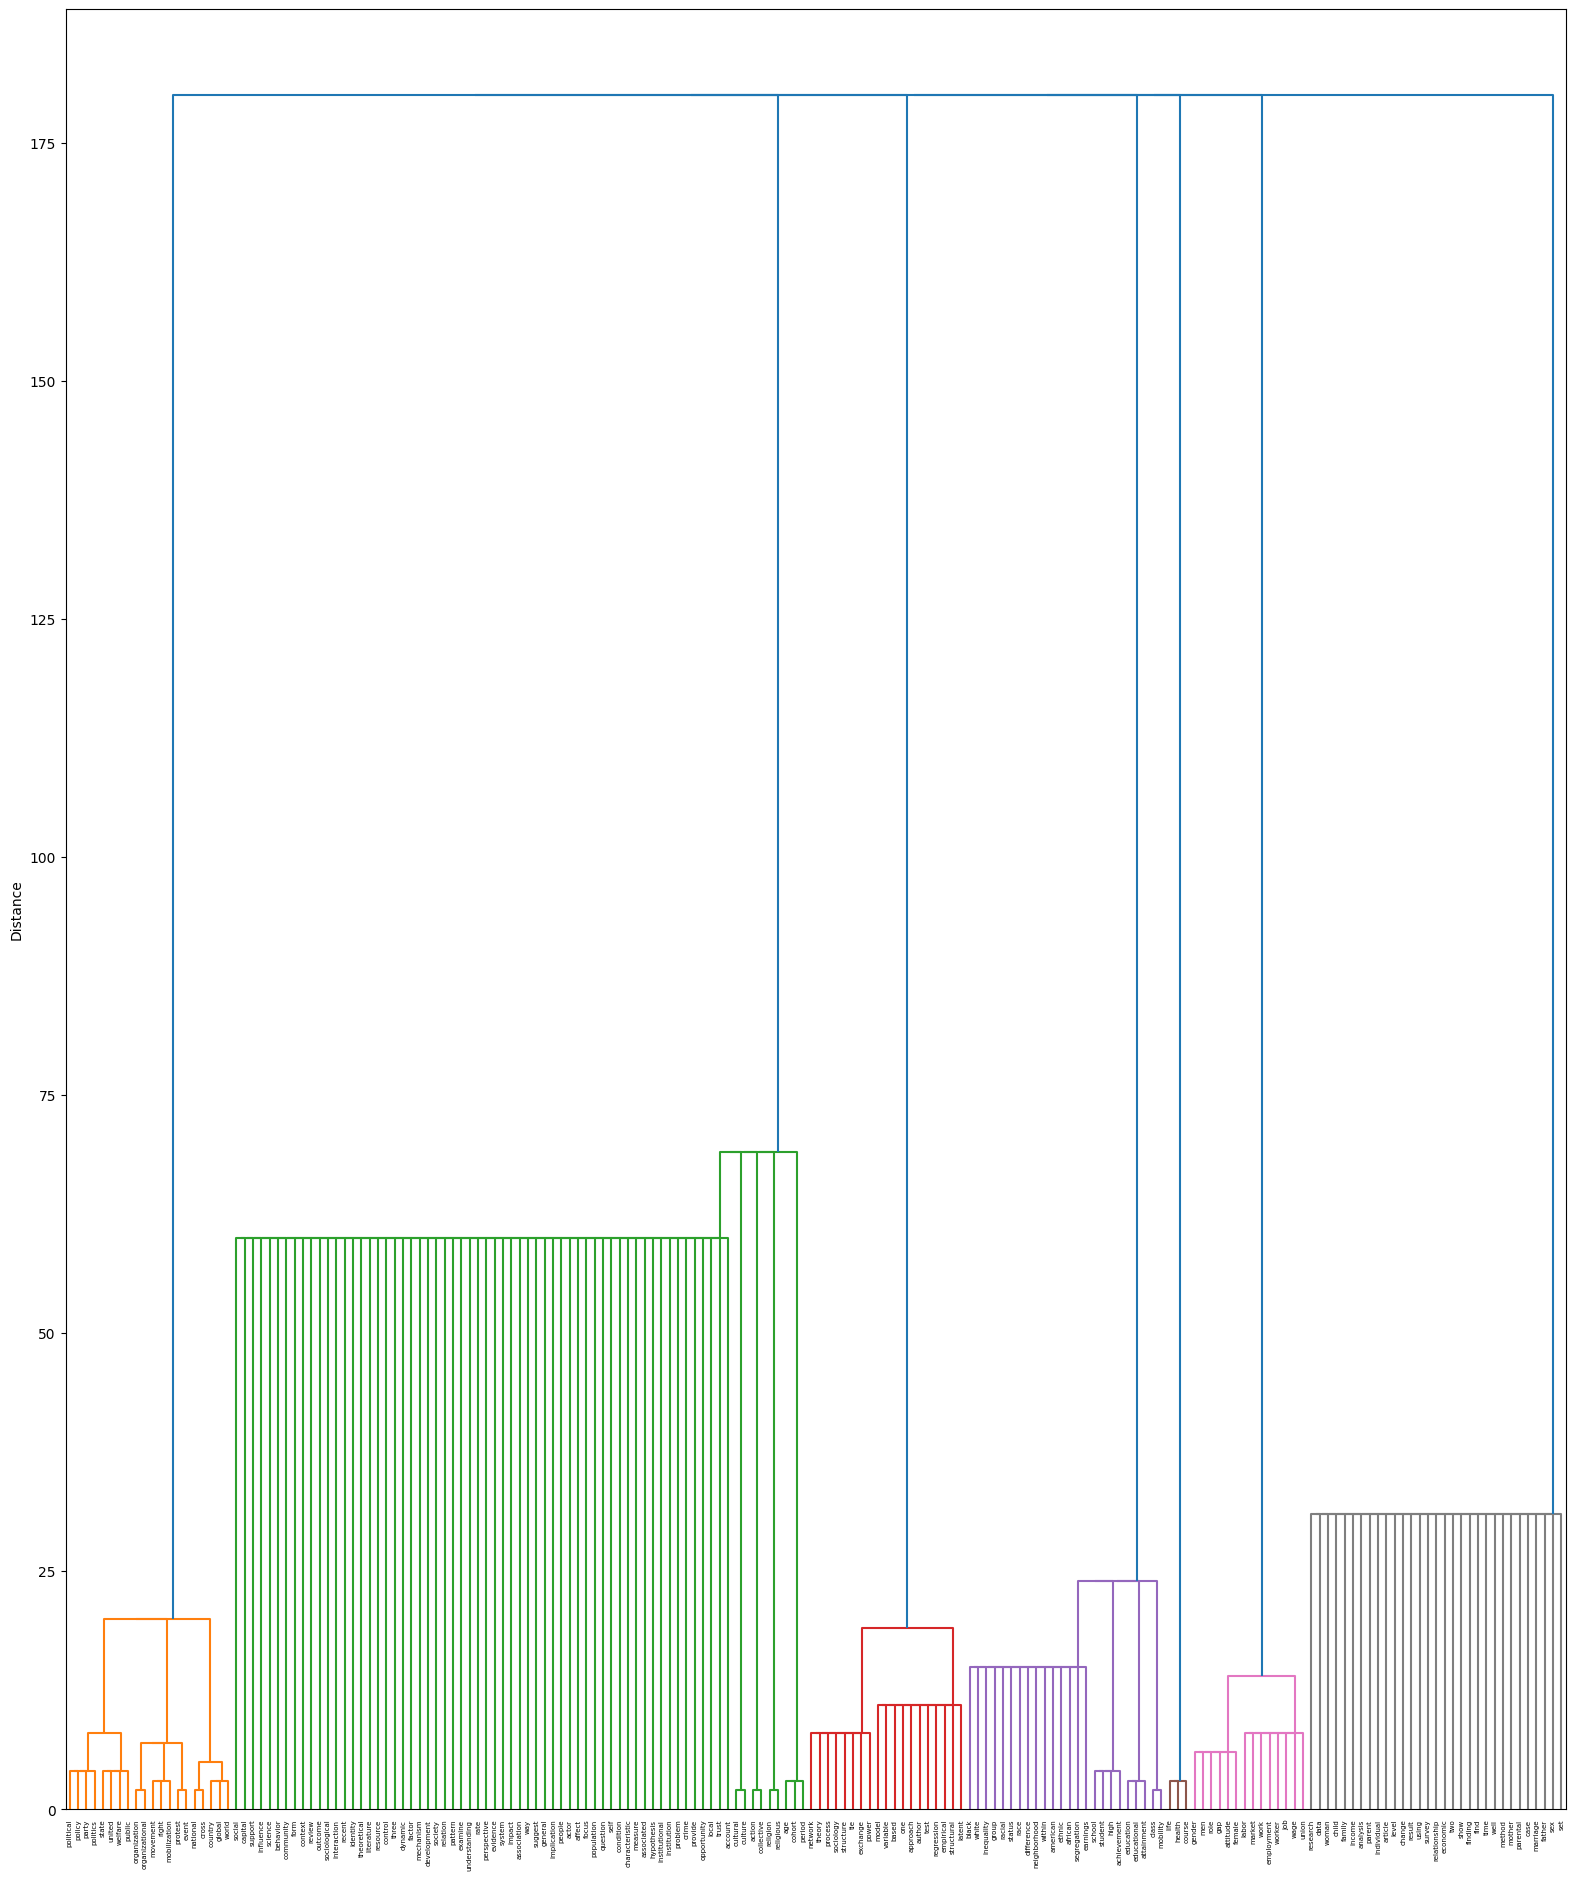

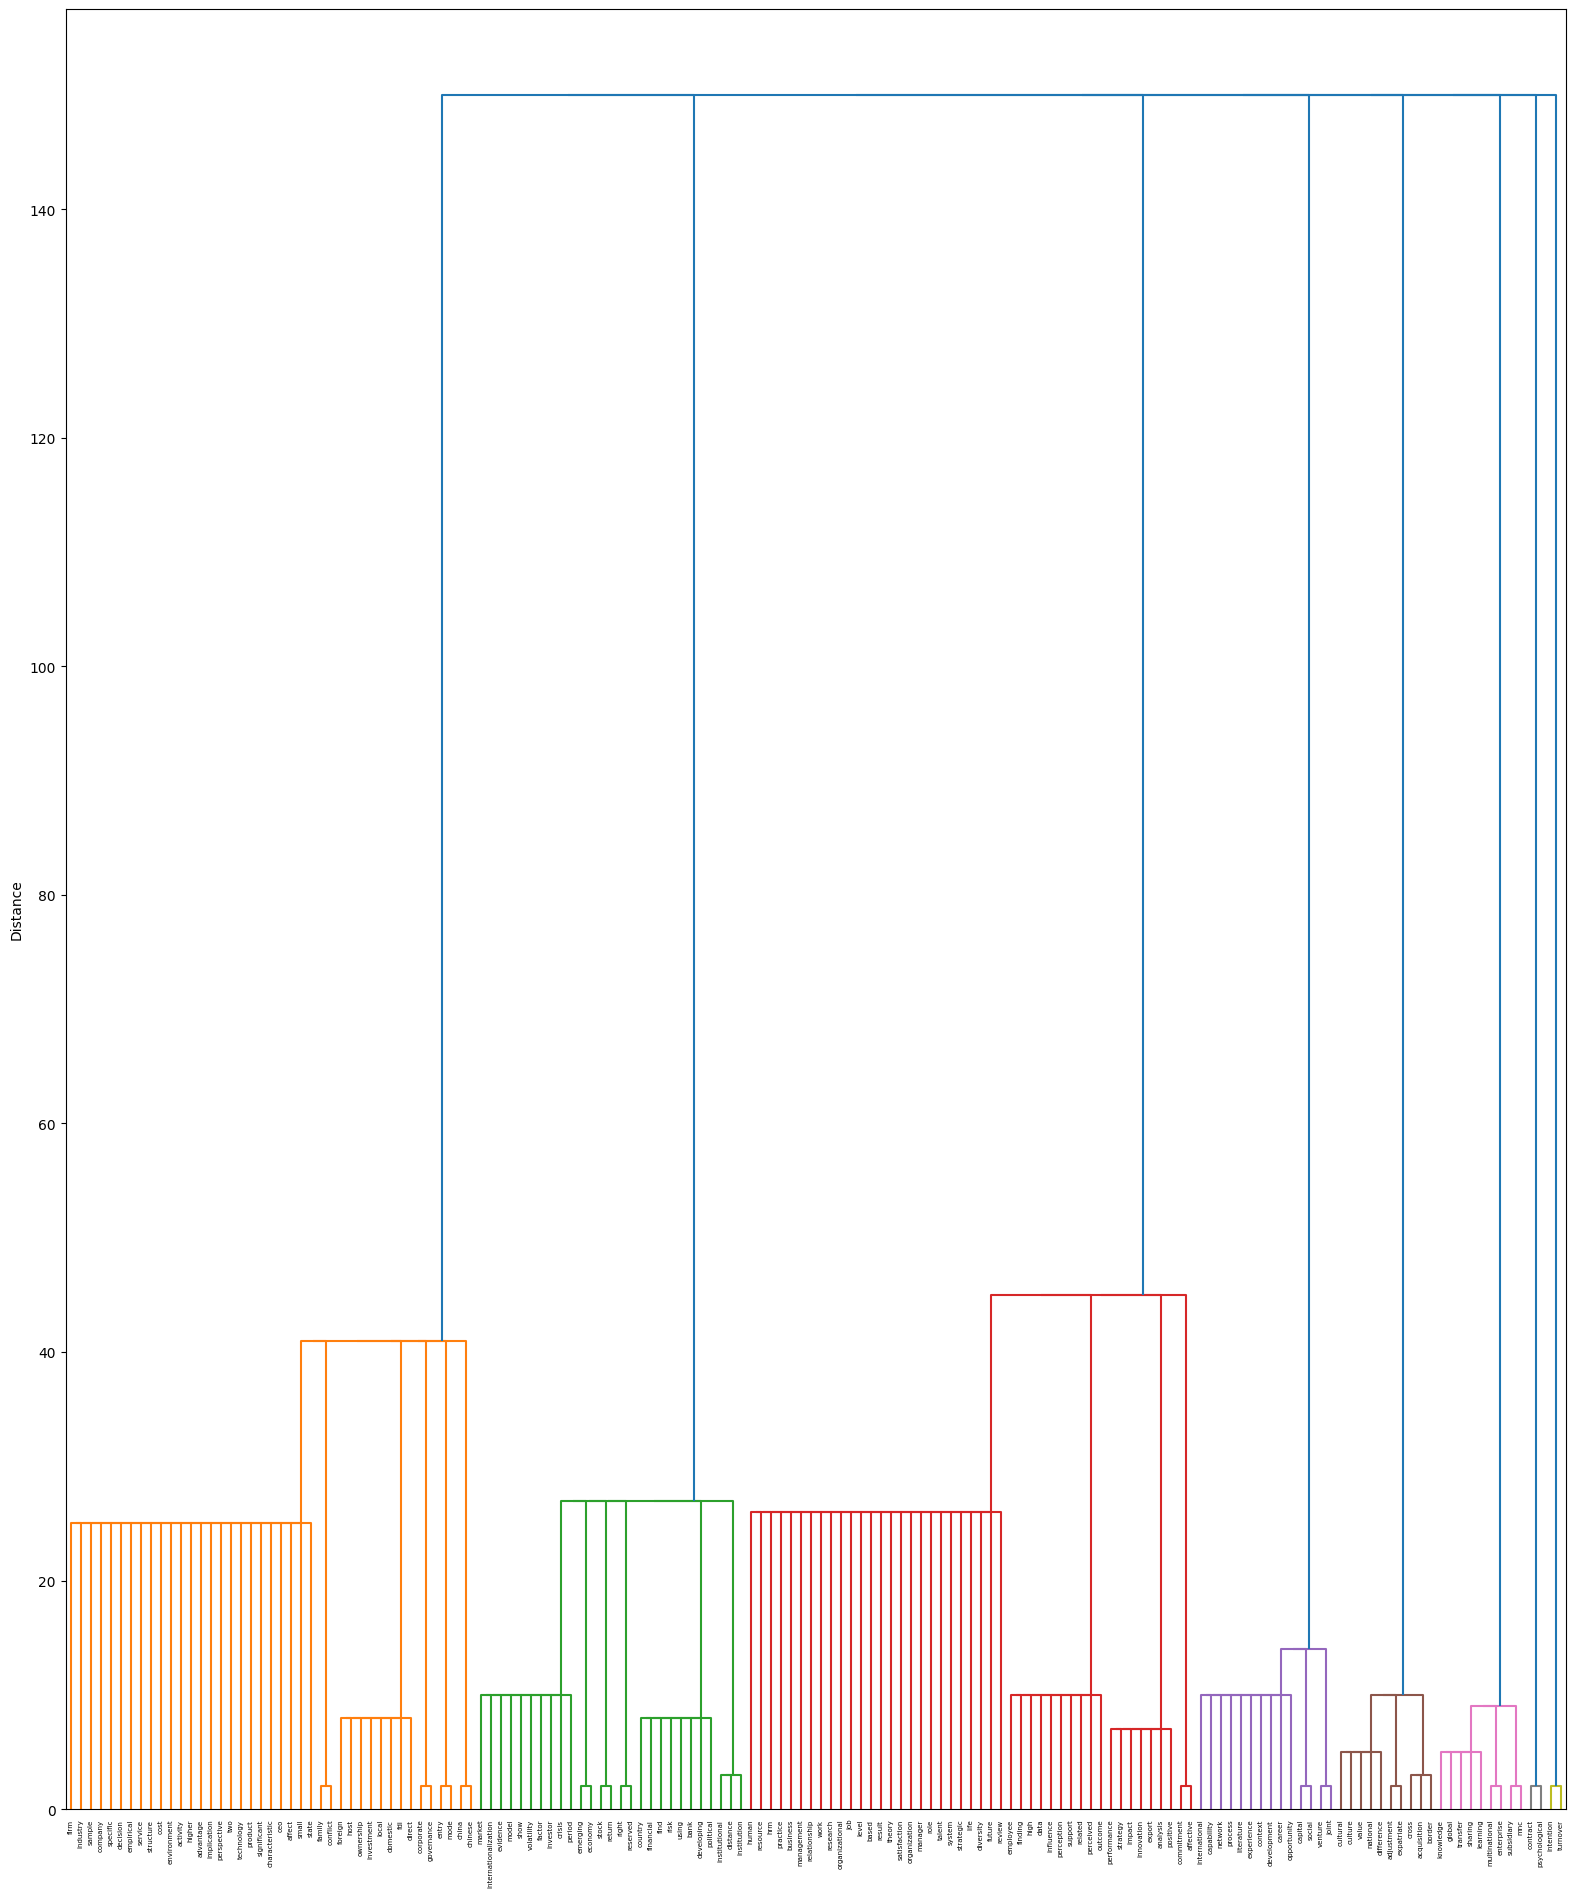

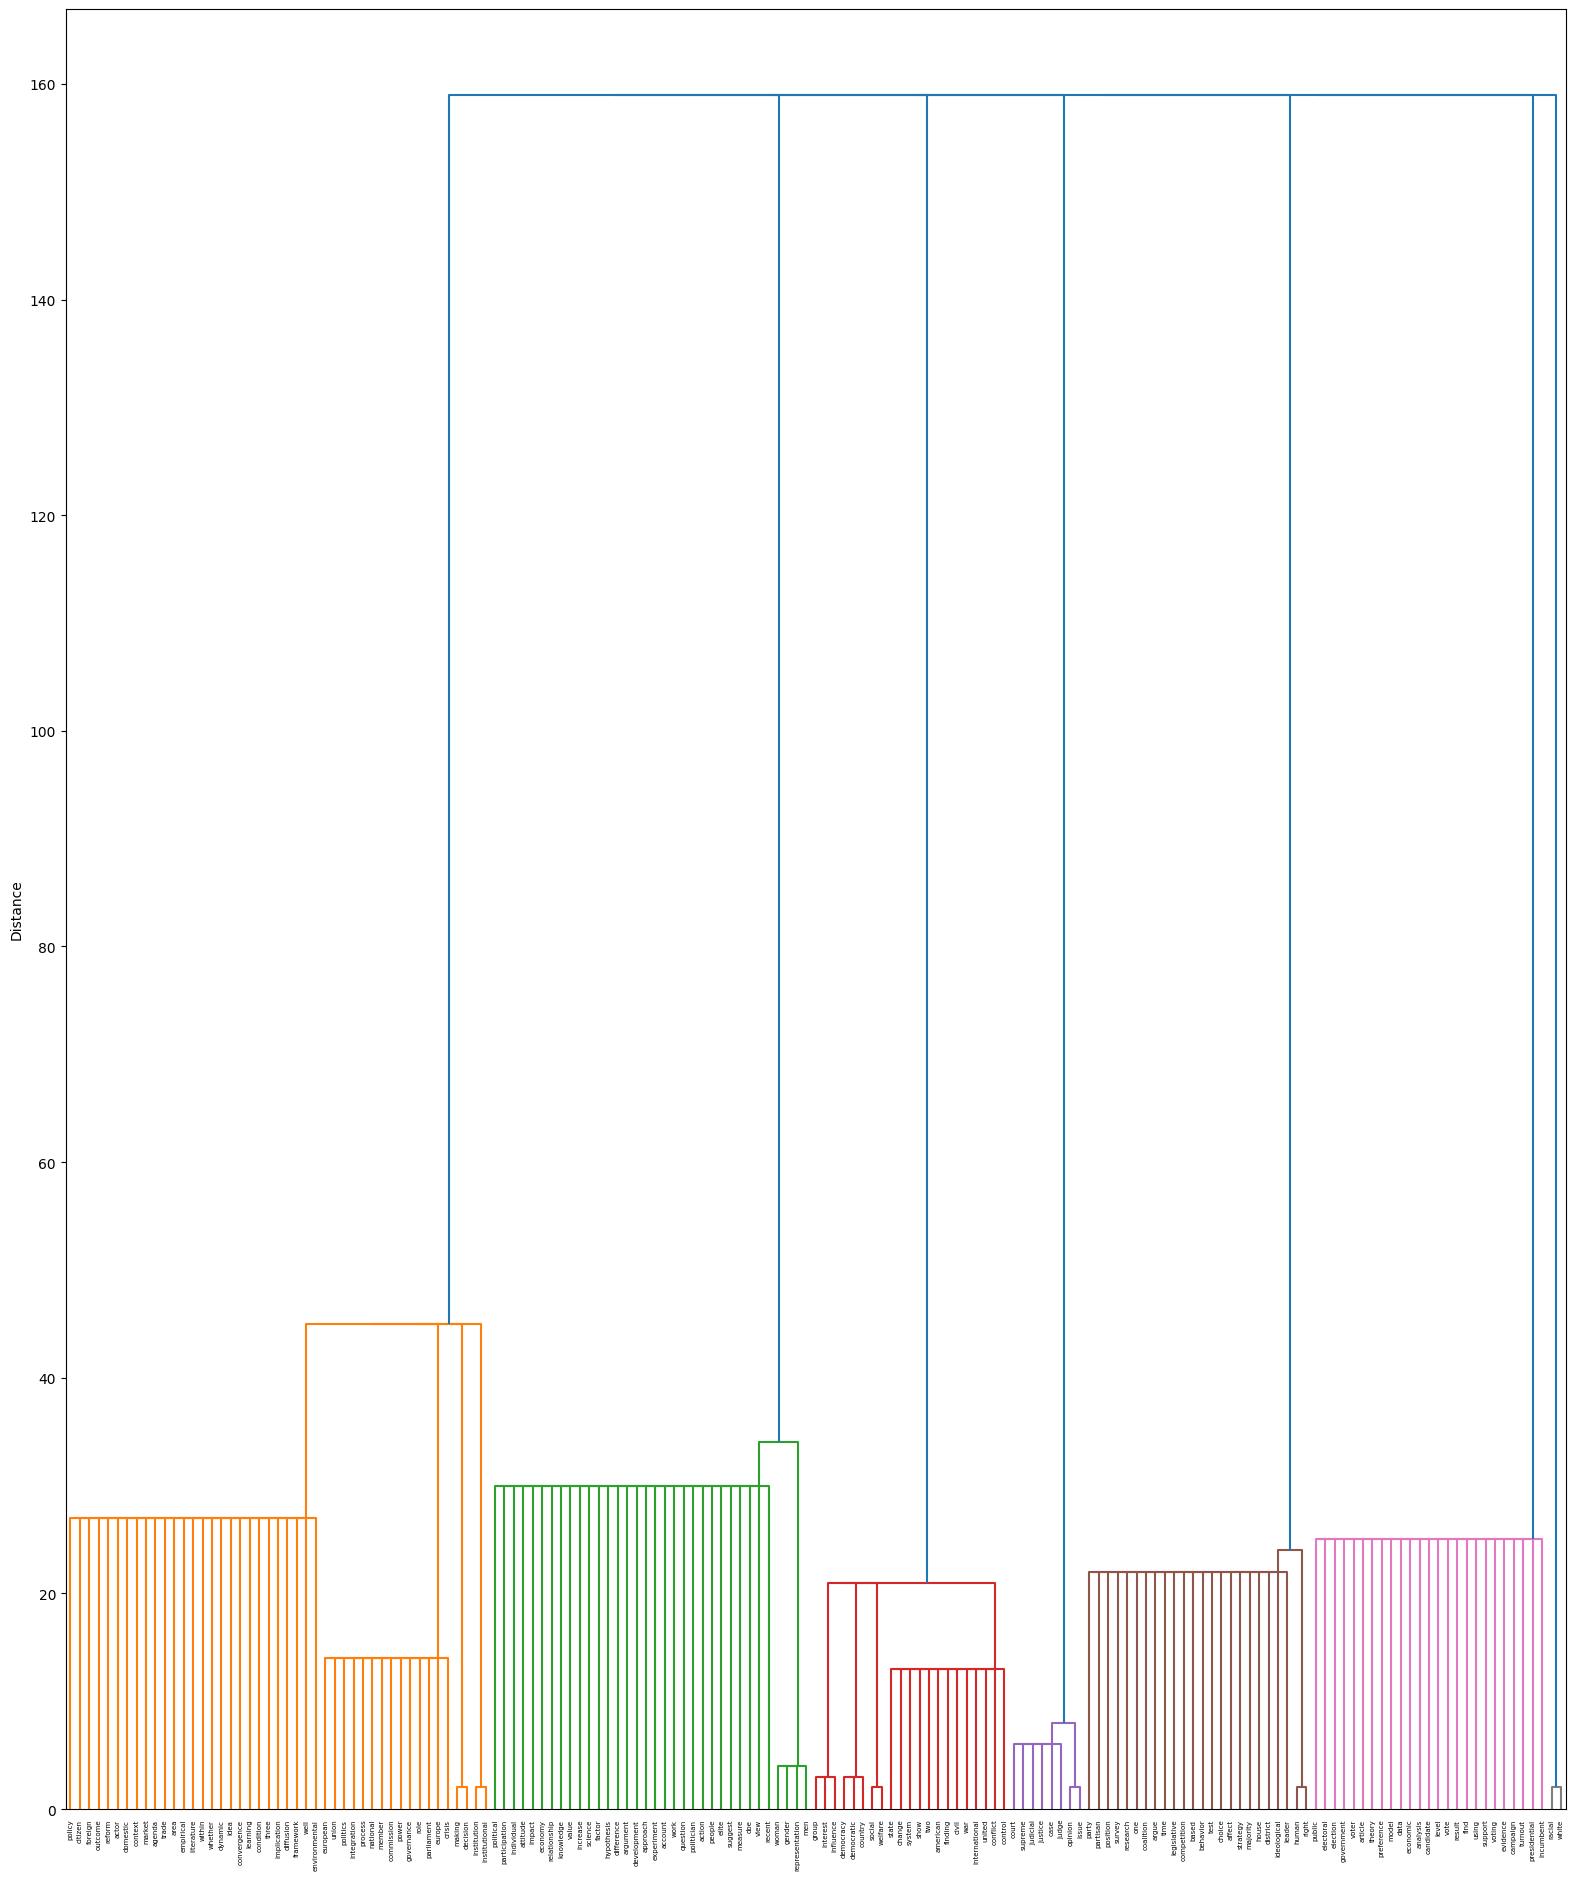

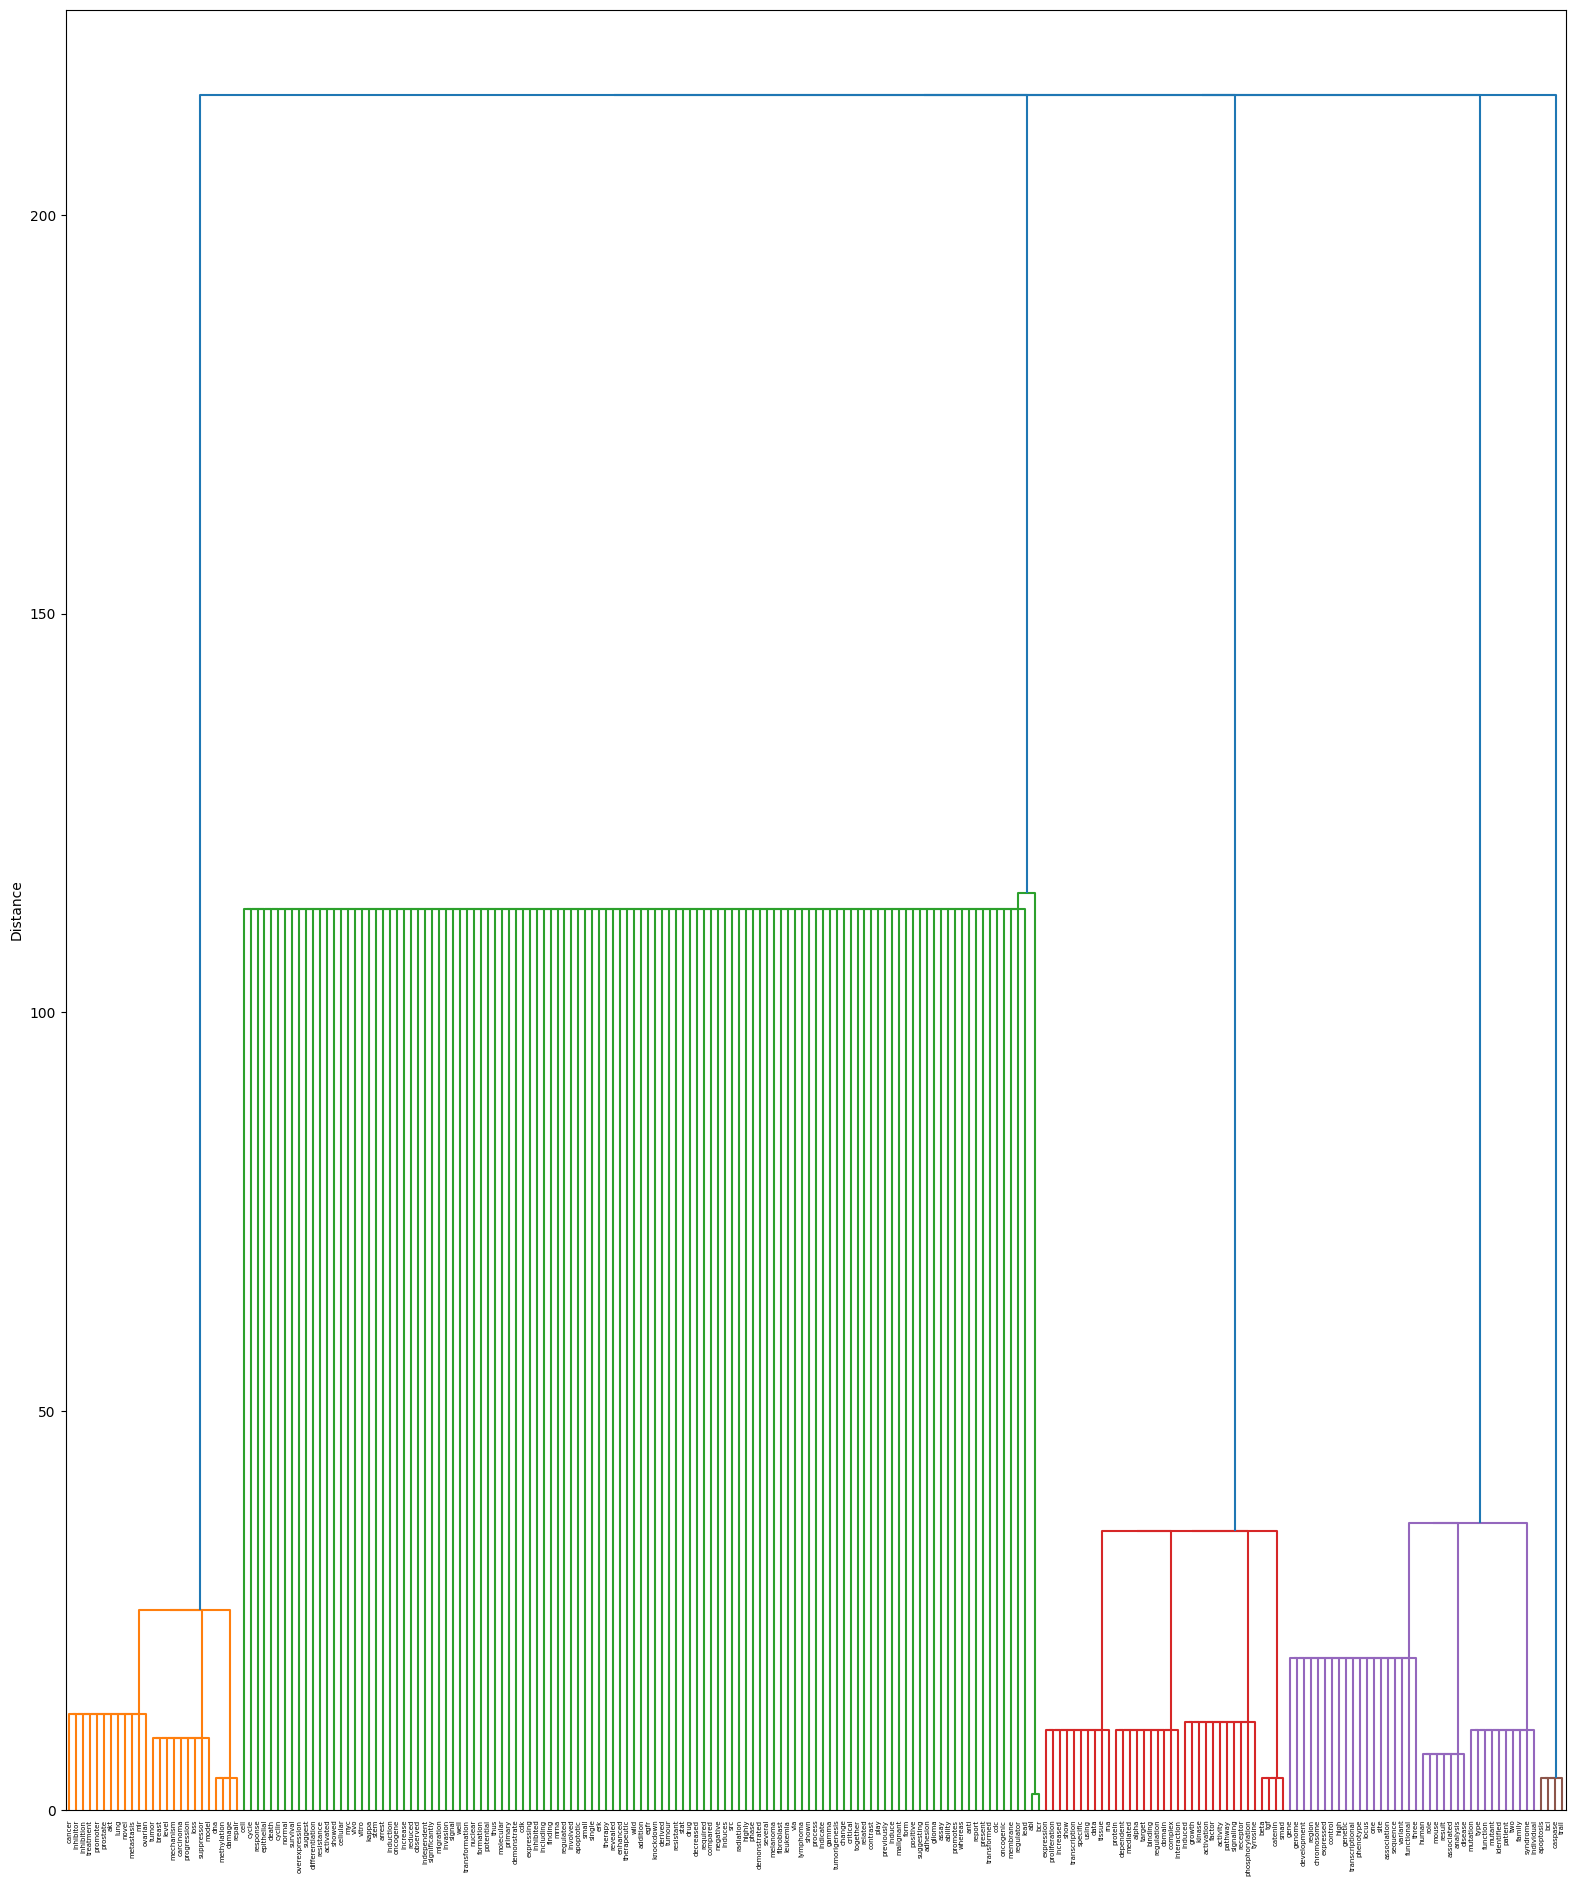

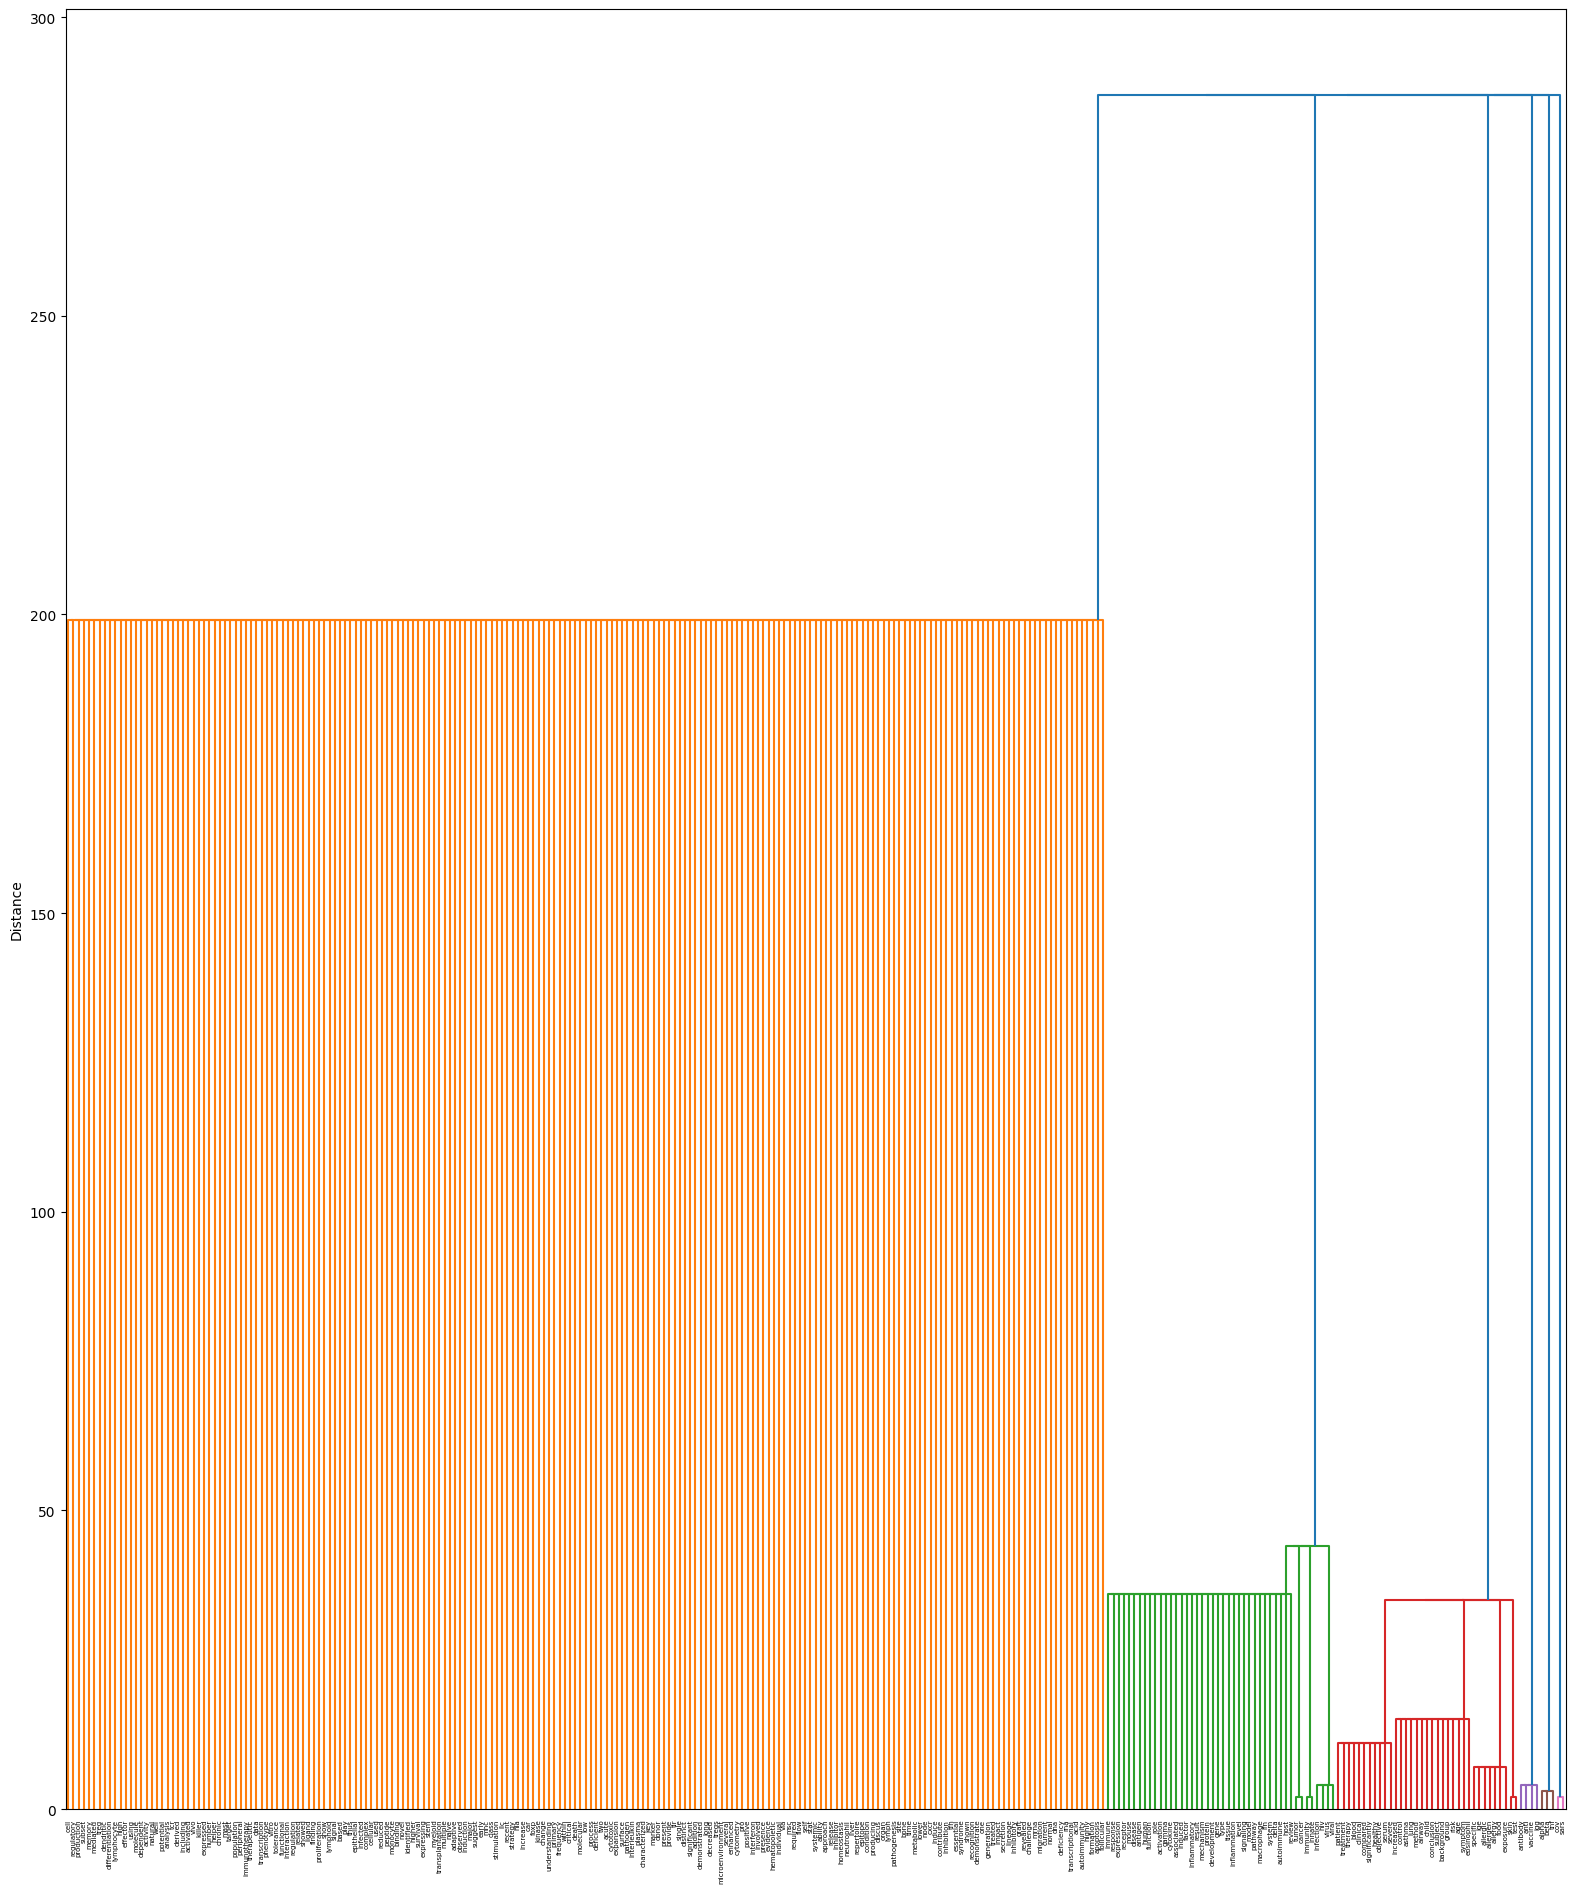

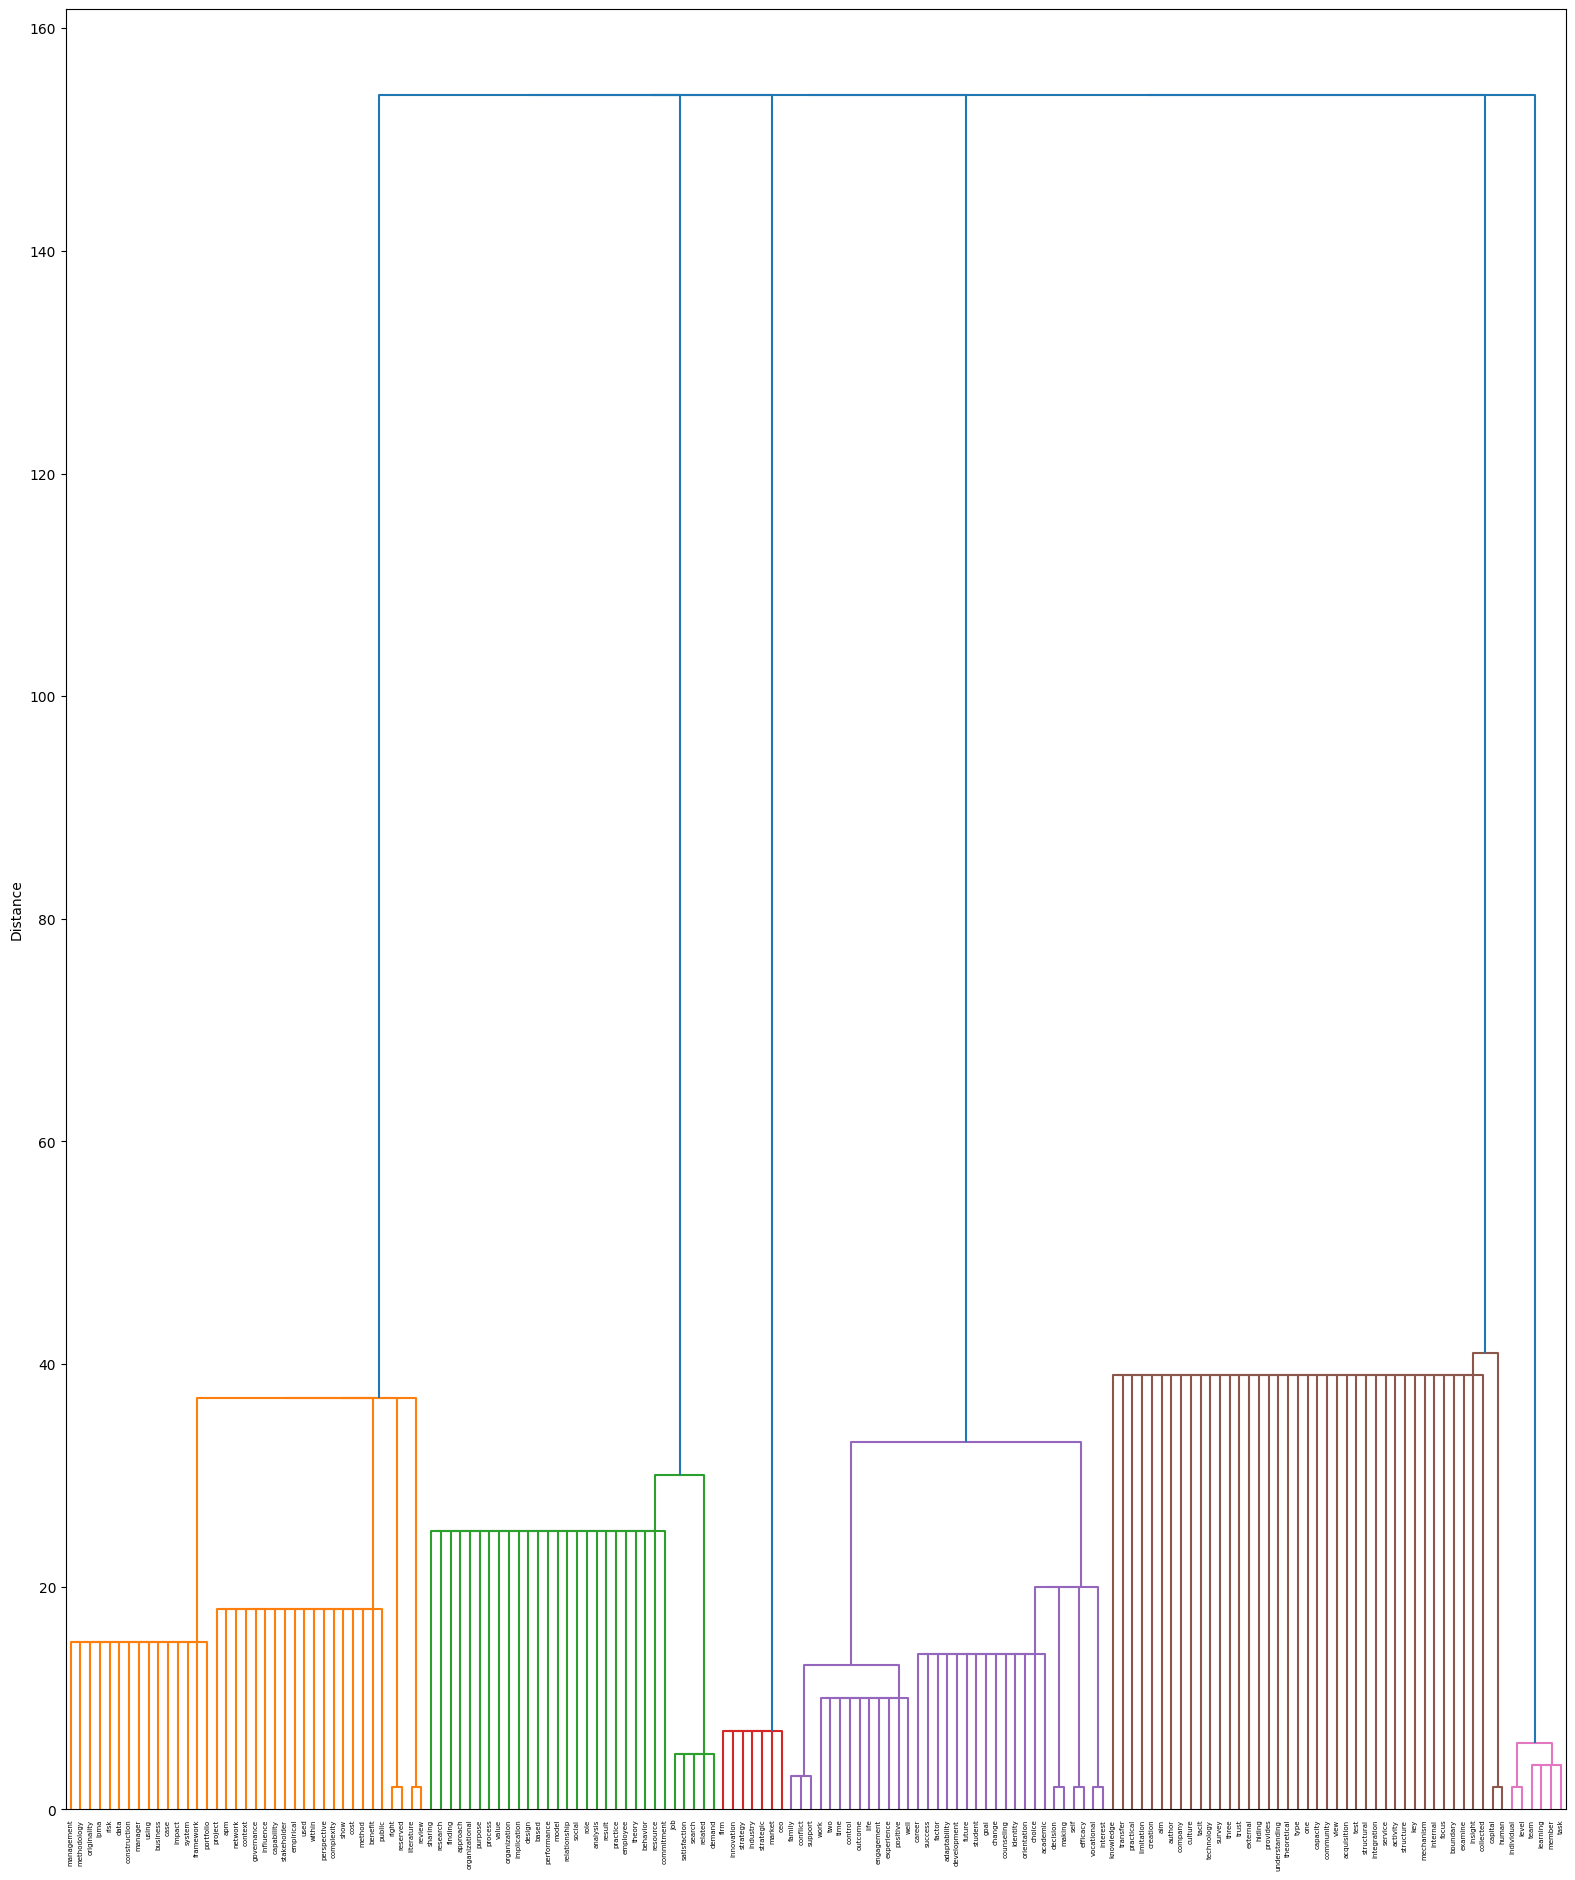

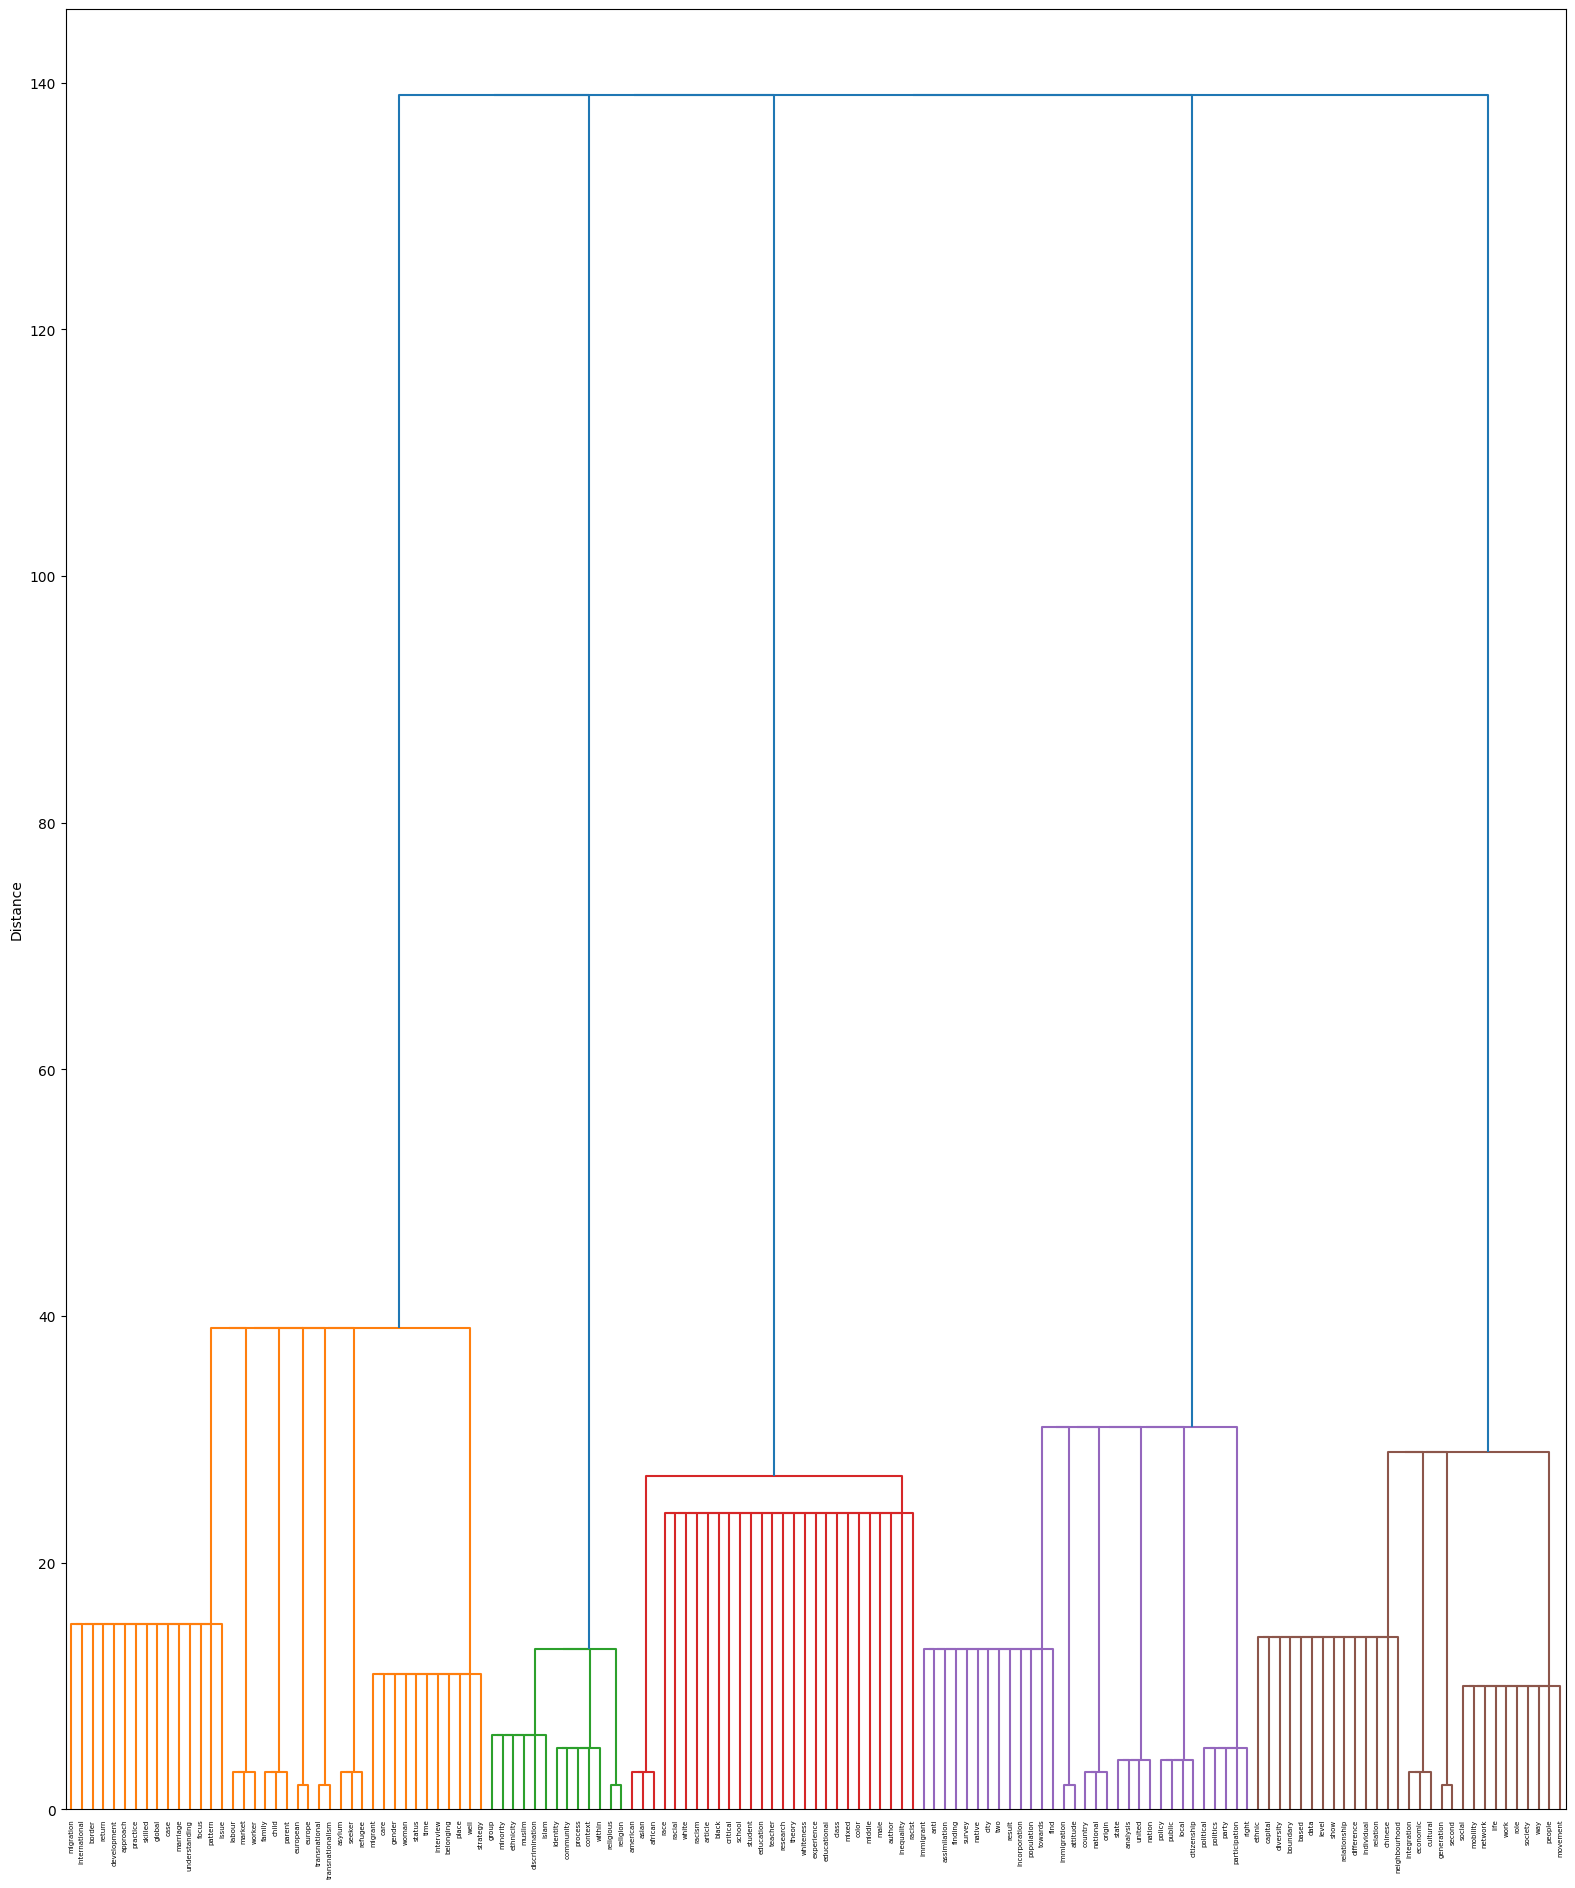

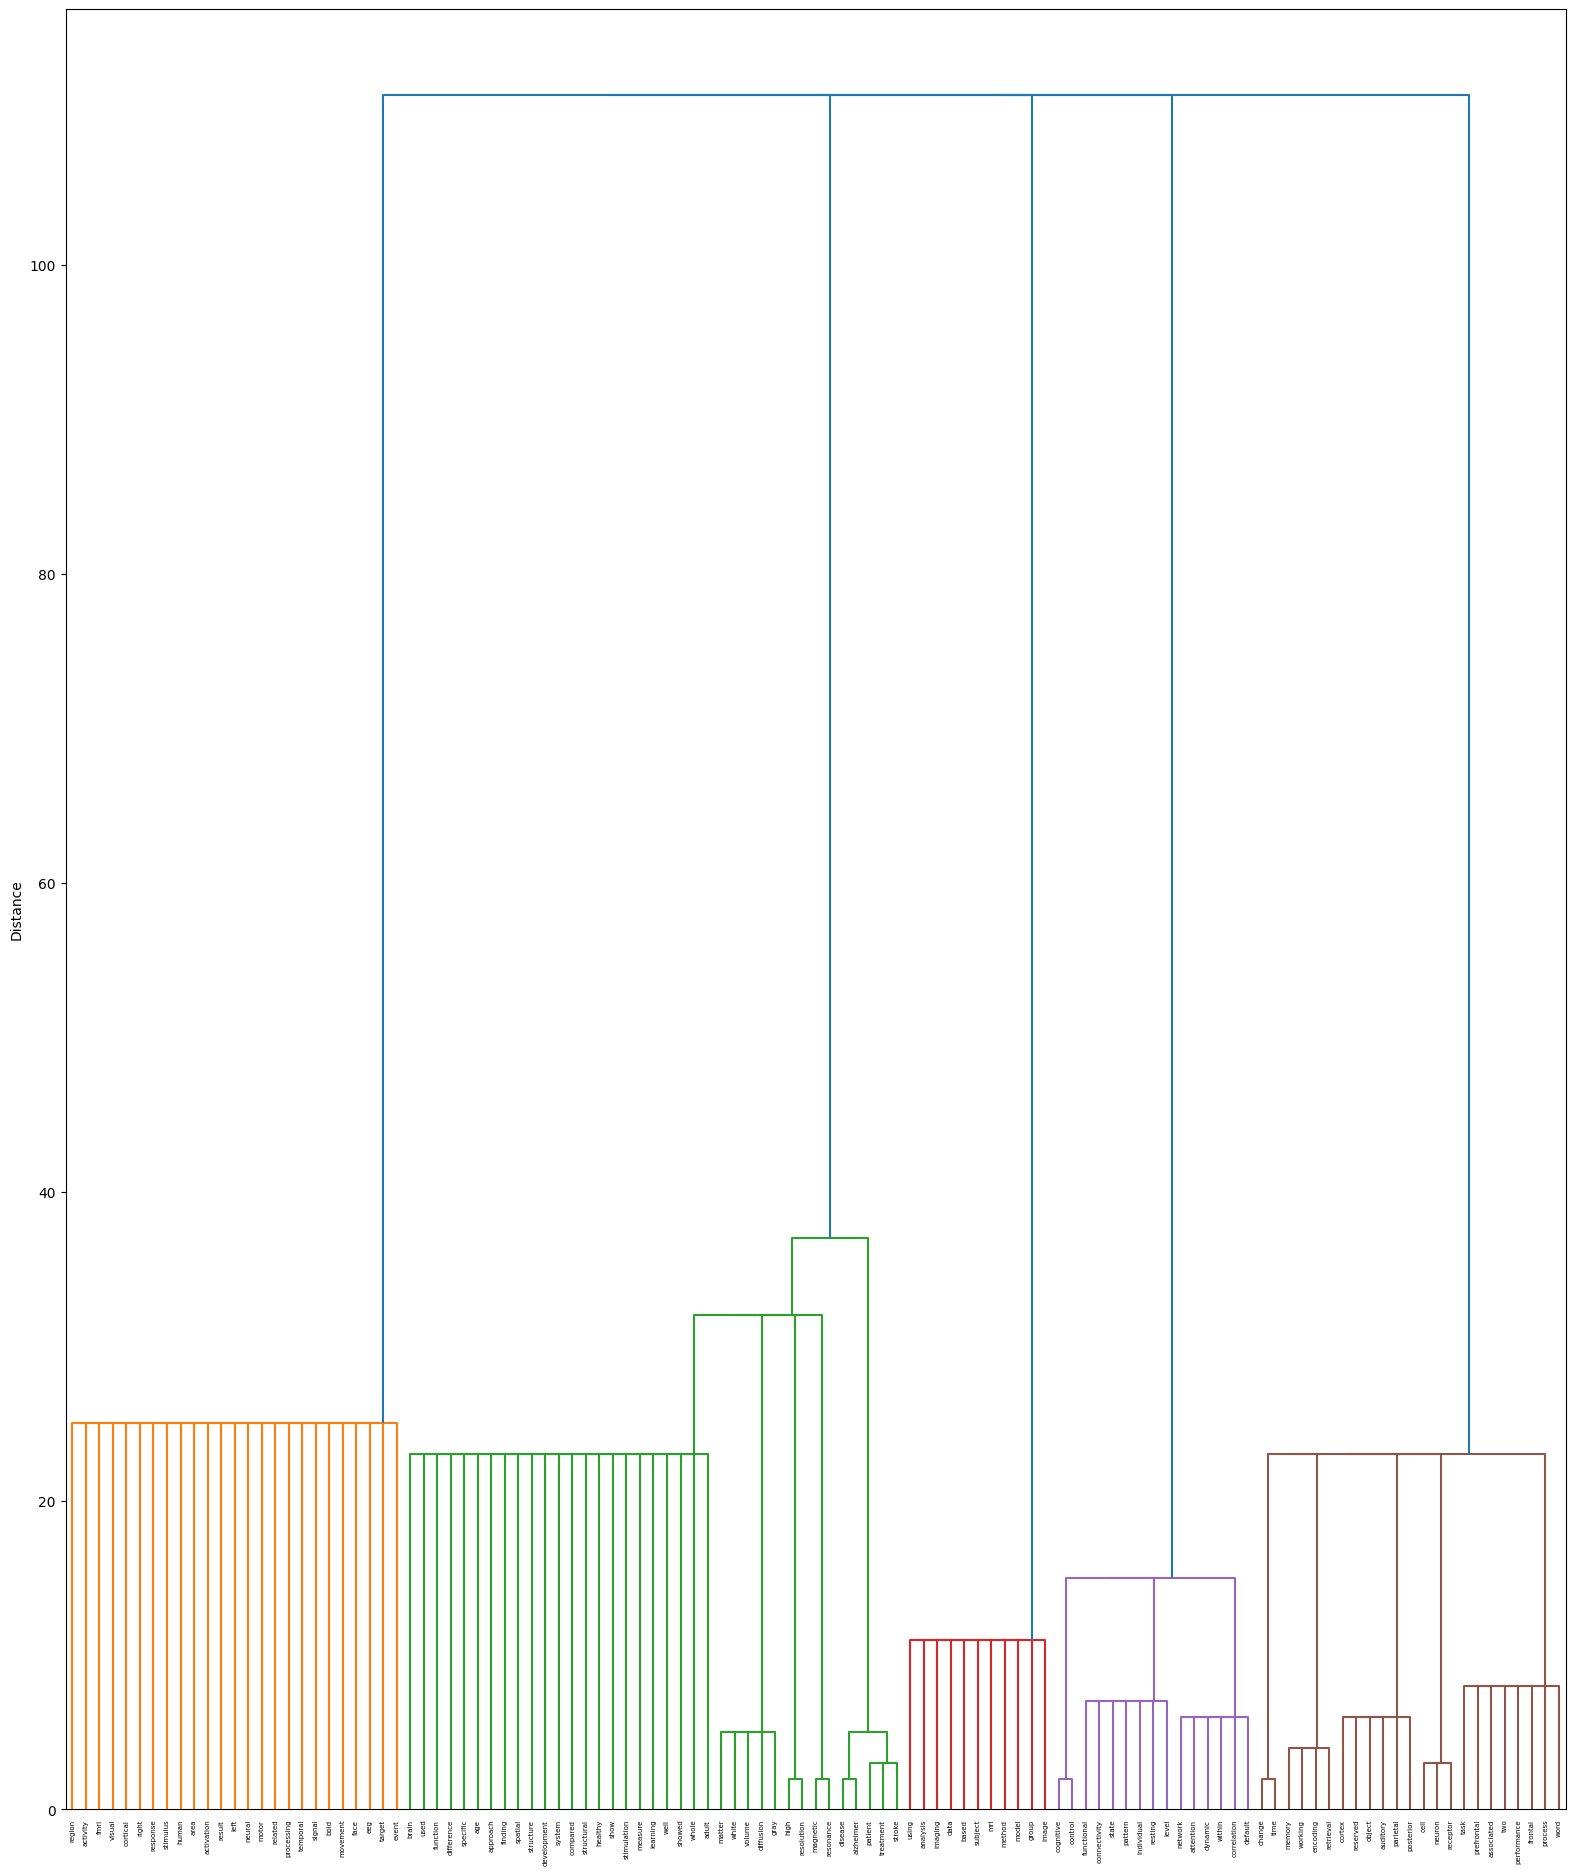

In [9]:
sns.reset_defaults()

for (field_name, G) in Gs.items():

    print(field_name)

    nodes = list(G.nodes)
    
    comms = list(sorted(nx_comm.louvain_partitions(G, weight=None), key=len))
    comms.insert(0, (set(nodes),))
    comms.append(tuple({n} for n in nodes))

    Z, leaves = compute_Z(comms)

    fig = plt.figure(figsize=(15, 18))
    ax = fig.add_axes([0, 0, 1, 1])

    # ax.set_xlabel('Node')
    ax.set_ylabel('Distance')
    
    dendrogram(Z, labels=leaves, ax=ax)
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    fig.tight_layout()

    # plt.savefig(
    #     os.path.join(LATEX_FIGURES_PATH, 'co_occurrence_louvain_hier_comm', f'{field_name.capitalize()}.png'), 
    #     transparent=True, 
    #     dpi=300,
    #     bbox_inches='tight'
    # )

# Circle Packing

In [ ]:
import circlify

In [308]:
field_name = 'Sociology'
levels = 5
method = 'girvan_newman' # louvain, girvan_newman

G = Gs['Sociology']

if method == 'girvan_newman':
    hier_comms = list(nx_comm.girvan_newman(G))
elif method == 'louvain':
    hier_comms = list(nx_comm.louvain_partitions(G, resolution=1))
    hier_comms = list(reversed(hier_comms))

levels = min(levels, len(hier_comms))

root = set().union(*hier_comms[0])
hier_comms.insert(0, (root,))

hier_comms = hier_comms[:levels]
len(hier_comms)

5

In [309]:
core_threshold = 3

coreness = nx.core_number(G)

G_tree = nx.DiGraph()

for i in range(len(hier_comms)-1):

    for community_i, community_i1 in itertools.product(hier_comms[i], hier_comms[i+1]):
        
        # core_community_i = dict(filter(lambda tup: tup[0] in community_i, coreness.items()))
        # core_community_i = dict(filter(lambda tup: tup[1] >= max(core_community_i.values())-core_threshold, core_community_i.items()))
        # core_community_i = dict(sorted(core_community_i.items(), key=lambda tup: tup[1]))
        # core_community_i = frozenset(core_community_i.keys())
        # u = (i, core_community_i)
        
        u = (i, frozenset(community_i))
        
        # core_community_i1 = dict(filter(lambda tup: tup[0] in community_i, coreness.items()))
        # core_community_i1 = dict(filter(lambda tup: tup[1] >= max(core_community_i1.values())-core_threshold, core_community_i1.items()))
        # core_community_i1 = dict(sorted(core_community_i1.items(), key=lambda tup: tup[1]))
        # core_community_i1 = frozenset(core_community_i1.keys())
        # v = (i+1, core_community_i1)
        
        v = (i+1, frozenset(community_i1))

        G_tree.add_node(u, datum=10)
        G_tree.add_node(v, datum=10)

        if community_i1.issubset(community_i):
            G_tree.add_edge(u, v)

print(G_tree)

root = (0, frozenset(root))
tree = nx.tree_data(G_tree, root, ident='id', children='children')

DiGraph with 15 nodes and 14 edges


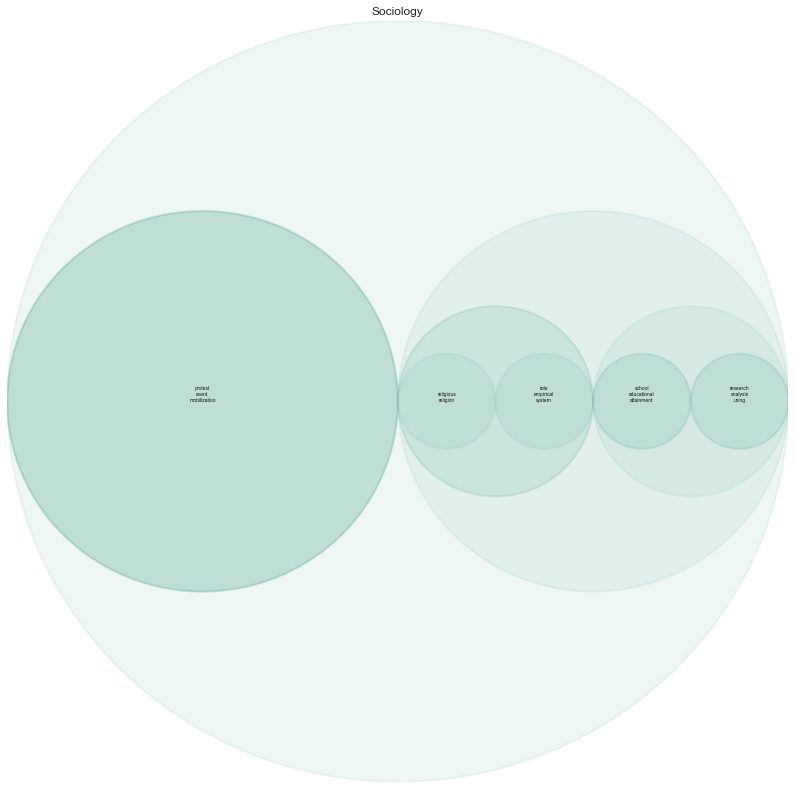

In [310]:
circles = circlify.circlify(
    [tree],
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

fig, ax = plt.subplots(figsize=(14,14))

ax.set_title(f'{field_name}')
ax.axis('off')

lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)

plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

for circle in circles:
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.1, linewidth=2, color="#69b3a2"))
    if circle.level == levels:
      label = '\n'.join(list(circle.ex["id"][1])[:3])
      plt.annotate(label, (x, y), ha='center', color="k", fontsize=5)